In [2]:
# ÂºÄÂ§¥ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂåÖ
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import re 
import warnings
import math
import matplotlib.ticker as ticker
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = ['Microsoft YaHei']


In [ ]:
# 0627 Â∞ÜÊâÄÊúâÊï∞ÊçÆÈõÜÂêàÂú®‰∏ÄËµ∑ËÆ≠ÁªÉÔºå‰∏çÂΩí‰∏ÄÂåñÔºåÊ±áÊä•ÁâàÊú¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.optimize import minimize

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

def custom_model(x1, x2, C1, C2):
    """
    Ëá™ÂÆö‰πâÊ®°ÂûãÂáΩÊï∞ - ÂπÇÂáΩÊï∞ÂΩ¢Âºè
    
    ÂΩìÂâçÊ®°Âûã: Y = C1 * (x2/x1)^C2
    
    ÂèÇÊï∞:
        x1: Êç¢Ê≤πÁéá
        x2: Â∞ÅÂ≠òÁéá  
        C1: Á≥ªÊï∞a
        C2: Á≥ªÊï∞b
        
    ËøîÂõû:
        È¢ÑÊµãÂÄº Y
    """
    return C1 * (x2/x1)**C2
    

def get_model_description():
    """Ëé∑ÂèñÂΩìÂâçÊ®°ÂûãÁöÑÊèèËø∞"""
    return "Y = C1 * (x2/x1)^C2"

def get_feature_name():
    """Ëé∑ÂèñÂΩìÂâçÊ®°Âûã‰ΩøÁî®ÁöÑÁâπÂæÅÂêçÁß∞"""
    return "ratio_x2_x1"

def calculate_features(x1, x2):
    """
    Ê†πÊçÆÂΩìÂâçÊ®°ÂûãËÆ°ÁÆóÁâπÂæÅ
    
    ÂèÇÊï∞:
        x1: Êç¢Ê≤πÁéá
        x2: Â∞ÅÂ≠òÁéá
        
    ËøîÂõû:
        ÁâπÂæÅÂÄº (ÂØπÂ∫îÂΩìÂâçÊ®°Âûã)
    """
    # ÂΩìÂâçÊ®°Âûã‰ΩøÁî® x2/x1 ‰Ωú‰∏∫ÁâπÂæÅ
    return np.where(x1 != 0, x2 / x1, np.nan)

def process_raw_data(csv_file='Êï∞ÊçÆÁªìÊûú_ÈòàÂÄº_10.csv'):
    """Â§ÑÁêÜÂéüÂßãÊï∞ÊçÆÔºà‰∏çÂΩí‰∏ÄÂåñÔºâ"""
    
    print(f"\nüìä ËØªÂèñÂéüÂßãÊï∞ÊçÆ: {csv_file}...")
    # Â∞ùËØï‰∏çÂêåÁºñÁ†ÅËØªÂèñ
    for encoding in ['utf-8-sig', 'gbk', 'utf-8', 'gb2312']:
        try:
            df = pd.read_csv(csv_file, encoding=encoding)
            print(f"ÊàêÂäüËØªÂèñÊï∞ÊçÆÔºåÁºñÁ†Å: {encoding}")
            break
        except:
            continue
    else:
        raise ValueError(f"Êó†Ê≥ïËØªÂèñÊï∞ÊçÆÊñá‰ª∂: {csv_file}ÔºåËØ∑Ê£ÄÊü•Êñá‰ª∂Ë∑ØÂæÑÂíåÁºñÁ†Å")
    
    print(f"ÂéüÂßãÊï∞ÊçÆÂΩ¢Áä∂: {df.shape}")
    print(f"Êï∞ÊçÆÂàóÂêç: {df.columns.tolist()}")
    
    # ‰ΩøÁî®ÂéüÂßãÊç¢Ê≤πÁéáÂíåÂ∞ÅÂ≠òÁéáÔºà‰∏çÂΩí‰∏ÄÂåñÔºâ
    x1 = df['Êç¢Ê≤πÁéá'].copy()  # Êç¢Ê≤πÁéá
    x2 = df['Â∞ÅÂ≠òÁéá'].copy()  # Â∞ÅÂ≠òÁéá
    
    print(f"Êç¢Ê≤πÁéáËåÉÂõ¥: [{x1.min():.4f}, {x1.max():.4f}]")
    print(f"Â∞ÅÂ≠òÁéáËåÉÂõ¥: [{x2.min():.4f}, {x2.max():.4f}]")
    
    # ËÆ°ÁÆó diff = min(x1, x2) / abs(x1 - x2) ‰Ωú‰∏∫ Y
    numerator = np.minimum(x1, x2)  # min(x1, x2)
    denominator = np.abs(x1 - x2)   # abs(x1 - x2)
    
    # ÈÅøÂÖçÈô§Èõ∂ÈîôËØØ
    Y = np.where(denominator != 0, numerator / denominator, np.nan)
    
    # ‰ΩøÁî®Ëá™ÂÆö‰πâÊ®°ÂûãËÆ°ÁÆóÁâπÂæÅ
    ratio = calculate_features(x1, x2)
    feature_name = get_feature_name()
    
    # ÂàõÂª∫Êñ∞ÁöÑÊï∞ÊçÆÊ°Ü
    df_raw = pd.DataFrame({
        'x1_Êç¢Ê≤πÁéá': x1,
        'x2_Â∞ÅÂ≠òÁéá': x2,
        'Y_diff': Y,
        feature_name: ratio
    })
    
    # ÂéªÈô§Êó†ÊïàÂÄº
    df_raw = df_raw.dropna()
    print(f"ÂéªÈô§Êó†ÊïàÂÄºÂêéÊï∞ÊçÆÂΩ¢Áä∂: {df_raw.shape}")
    
    # Â§ÑÁêÜÊó†Á©∑Â§ßÂÄº
    df_raw = df_raw.replace([np.inf, -np.inf], np.nan).dropna()
    print(f"ÂéªÈô§Êó†Á©∑Â§ßÂÄºÂêéÊï∞ÊçÆÂΩ¢Áä∂: {df_raw.shape}")
    
    print(f"Â§ÑÁêÜÂêéÊï∞ÊçÆÁªüËÆ°:")
    print(f"  Y_diffËåÉÂõ¥: [{df_raw['Y_diff'].min():.4f}, {df_raw['Y_diff'].max():.4f}]")
    feature_name = get_feature_name()
    print(f"  {feature_name}ËåÉÂõ¥: [{df_raw[feature_name].min():.4f}, {df_raw[feature_name].max():.4f}]")
    
    return df_raw

def clean_outliers(df_raw):
    """ÊåâÂéüÊñπÊ≥ïÂà†Èô§ÊûÅÂÄº"""
    
    print("\nüßπ ÂºÇÂ∏∏ÂÄºÊ∏ÖÊ¥ó...")
    
    # ÂéªÈô§Y_diff > 99ÁôæÂàÜ‰ΩçÊï∞ÁöÑÊï∞ÊçÆ
    Y_99 = df_raw['Y_diff'].quantile(0.99)
    mask1 = df_raw['Y_diff'] <= Y_99
    print(f"ÂéªÈô§Y_diff > {Y_99:.3f}ÁöÑÊï∞ÊçÆ: ÁßªÈô§{(~mask1).sum()}‰∏™")
    
    # ÂéªÈô§ratioÁöÑÊûÅÁ´ØÂÄºÔºà< 1% Êàñ > 99%Ôºâ
    feature_name = get_feature_name()
    ratio_1 = df_raw[feature_name].quantile(0.01)
    ratio_99 = df_raw[feature_name].quantile(0.99)
    mask2 = (df_raw[feature_name] >= ratio_1) & (df_raw[feature_name] <= ratio_99)
    print(f"ÂéªÈô§ratio < {ratio_1:.3f} Êàñ > {ratio_99:.3f}ÁöÑÊï∞ÊçÆ: ÁßªÈô§{(~mask2).sum()}‰∏™")
    
    # ÁªÑÂêàËøáÊª§
    final_mask = mask1 & mask2
    df_cleaned = df_raw[final_mask].copy()
    
    print(f"‚ú® Ê∏ÖÊ¥óÂêéÊï∞ÊçÆÂΩ¢Áä∂: {df_cleaned.shape}")
    print(f"ÁßªÈô§Êï∞ÊçÆÊØî‰æã: {(1 - len(df_cleaned)/len(df_raw)) * 100:.2f}%")
    
    return df_cleaned

def power_model_objective(params, x, y):
    """
    ÂπÇÂáΩÊï∞Ê®°ÂûãÁöÑÊçüÂ§±ÂáΩÊï∞
    
    ÂèÇÊï∞:
        params: [a, b] ÂèÇÊï∞ÂàóË°®
        x: ÁâπÂæÅÂÄº (x2/x1)
        y: ÁõÆÊ†áÂÄº
        
    ËøîÂõû:
        ÂùáÊñπËØØÂ∑Æ
    """
    a, b = params
    y_pred = a * x**b
    return np.mean((y - y_pred)**2)

def train_raw_data_model(df_cleaned, train_size=0.8, seed=42):
    """ËÆ≠ÁªÉÂéüÂßãÊï∞ÊçÆÊ®°ÂûãÔºàÂàÜÂâ≤ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÔºâ"""
    model_desc = get_model_description()
    print(f"\nüîÑ Êï∞ÊçÆÈõÜÂàÜÂâ≤ (ËÆ≠ÁªÉÈõÜ{train_size*100:.0f}%, È™åËØÅÈõÜ{(1-train_size)*100:.0f}%)...")
    print(f"üéØ ÂΩìÂâçÊ®°Âûã: {model_desc}")

    feature_name = get_feature_name()
    X = df_cleaned[[feature_name]].values
    y = df_cleaned['Y_diff'].values

    # Êï∞ÊçÆÈõÜÂàÜÂâ≤
    X_train, X_val, y_train, y_val, idx_train, idx_val = train_test_split(
        X, y, df_cleaned.index,
        train_size=train_size,
        random_state=seed,
        stratify=None
    )
    # ‰øùËØÅ‰∏∫numpyÊï∞ÁªÑ
    X_train = np.array(X_train)
    X_val = np.array(X_val)
    print(f"ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: {len(X_train)} Ê†∑Êú¨")
    print(f"È™åËØÅÈõÜÂ§ßÂ∞è: {len(X_val)} Ê†∑Êú¨")

    # ÊãüÂêàÊ®°ÂûãÔºàÂè™Áî®ËÆ≠ÁªÉÈõÜÔºâ
    X_train_flat = X_train.reshape(-1)
    result = minimize(
        power_model_objective,
        [1.0, 1.0],
        args=(X_train_flat, y_train),
        bounds=[(0, None), (0, None)],
        method='L-BFGS-B'
    )
    a, b = map(round, result.x)
    y_pred_train = a * X_train_flat**b
    y_pred_val = a * X_val.reshape(-1)**b

    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_val = r2_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    rmse_val = np.sqrt(mse_val)

    print(f"üìà ËÆ≠ÁªÉÈõÜÁªìÊûú:")
    print(f"ÂπÇÂáΩÊï∞ÊñπÁ®ã: {model_desc.replace('C1', f'{a}').replace('C2', f'{b}')}")
    print(f"Á≥ªÊï∞ a = {a}")
    print(f"ÊåáÊï∞ b = {b}")
    print(f"R¬≤ = {r2_train:.6f}")
    print(f"MSE = {mse_train:.6f}")
    print(f"RMSE = {rmse_train:.6f}")
    print(f"\nüìà È™åËØÅÈõÜÁªìÊûú:")
    print(f"R¬≤ = {r2_val:.6f}")
    print(f"MSE = {mse_val:.6f}")
    print(f"RMSE = {rmse_val:.6f}")

    # ÁªìÊûúÊï∞ÊçÆÊ°Ü
    df_train = df_cleaned.loc[idx_train].copy()
    df_val = df_cleaned.loc[idx_val].copy()
    df_train['Y_predicted'] = y_pred_train
    df_train['dataset'] = 'train'
    df_val['Y_predicted'] = y_pred_val
    df_val['dataset'] = 'validation'

    class PowerModel:
        def __init__(self, a, b):
            self.a = a
            self.b = b
        def predict(self, X):
            X_flat = X.reshape(-1)
            return self.a * X_flat**self.b
    model = PowerModel(a, b)

    return model, df_train, df_val, a, b, r2_train, r2_val, mse_train, mse_val, rmse_train, rmse_val

def process_baibao_raw_data(baibao_csv_file='Streamlit/data/HZP_ÂΩí‰∏ÄÂåñ.csv', dataset_name='ÁôΩË±π'):
    """Â§ÑÁêÜÊï∞ÊçÆÈõÜÂéüÂßãÊï∞ÊçÆ"""
    
    print(f"\nüìä ËØªÂèñ{dataset_name}ÂéüÂßãÊï∞ÊçÆ: {baibao_csv_file}...")
    # Â∞ùËØï‰∏çÂêåÁºñÁ†ÅËØªÂèñ
    for encoding in ['utf-8-sig', 'gbk', 'utf-8', 'gb2312']:
        try:
            df_baibao = pd.read_csv(baibao_csv_file, encoding=encoding)
            print(f"ÊàêÂäüËØªÂèñ{dataset_name}Êï∞ÊçÆÈõÜÔºåÁºñÁ†Å: {encoding}")
            break
        except:
            continue
    else:
        raise ValueError(f"Êó†Ê≥ïËØªÂèñ{dataset_name}Êï∞ÊçÆÈõÜ: {baibao_csv_file}ÔºåËØ∑Ê£ÄÊü•Êñá‰ª∂Ë∑ØÂæÑÂíåÁºñÁ†Å")
    
    print(f"{dataset_name}Êï∞ÊçÆÂΩ¢Áä∂: {df_baibao.shape}")
    print(f"{dataset_name}Êï∞ÊçÆÂàóÂêç: {df_baibao.columns.tolist()}")
    
    # Áªü‰∏ÄÂàóÂêçÔºàÈò≤Ê≠¢ÁºñÁ†ÅÈóÆÈ¢òÔºâ
    df_baibao.columns = ['x1_Êç¢Ê≤πÁéá', 'x2_Â∞ÅÂ≠òÁéá', 'Êç¢Ê≤πÁéáÂΩí‰∏ÄÂåñ', 'Â∞ÅÂ≠òÁéáÂΩí‰∏ÄÂåñ']
    
    # ‰ΩøÁî®ÂéüÂßãÊç¢Ê≤πÁéáÂíåÂ∞ÅÂ≠òÁéá
    x1 = df_baibao['x1_Êç¢Ê≤πÁéá'].copy()
    x2 = df_baibao['x2_Â∞ÅÂ≠òÁéá'].copy()
    
    # ËÆ°ÁÆó Y = min(x1, x2) / abs(x1 - x2)
    numerator = np.minimum(x1, x2)
    denominator = np.abs(x1 - x2)
    Y = np.where(denominator != 0, numerator / denominator, np.nan)
    
    # ‰ΩøÁî®Ëá™ÂÆö‰πâÊ®°ÂûãËÆ°ÁÆóÁâπÂæÅ
    ratio = calculate_features(x1, x2)
    feature_name = get_feature_name()
    
    # ÂàõÂª∫Êï∞ÊçÆÊ°Ü
    df_baibao_raw = pd.DataFrame({
        'x1_Êç¢Ê≤πÁéá': x1,
        'x2_Â∞ÅÂ≠òÁéá': x2,
        'Y_diff': Y,
        feature_name: ratio
    })
    
    # ÂéªÈô§Êó†ÊïàÂÄº
    df_baibao_raw = df_baibao_raw.dropna()
    df_baibao_raw = df_baibao_raw.replace([np.inf, -np.inf], np.nan).dropna()
    
    # ÂéªÈô§Y_diffÊúÄÂ§ßÂÄºÁöÑÈÇ£‰∏™ÁÇπ
    if len(df_baibao_raw) > 0:
        max_y_idx = df_baibao_raw['Y_diff'].idxmax()
        max_y_value = df_baibao_raw.loc[max_y_idx, 'Y_diff']
        print(f"üóëÔ∏è ÁßªÈô§{dataset_name}Êï∞ÊçÆ‰∏≠Y_diffÊúÄÂ§ßÂÄºÁÇπ: Y_diff = {max_y_value:.4f}")
        print(f"   ÂØπÂ∫îÁöÑx1_Êç¢Ê≤πÁéá = {df_baibao_raw.loc[max_y_idx, 'x1_Êç¢Ê≤πÁéá']:.4f}, x2_Â∞ÅÂ≠òÁéá = {df_baibao_raw.loc[max_y_idx, 'x2_Â∞ÅÂ≠òÁéá']:.4f}")
        df_baibao_raw = df_baibao_raw.drop(max_y_idx)
    
    print(f"{dataset_name}ÂéüÂßãÊï∞ÊçÆÂ§ÑÁêÜÂêéÂΩ¢Áä∂: {df_baibao_raw.shape}")
    print(f"{dataset_name}Êï∞ÊçÆÁªüËÆ°:")
    print(f"  Y_diffËåÉÂõ¥: [{df_baibao_raw['Y_diff'].min():.4f}, {df_baibao_raw['Y_diff'].max():.4f}]")
    feature_name = get_feature_name()
    print(f"  {feature_name}ËåÉÂõ¥: [{df_baibao_raw[feature_name].min():.4f}, {df_baibao_raw[feature_name].max():.4f}]")
    
    return df_baibao_raw

def test_on_baibao(model, df_baibao_raw, dataset_name='ÁôΩË±π'):
    """Âú®Êï∞ÊçÆÈõÜ‰∏äÊµãËØïÊ®°Âûã"""
    
    print(f"\nüéØ {dataset_name}Êï∞ÊçÆÈõÜÈ™åËØÅ:")
    feature_name = get_feature_name()
    X_baibao = df_baibao_raw[[feature_name]].values
    y_baibao = df_baibao_raw['Y_diff'].values
    y_pred_baibao = model.predict(X_baibao)
    
    r2_baibao = r2_score(y_baibao, y_pred_baibao)
    mse_baibao = mean_squared_error(y_baibao, y_pred_baibao)
    rmse_baibao = np.sqrt(mse_baibao)
    
    print(f"R¬≤ = {r2_baibao:.6f}")
    print(f"MSE = {mse_baibao:.6f}")
    print(f"RMSE = {rmse_baibao:.6f}")
    
    df_baibao_raw['Y_predicted'] = y_pred_baibao
    df_baibao_raw['dataset'] = dataset_name
    
    return df_baibao_raw, r2_baibao, mse_baibao, rmse_baibao

def create_raw_data_plots(df_train, df_val, df_baibao, model, a, b, r2_train, r2_val, r2_baibao, output_prefix='ÂéüÂßãÊï∞ÊçÆÂàÜÊûêÁªìÊûú', dataset_name='ÁôΩË±π'):
    """ÂàõÂª∫ÂéüÂßãÊï∞ÊçÆÂàÜÊûêÂõæË°®"""
    
    # 3Èù¢ÊùøÂõæ
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'{output_prefix} (Y=a*(x2/x1)^b)', fontsize=18, fontweight='bold')
    
    # Â≠êÂõæ1: ËÆ≠ÁªÉÈõÜ
    axes[0].scatter(df_train['ratio_x2_x1'], df_train['Y_diff'], 
                   alpha=0.6, s=20, color='blue', label='ËÆ≠ÁªÉÈõÜ')
    
    # ÁªòÂà∂ÊãüÂêàÁ∫ø
    ratio_range = np.linspace(df_train['ratio_x2_x1'].min(), df_train['ratio_x2_x1'].max(), 100)
    y_line_train = a * ratio_range**b
    
    axes[0].plot(ratio_range, y_line_train, color='blue', linewidth=2, linestyle='-', 
                label=f'ËÆ≠ÁªÉÈõÜÊãüÂêàÁ∫ø')
    
    axes[0].set_xlabel('x2/x1 (Â∞ÅÂ≠òÁéá/Êç¢Ê≤πÁéá)', fontsize=14)
    axes[0].set_ylabel('Y = min(x1,x2)/abs(x1-x2)', fontsize=14)
    axes[0].set_title(f'ËÆ≠ÁªÉÈõÜ', fontsize=16)
    axes[0].tick_params(axis='both', which='major', labelsize=12)
    axes[0].legend(fontsize=12)
    axes[0].grid(True, alpha=0.3)
    
    # Â≠êÂõæ2: È™åËØÅÈõÜ
    axes[1].scatter(df_val['ratio_x2_x1'], df_val['Y_diff'], 
                   alpha=0.6, s=20, color='red', label='È™åËØÅÈõÜ')
    
    val_ratio_range = np.linspace(df_val['ratio_x2_x1'].min(), df_val['ratio_x2_x1'].max(), 100)
    y_line_val = a * val_ratio_range**b
    axes[1].plot(val_ratio_range, y_line_val, color='blue', linewidth=2, 
                label=f'ËÆ≠ÁªÉÈõÜÊãüÂêàÁ∫ø')
    
    axes[1].set_xlabel('x2/x1 (Â∞ÅÂ≠òÁéá/Êç¢Ê≤πÁéá)', fontsize=14)
    axes[1].set_ylabel('Y = min(x1,x2)/abs(x1-x2)', fontsize=14)
    axes[1].set_title(f'È™åËØÅÈõÜ', fontsize=16)
    axes[1].tick_params(axis='both', which='major', labelsize=12)
    axes[1].legend(fontsize=12)
    axes[1].grid(True, alpha=0.3)
    
    # Â≠êÂõæ3: Êï∞ÊçÆÈõÜ
    axes[2].scatter(df_baibao['ratio_x2_x1'], df_baibao['Y_diff'], 
                   alpha=0.7, s=30, color='green', label=f'{dataset_name}Êï∞ÊçÆ', marker='^')
    
    baibao_ratio_range = np.linspace(df_baibao['ratio_x2_x1'].min(), df_baibao['ratio_x2_x1'].max(), 100)
    y_line_baibao = a * baibao_ratio_range**b
    axes[2].plot(baibao_ratio_range, y_line_baibao, color='blue', linewidth=2, 
                label='ËÆ≠ÁªÉÈõÜÊãüÂêàÁ∫ø')
    
    axes[2].set_xlabel('x2/x1 (Â∞ÅÂ≠òÁéá/Êç¢Ê≤πÁéá)', fontsize=14)
    axes[2].set_ylabel('Y = min(x1,x2)/abs(x1-x2)', fontsize=14)
    axes[2].set_title(f'{dataset_name}Êï∞ÊçÆ', fontsize=16)
    axes[2].tick_params(axis='both', which='major', labelsize=12)
    axes[2].legend(fontsize=12)
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plot_filename = f'{output_prefix}.png'
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    return plot_filename

def save_raw_results(df_train, df_val, df_baibao, model_train, a, b, 
                    r2_train, r2_val, r2_baibao, mse_train, mse_val, mse_baibao,
                    rmse_train, rmse_val, rmse_baibao, output_prefix='ÂéüÂßãÊï∞ÊçÆ'):
    """‰øùÂ≠òÂéüÂßãÊï∞ÊçÆÂàÜÊûêÁªìÊûú"""
    
    # ‰øùÂ≠òËÆ≠ÁªÉÈõÜÁªìÊûú
    output_columns = ['x1_Êç¢Ê≤πÁéá', 'x2_Â∞ÅÂ≠òÁéá', 'Y_diff', 'ratio_x2_x1', 'Y_predicted', 'dataset']
    
    df_train_output = df_train[output_columns].copy()
    filename_train = f'{output_prefix}_ËÆ≠ÁªÉÈõÜÁªìÊûú.csv'
    df_train_output.to_csv(filename_train, index=False, encoding='utf-8-sig')
    print(f"\nüíæ Â∑≤‰øùÂ≠òËÆ≠ÁªÉÈõÜÊï∞ÊçÆ: {filename_train}")
    
    # ‰øùÂ≠òÈ™åËØÅÈõÜÁªìÊûú
    df_val_output = df_val[output_columns].copy()
    filename_val = f'{output_prefix}_È™åËØÅÈõÜÁªìÊûú.csv'
    df_val_output.to_csv(filename_val, index=False, encoding='utf-8-sig')
    print(f"üíæ Â∑≤‰øùÂ≠òÈ™åËØÅÈõÜÊï∞ÊçÆ: {filename_val}")
    
    # ‰øùÂ≠òÁôΩË±πÊï∞ÊçÆÈõÜÁªìÊûú
    df_baibao_output = df_baibao[output_columns].copy()
    filename_baibao = f'{output_prefix}_ÁôΩË±πÊï∞ÊçÆÈõÜÁªìÊûú.csv'
    df_baibao_output.to_csv(filename_baibao, index=False, encoding='utf-8-sig')
    print(f"üíæ Â∑≤‰øùÂ≠òÁôΩË±πÊï∞ÊçÆÈõÜ: {filename_baibao}")
    
    # ‰øùÂ≠òÊ®°ÂûãÂèÇÊï∞ÂíåÊÄßËÉΩÊåáÊ†á
    results_summary = {
        'dataset': ['ËÆ≠ÁªÉÈõÜ', 'È™åËØÅÈõÜ', 'ÁôΩË±πÊï∞ÊçÆ'],
        'samples': [len(df_train), len(df_val), len(df_baibao)],
        'coefficient_a': [a, a, a],
        'intercept_b': [b, b, b],
        'R_squared': [r2_train, r2_val, r2_baibao],
        'MSE': [mse_train, mse_val, mse_baibao],
        'RMSE': [rmse_train, rmse_val, rmse_baibao],
        'equation': [
            f'Y = {a:.6f} * (x2/x1) + {b:.6f}',
            f'Y = {a:.6f} * (x2/x1) + {b:.6f} (È™åËØÅ)',
            f'Y = {a:.6f} * (x2/x1) + {b:.6f} (ÁôΩË±π)'
        ]
    }
    
    df_summary = pd.DataFrame(results_summary)
    filename_summary = f'{output_prefix}_Ê®°ÂûãÁªìÊûúÊÄªÁªì.csv'
    df_summary.to_csv(filename_summary, index=False, encoding='utf-8-sig')
    print(f"üíæ Â∑≤‰øùÂ≠òÊ®°ÂûãÊÄªÁªì: {filename_summary}")

def test_custom_model(x1_test, x2_test, C1, C2):
    """
    ÊµãËØïËá™ÂÆö‰πâÊ®°ÂûãÁöÑÈ¢ÑÊµãÊïàÊûú
    
    ÂèÇÊï∞:
        x1_test: ÊµãËØïÁî®ÁöÑÊç¢Ê≤πÁéáÂÄº
        x2_test: ÊµãËØïÁî®ÁöÑÂ∞ÅÂ≠òÁéáÂÄº
        C1, C2: Ê®°ÂûãÁ≥ªÊï∞
        
    ËøîÂõû:
        È¢ÑÊµãÂÄº
    """
    return custom_model(x1_test, x2_test, C1, C2)

def main(csv_file='Streamlit/data/test_0612', baibao_csv_file='Streamlit/data/HZP_ÂΩí‰∏ÄÂåñ.csv', 
         output_prefix='ÂéüÂßãÊï∞ÊçÆ', train_size=0.8, seed=42, dataset_name='HZP'):
    """
    ‰∏ªÂáΩÊï∞ - ÊâßË°åÂéüÂßãÊï∞ÊçÆÂàÜÊûê
    """
    model_desc = get_model_description()
    print(f"üöÄ ÂºÄÂßãÂéüÂßãÊï∞ÊçÆÂàÜÊûê ({model_desc})...")
    print(f"üìÑ ‰∏ªÊï∞ÊçÆÊñá‰ª∂: {csv_file}")
    print(f"üìÑ {dataset_name}Êï∞ÊçÆÊñá‰ª∂: {baibao_csv_file}")
    print(f"üìÇ ËæìÂá∫Êñá‰ª∂ÂâçÁºÄ: {output_prefix}")
    print(f"üéØ ‰ΩøÁî®Ê®°Âûã: {model_desc}")

    # 1. Â§ÑÁêÜÂéüÂßãÊï∞ÊçÆ
    df_raw = process_raw_data(csv_file)
    # 2. Ê∏ÖÊ¥óÂºÇÂ∏∏ÂÄº
    df_cleaned = clean_outliers(df_raw)
    # 3. ËÆ≠ÁªÉÊ®°Âûã
    model_train, df_train, df_val, a, b, r2_train, r2_val, mse_train, mse_val, rmse_train, rmse_val = train_raw_data_model(df_cleaned, train_size, seed)
    # 4. Â§ÑÁêÜÊï∞ÊçÆÈõÜ
    df_baibao_raw = process_baibao_raw_data(baibao_csv_file, dataset_name)
    # 5. Âú®Êï∞ÊçÆÈõÜ‰∏äÊµãËØï
    df_baibao, r2_baibao, mse_baibao, rmse_baibao = test_on_baibao(model_train, df_baibao_raw, dataset_name)
    # 6. ÂàõÂª∫ÂõæË°®
    plot_filename = create_raw_data_plots(df_train, df_val, df_baibao, model_train, a, b, r2_train, r2_val, r2_baibao, f'{output_prefix}_ÂàÜÊûêÁªìÊûú', dataset_name)
    # 7. ‰øùÂ≠òÁªìÊûú
    save_raw_results(df_train, df_val, df_baibao, model_train, a, b, 
                    r2_train, r2_val, r2_baibao, mse_train, mse_val, mse_baibao,
                    rmse_train, rmse_val, rmse_baibao, output_prefix)
    print(f"\n‚úÖ ÂéüÂßãÊï∞ÊçÆÂàÜÊûêÂÆåÊàêÔºÅ")
    model_desc = get_model_description()
    final_equation = model_desc.replace('C1', f'{a:.6f}').replace('C2', f'{b:.6f}')
    print(f"üìà ÊúÄÁªàÊ®°ÂûãÊñπÁ®ã: {final_equation}")
    print(f"üìä Á≥ªÊï∞ C1 = {a:.6f}")
    print(f"üìä Êà™Ë∑ù C2 = {b:.6f}")
    print(f"üìà ËÆ≠ÁªÉÈõÜ R¬≤ = {r2_train:.6f}")
    print(f"üìà È™åËØÅÈõÜ R¬≤ = {r2_val:.6f}")
    print(f"üìà {dataset_name}Êï∞ÊçÆ R¬≤ = {r2_baibao:.6f}")
    print(f"üìä Â∑≤ÁîüÊàêÂõæË°®: {plot_filename}")
    print(f"\nüîÆ Ê®°ÂûãÈ¢ÑÊµãÁ§∫‰æã:")
    print(f"test_custom_model(x1=5.0, x2=0.8, C1={a:.6f}, C2={b:.6f}) = {test_custom_model(5.0, 0.8, a, b):.6f}")
    return df_train, df_val, df_baibao, model_train, a, b

# ============== Ëá™ÂÆö‰πâÊ®°Âûã‰ΩøÁî®ËØ¥Êòé ==============
# Ë¶Å‰øÆÊîπÊ®°ÂûãÂΩ¢ÂºèÔºåËØ∑ÁºñËæë custom_model ÂáΩÊï∞:
# 
# 1. ÂΩìÂâçÊ®°Âûã: Y = C1 * (x2/x1)^C2

# ============================================= 

def create_four_groups_data(csv_file='Êï∞ÊçÆÁªìÊûú_ÈòàÂÄº_10.csv'):
    """
    Â∞ÜÂéüÂßãÊï∞ÊçÆÂàÜÊàêÂõõÁªÑÔºö
    Á¨¨‰∏ÄÁªÑÔºö1-100Ë°åÔºå401-500Ë°åÔºàÊ≠£ÈüµÂæãÔºâ
    Á¨¨‰∫åÁªÑÔºö101-200Ë°åÔºå501-600Ë°åÔºàÂèçÈüµÂæãÔºâ
    Á¨¨‰∏âÁªÑÔºö201-300Ë°åÔºå601-675Ë°åÔºàÊ≠£ÂèçÈüµÂæãÔºâ
    Á¨¨ÂõõÁªÑÔºö301-400Ë°åÔºå675-endË°åÔºàÂèçÊ≠£ÈüµÂæãÔºâ
    """
    
    print(f"\nüìä ËØªÂèñÊï∞ÊçÆÂπ∂ÂàÜÁªÑ: {csv_file}...")
    # Â∞ùËØï‰∏çÂêåÁºñÁ†ÅËØªÂèñ
    for encoding in ['utf-8-sig', 'gbk', 'utf-8', 'gb2312']:
        try:
            df = pd.read_csv(csv_file, encoding=encoding)
            print(f"ÊàêÂäüËØªÂèñÊï∞ÊçÆÔºåÁºñÁ†Å: {encoding}")
            break
        except:
            continue
    else:
        raise ValueError(f"Êó†Ê≥ïËØªÂèñÊï∞ÊçÆÊñá‰ª∂: {csv_file}ÔºåËØ∑Ê£ÄÊü•Êñá‰ª∂Ë∑ØÂæÑÂíåÁºñÁ†Å")
    
    print(f"ÂéüÂßãÊï∞ÊçÆÂΩ¢Áä∂: {df.shape}")
    
    # ‰ΩøÁî®ÂéüÂßãÊç¢Ê≤πÁéáÂíåÂ∞ÅÂ≠òÁéáÔºà‰∏çÂΩí‰∏ÄÂåñÔºâ
    x1 = df['Êç¢Ê≤πÁéá'].copy()  # Êç¢Ê≤πÁéá
    x2 = df['Â∞ÅÂ≠òÁéá'].copy()  # Â∞ÅÂ≠òÁéá
    
    # ËÆ°ÁÆó diff = min(x1, x2) / abs(x1 - x2) ‰Ωú‰∏∫ Y
    numerator = np.minimum(x1, x2)  # min(x1, x2)
    denominator = np.abs(x1 - x2)   # abs(x1 - x2)
    
    # ÈÅøÂÖçÈô§Èõ∂ÈîôËØØ
    Y = np.where(denominator != 0, numerator / denominator, np.nan)
    
    # ‰ΩøÁî®Ëá™ÂÆö‰πâÊ®°ÂûãËÆ°ÁÆóÁâπÂæÅ
    ratio = calculate_features(x1, x2)
    feature_name = get_feature_name()
    
    # ÂàõÂª∫Êñ∞ÁöÑÊï∞ÊçÆÊ°Ü
    df_processed = pd.DataFrame({
        'x1_Êç¢Ê≤πÁéá': x1,
        'x2_Â∞ÅÂ≠òÁéá': x2,
        'Y_diff': Y,
        feature_name: ratio
    })
    
    # ÂéªÈô§Êó†ÊïàÂÄº
    df_processed = df_processed.dropna()
    df_processed = df_processed.replace([np.inf, -np.inf], np.nan).dropna()
    
    # ÂÆö‰πâÂõõÁªÑÁöÑË°åÁ¥¢ÂºïËåÉÂõ¥ÔºàÊ≥®ÊÑèPythonÊòØ0-basedÁ¥¢ÂºïÔºâ
    group_definitions = {
        'Ê≠£ÈüµÂæã': list(range(0, 100)) + list(range(400, 500)),  # 1-100Ë°åÔºå401-500Ë°å
        'ÂèçÈüµÂæã': list(range(100, 200)) + list(range(500, 600)),  # 101-200Ë°åÔºå501-600Ë°å
        'Ê≠£ÂèçÈüµÂæã': list(range(200, 300)) + list(range(600, 675)),  # 201-300Ë°åÔºå601-675Ë°å
        'ÂèçÊ≠£ÈüµÂæã': list(range(300, 400)) + list(range(675, 750))  # 301-400Ë°åÔºå675-endË°å
    }
    
    # ÂàõÂª∫ÂõõÁªÑÊï∞ÊçÆ
    groups_data = {}
    for group_name, indices in group_definitions.items():
        # Á°Æ‰øùÁ¥¢Âºï‰∏çË∂ÖÂá∫Êï∞ÊçÆËåÉÂõ¥
        valid_indices = [i for i in indices if i < len(df_processed)]
        if valid_indices:
            group_df = df_processed.iloc[valid_indices].copy()
            group_df['group'] = group_name
            groups_data[group_name] = group_df
            print(f"{group_name}: {len(group_df)} ‰∏™Ê†∑Êú¨")
        else:
            print(f"{group_name}: 0 ‰∏™Ê†∑Êú¨ÔºàÁ¥¢ÂºïË∂ÖÂá∫ËåÉÂõ¥Ôºâ")
    
    return groups_data

def create_four_groups_plots(groups_data, model_train, a, b, output_prefix='ÂõõÁªÑÂàÜÊûêÁªìÊûú'):
    """
    ÂàõÂª∫Âõõ‰∏™ÂàÜÁªÑÁöÑÂõæË°®ÔºåÊØè‰∏™ÂõæÊòæÁ§∫‰∏ÄÁªÑÊï∞ÊçÆÂíåËÆ≠ÁªÉÈõÜÊãüÂêàÁ∫ø
    """
    
    # ÂàõÂª∫2x2ÁöÑÂ≠êÂõæÂ∏ÉÂ±Ä
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{output_prefix} - ÂõõÁªÑÊï∞ÊçÆÂàÜÊûê', fontsize=18, fontweight='bold')
    
    # Â±ïÂπ≥axesÊï∞ÁªÑ‰ª•‰æøËø≠‰ª£
    axes_flat = axes.flatten()
    
    # ÂÆö‰πâÈ¢úËâ≤
    colors = ['purple', 'orange', 'brown', 'pink']
    
    # ‰∏∫ÊØèÁªÑÊï∞ÊçÆÂàõÂª∫Â≠êÂõæ
    for idx, (group_name, group_df) in enumerate(groups_data.items()):
        if idx >= 4:  # Âè™Â§ÑÁêÜÂâç4ÁªÑ
            break
            
        ax = axes_flat[idx]
        color = colors[idx]
        
        if len(group_df) == 0:
            ax.text(0.5, 0.5, f'{group_name}\nÊó†Êï∞ÊçÆ', 
                   horizontalalignment='center', verticalalignment='center',
                   transform=ax.transAxes, fontsize=14)
            ax.set_title(group_name, fontsize=16)
            continue
        
        # ÁªòÂà∂ËØ•ÁªÑÁöÑÊï£ÁÇπÂõæ
        ax.scatter(group_df['ratio_x2_x1'], group_df['Y_diff'], 
                  alpha=0.7, s=30, color=color, label=f'{group_name}Êï∞ÊçÆ')
        
        # ÁªòÂà∂ËÆ≠ÁªÉÈõÜÊãüÂêàÁ∫øÔºàËìùËâ≤Á∫øÔºâ
        if not group_df.empty:
            ratio_range = np.linspace(group_df['ratio_x2_x1'].min(), 
                                    group_df['ratio_x2_x1'].max(), 100)
            y_line = model_train.predict(ratio_range.reshape(-1, 1))
            
            ax.plot(ratio_range, y_line, color='blue', linewidth=2, linestyle='-', 
                   label=f'ËÆ≠ÁªÉÈõÜÊãüÂêàÁ∫ø')
        
        # ËÆ°ÁÆóËØ•ÁªÑÁöÑR¬≤
        if len(group_df) > 1:
            feature_name = get_feature_name()
            X_group = group_df[[feature_name]].values
            y_group = group_df['Y_diff'].values
            y_pred_group = model_train.predict(X_group)
            r2_group = r2_score(y_group, y_pred_group)
            
            # Âè™Âú®ÊéßÂà∂Âè∞ÊâìÂç∞R¬≤Ôºå‰∏çÂú®ÂõæË°®Ê†áÈ¢ò‰∏≠ÊòæÁ§∫
            print(f"{group_name} R¬≤ = {r2_group:.6f}")
        else:
            r2_group = np.nan
            print(f"{group_name} R¬≤ = Êó†Ê≥ïËÆ°ÁÆóÔºàÊ†∑Êú¨Êï∞‰∏çË∂≥Ôºâ")
        
        ax.set_xlabel('x2/x1 (Â∞ÅÂ≠òÁéá/Êç¢Ê≤πÁéá)', fontsize=16)
        ax.set_ylabel('Y = min(x1,x2)/abs(x1-x2)', fontsize=16)
        ax.set_title(group_name, fontsize=14)  # ‰∏çÊòæÁ§∫R¬≤
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plot_filename = f'{output_prefix}.png'
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    return plot_filename

def save_four_groups_results(groups_data, model_train, a, b, output_prefix='ÂõõÁªÑÊï∞ÊçÆ'):
    """
    ‰øùÂ≠òÂõõÁªÑÊï∞ÊçÆÁöÑÂàÜÊûêÁªìÊûú
    """
    
    # ‰øùÂ≠òÊØèÁªÑÊï∞ÊçÆÁöÑËØ¶ÁªÜÁªìÊûú
    for group_name, group_df in groups_data.items():
        if len(group_df) == 0:
            continue
            
        # ËÆ°ÁÆóÈ¢ÑÊµãÂÄº
        feature_name = get_feature_name()
        X_group = group_df[[feature_name]].values
        y_pred_group = model_train.predict(X_group)
        
        group_df_output = group_df.copy()
        group_df_output['Y_predicted'] = y_pred_group
        
        # ‰øùÂ≠òËØ•ÁªÑÊï∞ÊçÆ
        filename_group = f'{output_prefix}_{group_name}_ÁªìÊûú.csv'
        output_columns = ['x1_Êç¢Ê≤πÁéá', 'x2_Â∞ÅÂ≠òÁéá', 'Y_diff', 'ratio_x2_x1', 'Y_predicted', 'group']
        group_df_output[output_columns].to_csv(filename_group, index=False, encoding='utf-8-sig')
        print(f"üíæ Â∑≤‰øùÂ≠ò{group_name}Êï∞ÊçÆ: {filename_group}")
    
    # ‰øùÂ≠òÂõõÁªÑÊï∞ÊçÆÁöÑÊÄßËÉΩÊÄªÁªì
    summary_data = []
    for group_name, group_df in groups_data.items():
        if len(group_df) == 0:
            continue
            
        feature_name = get_feature_name()
        X_group = group_df[[feature_name]].values
        y_group = group_df['Y_diff'].values
        y_pred_group = model_train.predict(X_group)
        
        if len(group_df) > 1:
            r2_group = r2_score(y_group, y_pred_group)
            mse_group = mean_squared_error(y_group, y_pred_group)
            rmse_group = np.sqrt(mse_group)
        else:
            r2_group = np.nan
            mse_group = np.nan
            rmse_group = np.nan
        
        summary_data.append({
            'group': group_name,
            'samples': len(group_df),
            'coefficient_a': a,
            'intercept_b': b,
            'R_squared': r2_group,
            'MSE': mse_group,
            'RMSE': rmse_group,
            'equation': f'Y = {a:.6f} * (x2/x1) + {b:.6f}'
        })
    
    df_summary = pd.DataFrame(summary_data)
    filename_summary = f'{output_prefix}_ÂõõÁªÑÊÄßËÉΩÊÄªÁªì.csv'
    df_summary.to_csv(filename_summary, index=False, encoding='utf-8-sig')
    print(f"üíæ Â∑≤‰øùÂ≠òÂõõÁªÑÊÄßËÉΩÊÄªÁªì: {filename_summary}")

def analyze_four_groups(csv_file='Êï∞ÊçÆÁªìÊûú_ÈòàÂÄº_10.csv', output_prefix='ÂõõÁªÑÊï∞ÊçÆ', seed=42):
    """
    ‰∏ªÂáΩÊï∞ - ÊâßË°åÂõõÁªÑÊï∞ÊçÆÂàÜÊûê
    
    ÂèÇÊï∞:
        csv_file (str): ‰∏ªÊï∞ÊçÆÊñá‰ª∂Ë∑ØÂæÑÔºåÈªòËÆ§‰∏∫'Êï∞ÊçÆÁªìÊûú_ÈòàÂÄº_10.csv'
        output_prefix (str): ËæìÂá∫Êñá‰ª∂ÂâçÁºÄÔºåÈªòËÆ§‰∏∫'ÂõõÁªÑÊï∞ÊçÆ'
        seed (int): ÈöèÊú∫ÁßçÂ≠êÔºåÁî®‰∫éËÆ≠ÁªÉÈõÜÂàÜÂâ≤ÔºåÈªòËÆ§‰∏∫42
    
    ËøîÂõû:
        tuple: (groups_data, plot_filename)
    """
    
    print(f"\nüöÄ ÂºÄÂßãÂõõÁªÑÊï∞ÊçÆÂàÜÊûê...")
    print(f"üìÑ Êï∞ÊçÆÊñá‰ª∂: {csv_file}")
    print(f"üìÇ ËæìÂá∫ÂâçÁºÄ: {output_prefix}")
    print(f"üé≤ ÈöèÊú∫ÁßçÂ≠ê: {seed}")
    
    # È¶ñÂÖàÈúÄË¶ÅËé∑ÂèñËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÔºà‰ªémainÂáΩÊï∞Ôºâ
    print("\nüîÑ ÂÖàÊâßË°åÂü∫Á°ÄÂàÜÊûêËé∑ÂèñËÆ≠ÁªÉÊ®°Âûã...")
    df_train, df_val, df_baibao, model_train, a, b = main(csv_file, seed=seed)
    
    # 1. ÂàõÂª∫ÂõõÁªÑÊï∞ÊçÆ
    groups_data = create_four_groups_data(csv_file)
    
    # 2. ÂàõÂª∫Âõõ‰∏™ÂàÜÁªÑÂõæË°®
    plot_filename = create_four_groups_plots(groups_data, model_train, a, b, f'{output_prefix}_ÂàÜÊûêÁªìÊûú')
    
    # 3. ‰øùÂ≠òÂõõÁªÑÊï∞ÊçÆÁªìÊûú
    save_four_groups_results(groups_data, model_train, a, b, output_prefix)
    
    print(f"\n‚úÖ ÂõõÁªÑÊï∞ÊçÆÂàÜÊûêÂÆåÊàêÔºÅ")
    print(f"üìä Â∑≤ÁîüÊàêÂõõÁªÑÂàÜÊûêÂõæË°®: {plot_filename}")
    
    # ÊâìÂç∞ÂêÑÁªÑÁöÑR¬≤Âà∞ÊéßÂà∂Âè∞
    print(f"\nüìà ÂêÑÁªÑÊÄßËÉΩÊåáÊ†á:")
    for group_name, group_df in groups_data.items():
        if len(group_df) > 1:
            feature_name = get_feature_name()
            X_group = group_df[[feature_name]].values
            y_group = group_df['Y_diff'].values
            y_pred_group = model_train.predict(X_group)
            r2_group = r2_score(y_group, y_pred_group)
            print(f"  {group_name}: R¬≤ = {r2_group:.6f} (Ê†∑Êú¨Êï∞: {len(group_df)})")
        else:
            print(f"  {group_name}: Ê†∑Êú¨Êï∞‰∏çË∂≥ÔºåÊó†Ê≥ïËÆ°ÁÆóR¬≤ (Ê†∑Êú¨Êï∞: {len(group_df)})")
    
    return groups_data, plot_filename

# ============== ‰ΩøÁî®Á§∫‰æã ==============
# Ë¶ÅÊâßË°åÂàÜÊûêÔºåÂèñÊ∂à‰∏ãÈù¢Áõ∏Â∫î‰ª£Á†ÅÁöÑÊ≥®ÈáäÔºö

if __name__ == "__main__":
    # ÈÄâÊã©1: Âè™ÊâßË°åÂéüÂßãÊï∞ÊçÆÂàÜÊûê
    # df_train, df_val, df_baibao, model_train, a, b = main(
    #     csv_file='Êï∞ÊçÆÁªìÊûú_ÈòàÂÄº_10.csv',
    #     seed=60  # ÂèØ‰ª•‰øÆÊîπseedÂÄº
    # )
    
    # ÈÄâÊã©2: ÊâßË°åÂõõÁªÑÊï∞ÊçÆÂàÜÊûêÔºàÂåÖÂê´ÂéüÂßãÊï∞ÊçÆÂàÜÊûêÔºâ
    groups_data, plot_filename = analyze_four_groups(
        # csv_file='Êï∞ÊçÆÁªìÊûú_ÈòàÂÄº_10.csv',
        # csv_file=r'D:\NEW_DATA\data\test_0612.csv',
        csv_file=r'D:\NEW_DATA\data\test_0620.csv',

        output_prefix='ÂõõÁªÑÈüµÂæãÂàÜÊûê',
        seed=60,  # ÂèØ‰ª•‰øÆÊîπseedÂÄºÊù•ÂæóÂà∞‰∏çÂêåÁöÑËÆ≠ÁªÉÈõÜÂàÜÂâ≤,
        # baibao_csv_file='Streamlit/data/BB_ÂΩí‰∏ÄÂåñ.csv', 
        # dataset_name='ÁôΩË±π',



    )
    
    print(f"\nüéâ ÂõõÁªÑÂàÜÊûêÂÆåÊàêÔºÅ")
    print(f"üìä ÁîüÊàêÁöÑÂõæË°®Êñá‰ª∂: {plot_filename}")
    
    # ÊòæÁ§∫ÂêÑÁªÑÁöÑÂü∫Êú¨‰ø°ÊÅØ
    for group_name, group_df in groups_data.items():
        print(f"{group_name}: {len(group_df)} ‰∏™ÊúâÊïàÊ†∑Êú¨")
# ================================================

In [ ]:
# ÊïèÊÑüÊÄßÂàÜÊûê
# ÂåÖÂê´ÈæôÂç∑È£éÂõæ„ÄÅÊïèÊÑüÊÄßÊåáÊï∞ËÆ°ÁÆóÂíåÁªºÂêàÂèØËßÜÂåñ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import re
import warnings
import math
import matplotlib.ticker as ticker
from typing import List, Union, Optional
warnings.filterwarnings("ignore")

yunlv = ['Pos', 'Neg', 'PosNeg', 'NegPos']

def extract_number(name):
    try:
        return int(name.split('_')[-1])
    except ValueError:
        try:
            return int(name.split('diff')[-1])
        except ValueError:
            for idx, value in enumerate(yunlv):
                if value in name.split('_'):
                    return idx
            return float('inf')

def get_attr(df_path, attr=None):
    df = pd.read_excel(df_path, header=None)
    attributes = []
    start_indices = []

    for i, row in df.iterrows():
        if not pd.isna(row[0]) and pd.isna(row[1:]).all():
            attributes.append(str(row[0]).split(',')[1].strip())
            start_indices.append(i)

    end_indices = start_indices[1:] + [len(df)]

    for idx, (attribute, start_idx, end_idx) in enumerate(zip(attributes, start_indices, end_indices)):
        if attribute == attr:
            data = df.iloc[start_idx+4:end_idx, :]
            data.columns = df.iloc[start_idx+1, :]
            try:
                data['X'] = pd.to_datetime(data.iloc[:, 0], format='%Y-%m-%d %H:%M:%S')
            except:
                data['X'] = pd.to_datetime(data.iloc[:, 0], format='%Y/%m/%d')

            data_df = data.drop(columns=['X']).apply(pd.to_numeric, errors='coerce')
            yearly_data = pd.DataFrame()
            for year, group in data_df.groupby(data['X'].dt.year):
                group = group.dropna()
                yearly_data = pd.concat([yearly_data, group], ignore_index=True)
            return yearly_data
    return pd.DataFrame()

def get_case_names(df_path):
    df = pd.read_excel(df_path, header=None)
    return df.iloc[2, 1:].dropna().tolist()

def calculate_npv(cash_flows, discount_rate=0.1, periods_per_year=1):
    npv = 0
    for i, cash in enumerate(cash_flows):
        time_in_years = i / periods_per_year
        npv += cash / ((1 + discount_rate) ** time_in_years)
    return npv

def heaviside(x):
    return np.where(x < 0, 0, 1)

def cal_npv_from_excel(df_path: str, 
                      ro: Union[float, List[float]] = 3173, r_CO2_i: float = 1.2, r_W_i: float = 20.6, 
                      r_re_CO2: float = 0.15, r_CO2: float = 0.65, r_re_W: float = 1.5, 
                      TAX_CO2: Union[float, List[float]] = 0.114, SUB_CO2: float = 0.114, 
                      TRADE_CO2: Union[float, List[float]] = 0.182, Limit2: float = 900000, 
                      x_labels: Optional[List[str]] = None, x_axis_name: str = 'ÊñπÊ°àÁºñÂè∑',
                      OIP: float = 725595):
    """ËÆ°ÁÆóNPVÔºå‰∏çËøõË°åÁªòÂõæÔºåËøîÂõûNPVÂÄºÂàóË°®"""
    
    # Ëé∑ÂèñÊâÄÊúâÊï∞ÊçÆ
    opc = get_attr(df_path, 'Oil production cumulative')
    gic = get_attr(df_path, 'Gas injection cumulative')
    gpc = get_attr(df_path, 'Gas production cumulative')
    wic = get_attr(df_path, 'Water injection cumulative')
    wpc = get_attr(df_path, 'Water production cumulative')
    ore = get_attr(df_path, 'Oil recovery efficiency')
    tic = get_attr(df_path, 'Tracer injection cumulative')
    co2_prod = get_attr(df_path, 'Tracer production cumulative')
    oil_dens = get_attr(df_path, 'Oil density')
    gas_dens = get_attr(df_path, 'Gas density')
    gas_mass_inj = get_attr(df_path, 'Gas mass injection cumulative')
    oil_mass_prod = get_attr(df_path, 'Oil mass production cumulative')

    if opc.empty or gic.empty or gpc.empty or tic.empty or co2_prod.empty:
        raise ValueError("Êüê‰∫õÂøÖË¶ÅÁöÑÊï∞ÊçÆ‰∏∫Á©∫ÔºåËØ∑Ê£ÄÊü•ExcelÊñá‰ª∂‰∏≠ÁöÑÊï∞ÊçÆ")

    if ore.empty:
        ore = opc / OIP

    data_shapes = {
        'opc': opc.shape[1], 'gic': gic.shape[1], 'gpc': gpc.shape[1],
        'ore': ore.shape[1], 'tic': tic.shape[1], 'co2_prod': co2_prod.shape[1]
    }
    
    if len(set(data_shapes.values())) > 1:
        print("Ë≠¶ÂëäÔºöÊï∞ÊçÆÂàóÊï∞‰∏ç‰∏ÄËá¥Ôºö")
        for name, shape in data_shapes.items():
            print(f"{name}: {shape}Âàó")
        raise ValueError("ÊâÄÊúâÊï∞ÊçÆÈõÜÁöÑÂàóÊï∞ÂøÖÈ°ªÁõ∏Âêå")

    if wic.empty:
        wic = opc * 0
    if wpc.empty:
        wpc = opc * 0
    
    df = pd.read_excel(df_path, header=None)
    legends = df.iloc[2, 1:].dropna().tolist()
    sorted_legends = sorted(legends, key=extract_number)
    sorted_indices = [legends.index(legend) for legend in sorted_legends]
    
    max_index = max(data_shapes.values()) - 1
    if any(idx > max_index for idx in sorted_indices):
        print(f"Ë≠¶ÂëäÔºöÁ¥¢ÂºïË∂ÖÂá∫ËåÉÂõ¥„ÄÇÊúÄÂ§ßÁ¥¢ÂºïÂ∫î‰∏∫{max_index}Ôºå‰ΩÜÂ≠òÂú®Êõ¥Â§ßÁöÑÁ¥¢Âºï")
        raise ValueError("Á¥¢ÂºïË∂ÖÂá∫Êï∞ÊçÆËåÉÂõ¥")

    # ÂØπÊâÄÊúâÊï∞ÊçÆËøõË°åÊéíÂ∫è
    opc = opc.iloc[:, sorted_indices]
    gic = gic.iloc[:, sorted_indices]
    wic = wic.iloc[:, sorted_indices]
    wpc = wpc.iloc[:, sorted_indices]
    co2_prod = co2_prod.iloc[:, sorted_indices]
    ore = ore.iloc[:, sorted_indices]
    tic = tic.iloc[:, sorted_indices]

    # Â§ÑÁêÜÂØÜÂ∫¶Êï∞ÊçÆ
    if oil_dens.empty:
        oil_dens = pd.DataFrame(867, index=opc.index, columns=opc.columns)
    else:
        oil_dens = oil_dens.iloc[:, sorted_indices]

    if gas_dens.empty:
        gas_dens = pd.DataFrame(1.98, index=opc.index, columns=opc.columns)
    else:
        gas_dens = gas_dens.iloc[:, sorted_indices]

    if gas_mass_inj.empty:
        gas_mass_inj = pd.DataFrame(0, index=opc.index, columns=opc.columns)
    else:
        gas_mass_inj = gas_mass_inj.iloc[:, sorted_indices]

    if oil_mass_prod.empty:
        oil_mass_prod = pd.DataFrame(0, index=opc.index, columns=opc.columns)
    else:
        oil_mass_prod = oil_mass_prod.iloc[:, sorted_indices]

    # ÂáèÂéªÁ¨¨‰∏Ä‰∏™ÂÄº
    opc = opc - opc.iloc[0]
    gic = gic - gic.iloc[0]
    wic = wic - wic.iloc[0]
    wpc = wpc - wpc.iloc[0]
    co2_prod = co2_prod - co2_prod.iloc[0]

    co2_store = gic - co2_prod
    case_names = get_case_names(df_path)
    
    if x_labels is None:
        x_labels = [str(i) for i in range(1, len(case_names) + 1)]
    
    if len(x_labels) != len(case_names):
        print(f"Ë≠¶ÂëäÔºöx_labelsÈïøÂ∫¶({len(x_labels)})‰∏éÊ°à‰æãÊï∞Èáè({len(case_names)})‰∏çÂåπÈÖçÔºåÂ∞Ü‰ΩøÁî®ÈªòËÆ§ÁºñÂè∑")
        x_labels = [str(i) for i in range(1, len(case_names) + 1)]

    # ËÆ°ÁÆóNPV
    npv_values = []
    
    for column in opc.columns:
        qt_o_delta = opc[column].diff().fillna(opc[column].iloc[0])
        qt_CO2_i_delta = gic[column].diff().fillna(gic[column].iloc[0])
        qt_W_i_delta = wic[column].diff().fillna(wic[column].iloc[0])
        qt_CO2_p_delta = co2_prod[column].diff().fillna(co2_prod[column].iloc[0])
        qt_W_p_delta = wpc[column].diff().fillna(wpc[column].iloc[0])
        Vt_CCS_delta = co2_store[column].diff().fillna(co2_store[column].iloc[0])
        GPC_delta = gpc[column].diff().fillna(gpc[column].iloc[0])

        cash_flows = (qt_o_delta * ro - 
                     qt_CO2_i_delta * r_CO2_i - 
                     qt_W_i_delta * r_W_i - 
                     qt_CO2_p_delta * r_re_CO2 + 
                     qt_CO2_p_delta * r_CO2 - 
                     qt_W_p_delta * r_re_W + 
                     Vt_CCS_delta * SUB_CO2 - 
                     GPC_delta * TAX_CO2 + 
                     (qt_CO2_p_delta - Limit2) * TRADE_CO2)  / 10000000
        
        npv_values.append(calculate_npv(cash_flows))

    return npv_values, x_labels

def generate_sensitivity_values(base_value: float) -> List[float]:
    """ÁîüÊàêÊïèÊÑüÊÄßÂàÜÊûêÁöÑ‰∏É‰∏™ÂÄºÔºöÈô§‰ª•2„ÄÅ1.5„ÄÅ1.2ÔºåÂü∫Á°ÄÂÄºÔºå‰πò‰ª•1.2„ÄÅ1.5„ÄÅ2"""
    return [
        base_value / 2,
        base_value / 1.5,
        base_value / 1.2,
        base_value,
        base_value * 1.2,
        base_value * 1.5,
        base_value * 2
    ]

def sensitivity_analysis(df_path: str, output_csv: str):
    """ËøõË°åÊïèÊÑüÊÄßÂàÜÊûê"""
    # Âü∫Á°ÄÂèÇÊï∞ÂÄº
    base_params = {
        'ro': 3144,
        'r_CO2_i': 1.2,
        'r_W_i': 20.6,
        'r_re_W': 1.5,
        'r_CO2': 0.65,
        'r_re_CO2': 0.15,
        'TAX_CO2': 0.14,
        'SUB_CO2': 0.114,
        'TRADE_CO2': 0.182
    }
    
    # ÁîüÊàêÊïèÊÑüÊÄßÂàÜÊûêÁöÑÂèÇÊï∞ÂÄº
    sensitivity_params = {}
    print("ÊïèÊÑüÊÄßÂàÜÊûêÂèÇÊï∞ÂÄºÔºö")
    for param, base_value in base_params.items():
        values = generate_sensitivity_values(base_value)
        sensitivity_params[param] = values
        print(f"{param}: {values}")
    
    # Ëé∑ÂèñÂü∫Á°ÄNPVËÆ°ÁÆóÁªìÊûú
    base_npv, x_labels = cal_npv_from_excel(df_path, x_labels=['10t/d', '15t/d','20t/d', '25t/d'])
    
    # Â≠òÂÇ®ÊâÄÊúâÊïèÊÑüÊÄßÂàÜÊûêÁªìÊûú
    sensitivity_results = {}
    
    # ‰∏∫ÊØè‰∏™ÂèÇÊï∞ËøõË°åÊïèÊÑüÊÄßÂàÜÊûê
    for param_name, param_values in sensitivity_params.items():
        param_npv_results = []
        
        for i, value in enumerate(param_values):
            # ËÆæÁΩÆÂü∫Á°ÄÂèÇÊï∞
            kwargs = {
                'ro': base_params['ro'],
                'r_CO2_i': base_params['r_CO2_i'],
                'r_W_i': base_params['r_W_i'],
                'r_re_W': base_params['r_re_W'],
                'r_CO2': base_params['r_CO2'],
                'r_re_CO2': base_params['r_re_CO2'],
                'TAX_CO2': base_params['TAX_CO2'],
                'SUB_CO2': base_params['SUB_CO2'],
                'TRADE_CO2': base_params['TRADE_CO2']
            }
            
            # ‰øÆÊîπÂΩìÂâçÂèÇÊï∞
            kwargs[param_name] = value
            
            # ËÆ°ÁÆóNPV
            npv_values, _ = cal_npv_from_excel(df_path, x_labels=['10t/d', '15t/d','20t/d', '25t/d'], **kwargs)
            param_npv_results.append(npv_values)
        
        # Â≠òÂÇ®ÁªìÊûú
        for i, case_label in enumerate(x_labels):
            for j, value in enumerate(param_values):
                col_name = f"{param_name}_{value:.3f}_{case_label}"
                sensitivity_results[col_name] = param_npv_results[j][i]
    
    # ËΩ¨Êç¢‰∏∫DataFrameÂπ∂‰øùÂ≠ò
    results_df = pd.DataFrame([sensitivity_results])
    results_df.to_csv(output_csv, index=False)
    print(f"ÊïèÊÑüÊÄßÂàÜÊûêÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {output_csv}")
    
    return sensitivity_results, x_labels, sensitivity_params

def calculate_sensitivity_index(sensitivity_results: dict, x_labels: List[str], sensitivity_params: dict):
    """ËÆ°ÁÆóÊïèÊÑüÊÄßÊåáÊï∞"""
    sensitivity_indices = {}
    
    for param_name, param_values in sensitivity_params.items():
        total_variance = 0
        case_count = 0
        
        for case_label in x_labels:
            case_npv_values = []
            for value in param_values:
                col_name = f"{param_name}_{value:.3f}_{case_label}"
                case_npv_values.append(sensitivity_results[col_name])
            
            # ËÆ°ÁÆóËØ•Ê°à‰æã‰∏ãËØ•ÂèÇÊï∞ÁöÑÂèòÂºÇÁ≥ªÊï∞
            mean_npv = np.mean(case_npv_values)
            std_npv = np.std(case_npv_values)
            if abs(mean_npv) > 1e-6:  # ÈÅøÂÖçÈô§Èõ∂
                cv = abs(std_npv / mean_npv)
                total_variance += cv
                case_count += 1
        
        # Âπ≥ÂùáÂèòÂºÇÁ≥ªÊï∞‰Ωú‰∏∫ÊïèÊÑüÊÄßÊåáÊï∞
        sensitivity_indices[param_name] = total_variance / case_count if case_count > 0 else 0
    
    return sensitivity_indices

def plot_comprehensive_sensitivity(sensitivity_results: dict, x_labels: List[str], sensitivity_params: dict):
    """ÁªòÂà∂ÁªºÂêàÊïèÊÑüÊÄßÂàÜÊûêÂõæ"""
    import os
    
    # ÂàõÂª∫PNGÊñá‰ª∂Â§π
    png_folder = 'PNG'
    if not os.path.exists(png_folder):
        os.makedirs(png_folder)
    
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    # ÂèÇÊï∞ÂêçÁß∞‰∏≠ÊñáÂåñ
    param_names_cn = {
        'ro': 'ÂéüÊ≤π‰ª∑Ê†º',
        'r_CO2_i': 'CO2Ê≥®ÂÖ•ÊàêÊú¨',
        'r_W_i': 'Ê≥®Ê∞¥ÊàêÊú¨', 
        'r_re_W': '‰∫ßÊ∞¥Â§ÑÁêÜÊàêÊú¨',
        'r_CO2': 'CO2Áîü‰∫ßÊî∂Áõä',
        'r_re_CO2': 'CO2ÂõûÊî∂ÊàêÊú¨',
        'TAX_CO2': 'Á¢≥Á®é',
        'SUB_CO2': 'CCSË°•Ë¥¥',
        'TRADE_CO2': 'Á¢≥‰∫§Êòì‰ª∑Ê†º'
    }
    
    import matplotlib.cm as cm
    colors = cm.tab10(np.linspace(0, 1, len(sensitivity_params)))
    
    # ËÆ°ÁÆóÊïèÊÑüÊÄßÊåáÊï∞Áî®‰∫éÂêéÁª≠ÂõæË°®
    sensitivity_indices = calculate_sensitivity_index(sensitivity_results, x_labels, sensitivity_params)
    sorted_indices = sorted(sensitivity_indices.items(), key=lambda x: x[1], reverse=True)
    
    # ËÆ°ÁÆóÂèÇÊï∞ÊïèÊÑüÊÄßËåÉÂõ¥
    param_sensitivity = {}
    for param_name, param_values in sensitivity_params.items():
        min_npv = float('inf')
        max_npv = float('-inf')
        
        for case_label in x_labels:
            case_npv_values = []
            for value in param_values:
                col_name = f"{param_name}_{value:.3f}_{case_label}"
                case_npv_values.append(sensitivity_results[col_name])
            
            min_npv = min(min_npv, min(case_npv_values))
            max_npv = max(max_npv, max(case_npv_values))
        
        param_sensitivity[param_name] = max_npv - min_npv
    
    sorted_params = sorted(param_sensitivity.items(), key=lambda x: x[1], reverse=True)
    
    # Âõæ1: ÂêÑÂèÇÊï∞NPVÂèòÂåñËåÉÂõ¥ÁöÑÂ°´ÂÖÖÂõæ
    fig1, ax1 = plt.subplots(figsize=(14, 10))
    
    for i, (param_name, param_values) in enumerate(sensitivity_params.items()):
        param_npv_data = []
        for case_idx, case_label in enumerate(x_labels):
            case_npv_values = []
            for value in param_values:
                col_name = f"{param_name}_{value:.3f}_{case_label}"
                case_npv_values.append(sensitivity_results[col_name])
            param_npv_data.append(case_npv_values)
        
        param_npv_data = np.array(param_npv_data)
        mean_values = np.mean(param_npv_data, axis=1)
        max_values = np.max(param_npv_data, axis=1)
        min_values = np.min(param_npv_data, axis=1)
        
        x_pos = np.arange(len(x_labels))
        
        ax1.fill_between(x_pos, min_values, max_values, color=colors[i], alpha=0.3)
        ax1.plot(x_pos, mean_values, color=colors[i], linewidth=4, marker='o', markersize=10,
                label=param_names_cn.get(param_name, param_name))
    
    ax1.set_xlabel('Ê≥®Ê∞îÈÄüÁéá', fontsize=20, fontweight='bold')
    ax1.set_ylabel('NPV (ÂçÉ‰∏áÂÖÉ)', fontsize=20, fontweight='bold')
    ax1.set_title('ÂêÑÂèÇÊï∞NPVÂèòÂåñËåÉÂõ¥', fontsize=24, fontweight='bold', pad=30)
    ax1.set_xticks(range(len(x_labels)))
    ax1.set_xticklabels(x_labels, fontsize=18)
    ax1.tick_params(axis='y', labelsize=18)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
    ax1.grid(True, alpha=0.3)
    
    plt.tight_layout()
    fig1.savefig(os.path.join(png_folder, '1_ÂèÇÊï∞NPVÂèòÂåñËåÉÂõ¥.png'), dpi=300, bbox_inches='tight')
    plt.close(fig1)
    
    # Âõæ2: ÊïèÊÑüÊÄßÊåáÊï∞Êù°ÂΩ¢Âõæ  
    fig2, ax2 = plt.subplots(figsize=(14, 10))
    
    param_names = [param_names_cn.get(param, param) for param, _ in sorted_indices]
    indices_values = [value for _, value in sorted_indices]
    
    bars = ax2.bar(range(len(param_names)), indices_values, color=colors[:len(param_names)], alpha=0.8)
    ax2.set_xlabel('ÂèÇÊï∞', fontsize=20, fontweight='bold')
    ax2.set_ylabel('ÊïèÊÑüÊÄßÊåáÊï∞', fontsize=20, fontweight='bold')
    ax2.set_title('ÊïèÊÑüÊÄßÊåáÊï∞ÊéíÂ∫è', fontsize=24, fontweight='bold', pad=30)
    ax2.set_xticks(range(len(param_names)))
    ax2.set_xticklabels(param_names, rotation=45, ha='right', fontsize=16)
    ax2.tick_params(axis='y', labelsize=18)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Âú®Êù°ÂΩ¢Âõæ‰∏äÊ∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
    for bar, value in zip(bars, indices_values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + max(indices_values) * 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    fig2.savefig(os.path.join(png_folder, '2_ÊïèÊÑüÊÄßÊåáÊï∞ÊéíÂ∫è.png'), dpi=300, bbox_inches='tight')
    plt.close(fig2)
    
    # Âõæ3: ÊúÄÊïèÊÑüÂèÇÊï∞ÁöÑËØ¶ÁªÜÂàÜÊûê
    fig3, ax3 = plt.subplots(figsize=(14, 10))
    
    top3_params = sorted_indices[:1]  # Âè™ÂèñÊúÄÊïèÊÑüÁöÑÂèÇÊï∞
    
    for i, (param_name, _) in enumerate(top3_params):
        param_values = sensitivity_params[param_name]
        
        for j, (case_idx, case_label) in enumerate(enumerate(x_labels)):
            case_npv_values = []
            for k, value in enumerate(param_values):
                col_name = f"{param_name}_{value:.3f}_{case_label}"
                case_npv_values.append(sensitivity_results[col_name])
            
            ax3.plot(param_values, case_npv_values, marker='o', linewidth=4, markersize=10,
                    label=f'{case_label}', color=colors[j])
    
    param_name_cn = param_names_cn.get(top3_params[0][0], top3_params[0][0])
    ax3.set_xlabel(f'{param_name_cn} ÂÄº', fontsize=20, fontweight='bold')
    ax3.set_ylabel('NPV (ÂçÉ‰∏áÂÖÉ)', fontsize=20, fontweight='bold')
    ax3.set_title(f'ÊúÄÊïèÊÑüÂèÇÊï∞ËØ¶ÁªÜÂàÜÊûê: {param_name_cn}', fontsize=24, fontweight='bold', pad=30)
    ax3.tick_params(axis='both', labelsize=18)
    ax3.legend(fontsize=16)
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    fig3.savefig(os.path.join(png_folder, '3_ÊúÄÊïèÊÑüÂèÇÊï∞ËØ¶ÁªÜÂàÜÊûê.png'), dpi=300, bbox_inches='tight')
    plt.close(fig3)
    
    # Âõæ4: ÈæôÂç∑È£éÂõæÈ£éÊ†ºÁöÑÊïèÊÑüÊÄßÂØπÊØî
    fig4, ax4 = plt.subplots(figsize=(14, 12))
    
    # Á°Æ‰øù‰ªéÂ§ßÂà∞Â∞èÊéíÂ∫èÔºàreversed for displayÔºâ
    param_names = [param_names_cn.get(param, param) for param, _ in reversed(sorted_params)]
    ranges = [value for _, value in reversed(sorted_params)]
    
    # ÂàõÂª∫Ê∏êÂèòËâ≤
    colors_gradient = cm.viridis(np.linspace(0.2, 0.9, len(param_names)))
    
    bars = ax4.barh(range(len(param_names)), ranges, color=colors_gradient, alpha=0.8, height=0.7)
    ax4.set_xlabel('NPVÂèòÂåñËåÉÂõ¥ (ÂçÉ‰∏áÂÖÉ)', fontsize=20, fontweight='bold')
    ax4.set_ylabel('ÂèÇÊï∞', fontsize=20, fontweight='bold')
    ax4.set_title('ÂèÇÊï∞ÊïèÊÑüÊÄßÊéíÂ∫èÔºàÈæôÂç∑È£éÂõæÈ£éÊ†ºÔºâ', fontsize=24, fontweight='bold', pad=30)
    ax4.set_yticks(range(len(param_names)))
    ax4.set_yticklabels(param_names, fontsize=16)
    ax4.tick_params(axis='x', labelsize=18)
    ax4.grid(True, alpha=0.3, axis='x')
    
    # Âú®Êù°ÂΩ¢Âõæ‰∏äÊ∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
    for bar, value in zip(bars, ranges):
        width = bar.get_width()
        ax4.text(width + max(ranges) * 0.01, bar.get_y() + bar.get_height()/2.,
                f'{value:.2f}', ha='left', va='center', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    fig4.savefig(os.path.join(png_folder, '4_ÈæôÂç∑È£éÂõæÊïèÊÑüÊÄßÂØπÊØî.png'), dpi=300, bbox_inches='tight')
    plt.close(fig4)
    
    # ÂàõÂª∫ÁªºÂêàÂõæË°®ÔºàÂõõÂêà‰∏ÄÔºâ
    fig_combined, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(28, 22))
    
    # ÈáçÊñ∞ÁªòÂà∂ÊâÄÊúâÂõæË°®Âà∞ÁªºÂêàÂõæ‰∏≠ÔºàÂ≠óÂè∑ÈÄÇ‰∏≠‰ΩÜÊ∏ÖÊô∞Ôºâ
    # Âõæ1
    for i, (param_name, param_values) in enumerate(sensitivity_params.items()):
        param_npv_data = []
        for case_idx, case_label in enumerate(x_labels):
            case_npv_values = []
            for value in param_values:
                col_name = f"{param_name}_{value:.3f}_{case_label}"
                case_npv_values.append(sensitivity_results[col_name])
            param_npv_data.append(case_npv_values)
        
        param_npv_data = np.array(param_npv_data)
        mean_values = np.mean(param_npv_data, axis=1)
        max_values = np.max(param_npv_data, axis=1)
        min_values = np.min(param_npv_data, axis=1)
        
        x_pos = np.arange(len(x_labels))
        
        ax1.fill_between(x_pos, min_values, max_values, color=colors[i], alpha=0.3)
        ax1.plot(x_pos, mean_values, color=colors[i], linewidth=3, marker='o', markersize=8,
                label=param_names_cn.get(param_name, param_name))
    
    ax1.set_xlabel('Ê≥®Ê∞îÈÄüÁéá', fontsize=18, fontweight='bold')
    ax1.set_ylabel('NPV (ÂçÉ‰∏áÂÖÉ)', fontsize=18, fontweight='bold')
    ax1.set_title('ÂêÑÂèÇÊï∞NPVÂèòÂåñËåÉÂõ¥', fontsize=20, fontweight='bold')
    ax1.set_xticks(range(len(x_labels)))
    ax1.set_xticklabels(x_labels, fontsize=16)
    ax1.tick_params(axis='y', labelsize=16)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # Âõæ2
    param_names = [param_names_cn.get(param, param) for param, _ in sorted_indices]
    indices_values = [value for _, value in sorted_indices]
    
    bars = ax2.bar(range(len(param_names)), indices_values, color=colors[:len(param_names)])
    ax2.set_xlabel('ÂèÇÊï∞', fontsize=18, fontweight='bold')
    ax2.set_ylabel('ÊïèÊÑüÊÄßÊåáÊï∞', fontsize=18, fontweight='bold')
    ax2.set_title('ÊïèÊÑüÊÄßÊåáÊï∞ÊéíÂ∫è', fontsize=20, fontweight='bold')
    ax2.set_xticks(range(len(param_names)))
    ax2.set_xticklabels(param_names, rotation=45, ha='right', fontsize=14)
    ax2.tick_params(axis='y', labelsize=16)
    ax2.grid(True, alpha=0.3, axis='y')
    
    for bar, value in zip(bars, indices_values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{value:.3f}', ha='center', va='bottom', fontsize=14)
    
    # Âõæ3
    top3_params = sorted_indices[:1]
    
    for i, (param_name, _) in enumerate(top3_params):
        param_values = sensitivity_params[param_name]
        
        for j, (case_idx, case_label) in enumerate(enumerate(x_labels)):
            case_npv_values = []
            for k, value in enumerate(param_values):
                col_name = f"{param_name}_{value:.3f}_{case_label}"
                case_npv_values.append(sensitivity_results[col_name])
            
            ax3.plot(param_values, case_npv_values, marker='o', linewidth=3, markersize=8,
                    label=f'{case_label}', color=colors[j])
    
    param_name_cn = param_names_cn.get(top3_params[0][0], top3_params[0][0])
    ax3.set_xlabel(f'{param_name_cn} ÂÄº', fontsize=18, fontweight='bold')
    ax3.set_ylabel('NPV (ÂçÉ‰∏áÂÖÉ)', fontsize=18, fontweight='bold')
    ax3.set_title(f'ÊúÄÊïèÊÑüÂèÇÊï∞ËØ¶ÁªÜÂàÜÊûê: {param_name_cn}', fontsize=20, fontweight='bold')
    ax3.tick_params(axis='both', labelsize=16)
    ax3.legend(fontsize=15)
    ax3.grid(True, alpha=0.3)
    
    # Âõæ4 - Á°Æ‰øù‰ªéÂ§ßÂà∞Â∞èÊéíÂ∫è
    param_names = [param_names_cn.get(param, param) for param, _ in reversed(sorted_params)]
    ranges = [value for _, value in reversed(sorted_params)]
    
    bars = ax4.barh(range(len(param_names)), ranges, color=colors[:len(param_names)])
    ax4.set_xlabel('NPVÂèòÂåñËåÉÂõ¥ (ÂçÉ‰∏áÂÖÉ)', fontsize=18, fontweight='bold')
    ax4.set_ylabel('ÂèÇÊï∞', fontsize=18, fontweight='bold')
    ax4.set_title('ÂèÇÊï∞ÊïèÊÑüÊÄßÊéíÂ∫èÔºàÈæôÂç∑È£éÂõæÈ£éÊ†ºÔºâ', fontsize=20, fontweight='bold')
    ax4.set_yticks(range(len(param_names)))
    ax4.set_yticklabels(param_names, fontsize=15)
    ax4.tick_params(axis='x', labelsize=16)
    ax4.grid(True, alpha=0.3, axis='x')
    
    for bar, value in zip(bars, ranges):
        width = bar.get_width()
        ax4.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
                f'{value:.2f}', ha='left', va='center', fontsize=14)
    
    plt.tight_layout()
    fig_combined.savefig(os.path.join(png_folder, 'ÁªºÂêàÊïèÊÑüÊÄßÂàÜÊûêÂõæ.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n‚úÖ ÂõæË°®Â∑≤‰øùÂ≠òÂà∞ {png_folder} Êñá‰ª∂Â§πÔºö")
    print("  üìä 1_ÂèÇÊï∞NPVÂèòÂåñËåÉÂõ¥.png")
    print("  üìä 2_ÊïèÊÑüÊÄßÊåáÊï∞ÊéíÂ∫è.png") 
    print("  üìä 3_ÊúÄÊïèÊÑüÂèÇÊï∞ËØ¶ÁªÜÂàÜÊûê.png")
    print("  üìä 4_ÈæôÂç∑È£éÂõæÊïèÊÑüÊÄßÂØπÊØî.png")
    print("  üìä ÁªºÂêàÊïèÊÑüÊÄßÂàÜÊûêÂõæ.png")
    
    # ÊâìÂç∞ÊïèÊÑüÊÄßÂàÜÊûêÊëòË¶Å
    print("\n=== ÊïèÊÑüÊÄßÂàÜÊûêÊëòË¶Å ===")
    print("ÊïèÊÑüÊÄßÊåáÊï∞ÊéíÂ∫èÔºàÂèòÂºÇÁ≥ªÊï∞ÔºâÔºö")
    for i, (param, index) in enumerate(sorted_indices, 1):
        param_cn = param_names_cn.get(param, param)
        print(f"{i}. {param_cn}: {index:.4f}")
    
    print("\nNPVÂèòÂåñËåÉÂõ¥ÊéíÂ∫èÔºö")
    for i, (param, range_val) in enumerate(sorted_params, 1):
        param_cn = param_names_cn.get(param, param)
        print(f"{i}. {param_cn}: {range_val:.2f} ÂçÉ‰∏áÂÖÉ")
    
    return sensitivity_indices, param_sensitivity

def export_sensitivity_index_process(sensitivity_results, x_labels, sensitivity_params, output_csv='ÊïèÊÑüÊÄßÊåáÊï∞ËÆ°ÁÆóËøáÁ®ã.csv'):
    import numpy as np
    import pandas as pd
    rows = []
    for param_name, param_values in sensitivity_params.items():
        cvs = []
        for case_label in x_labels:
            npv_list = []
            for value in param_values:
                col_name = f"{param_name}_{value:.3f}_{case_label}"
                npv_list.append(sensitivity_results[col_name])
            mean_npv = np.mean(npv_list)
            std_npv = np.std(npv_list)
            cv = abs(std_npv / mean_npv) if abs(mean_npv) > 1e-6 else 0
            cvs.append(cv)
            rows.append({
                'ÂèÇÊï∞': param_name,
                'ÊñπÊ°à': case_label,
                'ÂèÇÊï∞ÂèñÂÄº': ','.join([f'{v:.3f}' for v in param_values]),
                'NPVÂ∫èÂàó': ','.join([f'{n:.6f}' for n in npv_list]),
                'ÂùáÂÄº': mean_npv,
                'Ê†áÂáÜÂ∑Æ': std_npv,
                'ÂèòÂºÇÁ≥ªÊï∞': cv
            })
        # ËØ•ÂèÇÊï∞ÁöÑÊïèÊÑüÊÄßÊåáÊï∞ÔºàÊâÄÊúâÊñπÊ°àÂèòÂºÇÁ≥ªÊï∞ÁöÑÂπ≥ÂùáÔºâ
        rows.append({
            'ÂèÇÊï∞': param_name,
            'ÊñπÊ°à': 'Âπ≥Âùá',
            'ÂèÇÊï∞ÂèñÂÄº': '',
            'NPVÂ∫èÂàó': '',
            'ÂùáÂÄº': '',
            'Ê†áÂáÜÂ∑Æ': '',
            'ÂèòÂºÇÁ≥ªÊï∞': np.mean(cvs)
        })
    df = pd.DataFrame(rows)
    df.to_csv(output_csv, index=False, encoding='gbk')
    print(f'ÊïèÊÑüÊÄßÊåáÊï∞ËÆ°ÁÆóËøáÁ®ãÂ∑≤‰øùÂ≠ò‰∏∫Ôºö{output_csv}')

# ËøêË°åÊïèÊÑüÊÄßÂàÜÊûê
if __name__ == "__main__":
    df_path = r'D:\NEW_DATA\data\BB\Plotting_CO2T_resample.xlsx'
    output_csv = 'sensitivity_analysis_results.csv'
    
    # ÊâßË°åÊïèÊÑüÊÄßÂàÜÊûê
    sensitivity_results, x_labels, sensitivity_params = sensitivity_analysis(df_path, output_csv)
    
    # ÁªòÂà∂ÁªºÂêàÊïèÊÑüÊÄßÂàÜÊûêÂõæ
    sensitivity_indices, param_sensitivity = plot_comprehensive_sensitivity(sensitivity_results, x_labels, sensitivity_params)
    
    # ÂàõÂª∫Êï¥ÁêÜÂ•ΩÁöÑCSVÊñá‰ª∂
    organized_data = []
    param_names_cn = {
        'ro': 'ÂéüÊ≤π‰ª∑Ê†º(ÂÖÉ/m¬≥)',
        'r_CO2_i': 'CO2Ê≥®ÂÖ•ÊàêÊú¨(ÂÖÉ/m¬≥)',
        'r_W_i': 'Ê≥®Ê∞¥ÊàêÊú¨(ÂÖÉ/m¬≥)', 
        'r_re_W': '‰∫ßÊ∞¥Â§ÑÁêÜÊàêÊú¨(ÂÖÉ/m¬≥)',
        'r_CO2': 'CO2Áîü‰∫ßÊî∂Áõä(ÂÖÉ/m¬≥)',
        'r_re_CO2': 'CO2ÂõûÊî∂ÊàêÊú¨(ÂÖÉ/m¬≥)',
        'TAX_CO2': 'Á¢≥Á®é(ÂÖÉ/m¬≥)',
        'SUB_CO2': 'CCSË°•Ë¥¥(ÂÖÉ/m¬≥)',
        'TRADE_CO2': 'Á¢≥‰∫§Êòì‰ª∑Ê†º(ÂÖÉ/m¬≥)'
    }
    
    for param_name, param_values in sensitivity_params.items():
        for i, value in enumerate(param_values):
            for j, case_label in enumerate(x_labels):
                col_name = f"{param_name}_{value:.3f}_{case_label}"
                organized_data.append({
                    'ÂèÇÊï∞ÂêçÁß∞': param_names_cn.get(param_name, param_name),
                    'ÂèÇÊï∞Ëã±ÊñáÂêç': param_name,
                    'ÂèÇÊï∞ÂÄº': value,
                    'ÂèÇÊï∞ÂèòÂåñÂÄçÊï∞': ['√∑2', '√∑1.5', '√∑1.2', 'Âü∫ÂáÜ', '√ó1.2', '√ó1.5', '√ó2'][i],
                    'Ê°à‰æã': case_label,
                    'NPV(ÂçÉ‰∏áÂÖÉ)': sensitivity_results[col_name],
                    'ÊïèÊÑüÊÄßÊåáÊï∞': sensitivity_indices[param_name],
                    'NPVÂèòÂåñËåÉÂõ¥': param_sensitivity[param_name]
                })
    
    organized_df = pd.DataFrame(organized_data)
    organized_csv = 'sensitivity_analysis_organized.csv'
    organized_df.to_csv(organized_csv, index=False, encoding='utf-8-sig')
    print(f"\nÊï¥ÁêÜÂêéÁöÑÊïèÊÑüÊÄßÂàÜÊûêÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {organized_csv}") 

    # ÂØºÂá∫ÊïèÊÑüÊÄßÊåáÊï∞ËÆ°ÁÆóËøáÁ®ã
    export_sensitivity_index_process(sensitivity_results, x_labels, sensitivity_params) 

In [ ]:
# 0627 ÂØºÂá∫Êú∫ÁêÜÊ®°ÂûãÁöÑÈááÊî∂Áéá/Â∞ÅÂ≠òÁéá
# 0528 Êç¢Ê≤πÁéá=Á¥Ø‰∫ßÊ≤π/Á¥ØËÆ°Ê≥®Ê∞îÔºàt/tÔºâ
# 0428 ÂØºÂá∫ÁöÑÂá∫ÂõæÊ®°ÊùøÔºåÂèòÊàê‰∏§ÂàóÔºàÊç¢Ê≤πÁéáÔºåÂ∞ÅÂ≠òÁéáÔºâ
# V5 Â¢ûÊ≤πÊç¢Ê≤πÁéáÔºàÁ¥Ø‰∫ßÊ≤π-Ê∞¥È©±ÊúÄÂ§ßÁ¥Ø‰∫ßÊ≤πÔºâ / Ê≥®ÂÖ•ÁöÑCO2Èáè  (sm3) 
# V4 Â∞ÅÂ≠òÁéá+ÈááÊî∂Áéá

identifier_dict = {
    "Field": "ÂÖ®Ê≤πÁî∞"
}

def export_rates(df_path, WINJ_OPC_MAX=0, tracer_inj_cum = 0, oil_cum = 0):
    df = pd.read_excel(df_path, header=None)
    # Ëá™ÂÆö‰πâÂõæ‰æã
    legends = df.iloc[2, 1:].dropna().tolist()
  
    # ÂàùÂßãÂåñÂèòÈáè
    attributes = []
    start_indices = []

    # ÊâæÂá∫Â±ûÊÄßËµ∑ÂßãË°åÂíåÂ±ûÊÄßÂêçÁß∞
    for i, row in df.iterrows():
        if not pd.isna(row[0]) and all(pd.isna(row[1:])):

            attributes.append(row[0].split(',')[1].strip())
            start_indices.append(i)

    # ËÆ°ÁÆóÊØè‰∏™Â±ûÊÄßÁöÑÁªìÊùüË°å
    end_indices = start_indices[1:] + [len(df)]

    Tracer_prod_df = pd.DataFrame()
    injection_df =  pd.DataFrame()
    ORE_df =  pd.DataFrame()
    OPR_df =  pd.DataFrame()
    OIL_DENS_df = pd.DataFrame()
    GAS_DENS_df = pd.DataFrame()
    GAS_MASS_INJ_df = pd.DataFrame()
    OIL_MASS_INJ_df = pd.DataFrame()
    data_df =  pd.DataFrame()
    for idx, (attr, start_idx, end_idx) in enumerate(zip(attributes, start_indices, end_indices)):

        data = df.iloc[start_idx+4:end_idx, :]
        data.columns = df.iloc[start_idx+1, :]
        data['X'] = pd.to_datetime(data['X'], format='%Y-%m-%d %H:%M:%S')
        data_df = data
        data2 = data.drop(columns=['X']).apply(pd.to_numeric, errors='coerce')
        if attr == 'Tracer production cumulative':
            Tracer_prod_df = data2
        if attr == 'Tracer injection cumulative':
            injection_df = data2 + tracer_inj_cum
        if attr == 'Oil recovery efficiency':
            ORE_df = data2
        if attr == 'Oil production cumulative':
            OPR_df = data2
        if attr == 'Oil density':
            OIL_DENS_df = data2
        if attr == 'Gas density':
            GAS_DENS_df = data2     
        if attr == 'Gas mass injection cumulative':
            GAS_MASS_INJ_df = data2
        if attr == 'Oil mass production cumulative':
            OIL_MASS_INJ_df = data2 
    import os
    storage_df = (1 - Tracer_prod_df.iloc[-2]/injection_df.iloc[-2])
    try:
        exchange_rate = ORE_df[-2]
    except:
        exchange_rate = OPR_df.iloc[-2] / 132502


    directory = os.path.dirname(df_path)
    # Êç¢Ê≤πÁéáÔºåÂ∞ÅÂ≠òÁéá
    combined_df = pd.concat([exchange_rate, storage_df], axis=1)
    combined_df.columns = ['ÈááÊî∂Áéá', 'Â∞ÅÂ≠òÁéá']
    # Save the exchange rate file to the same directory
    combined_df.to_csv(df_path.replace('.xlsx', '_exchange_rate_0627.csv'), encoding='gbk')

    # print(exchange_rate)

# df_path = r'D:\NEW_DATA\data\HZP\Plotting_FDP2_BHP_xTCO2.xlsx'
# df_path = r'D:\NEW_DATA\data\Plotting_0008.xlsx'
# df_path = r'D:\NEW_DATA\Models\ÁôΩË±π\WAG-Ê≥®Ê∞îÈÄüÁéá.xlsx'
# df_path = r'D:\NEW_DATA\data\HZP\HZP_125.xlsx'
# df_path = r'D:\NEW_DATA\data\Press_Temp_100.xlsx'


# plot_storage_rate(df_path, tracer_inj_cum = 4937337, oil_cum = 0)
# export_rates(df_path, tracer_inj_cum = 0, oil_cum = 0)


import glob
import os
def process_all_xlsx_files(folder_path, WINJ_OPC_MAX):
    # Ëé∑ÂèñÊñá‰ª∂Â§πË∑ØÂæÑ‰∏ãÊâÄÊúâÁöÑxlsxÊñá‰ª∂
    xlsx_files = glob.glob(os.path.join(folder_path, "*.xlsx"))
    
    for xlsx_path in xlsx_files:
        export_rates(xlsx_path, WINJ_OPC_MAX)
process_all_xlsx_files(r'D:\NEW_DATA\data\JL', WINJ_OPC_MAX = 0)

In [48]:
# ÈüµÂæãÁîüÊàê‰ª£Á†Å
def calculate_perm_formula(diff, ave_perm, rhythm_type, diff2, Z_=10):
    min_ = round(ave_perm * 2 / (diff+1), 6)
    max_ = min_ * diff
    max_2 = min_ * diff2
    step = round((max_ - min_) / (Z_-1), 6)
    step_ = round((max_ - min_) / (Z_/2-1), 6)
    step2 = round((max_2 - min_) / (Z_-1), 6)
    # print(step, min_, max_)
    if rhythm_type == 1:
        # Ê≠£ÈüµÂæãÔºåË∂äÊ∑±Ë∂äÂ∞è
        formula = "PERM_diff" + str(diff) + "_avg_" + str(ave_perm).replace('.' ,'¬∑') + "_Positive" + "=" + str(min_) + "+" + str(step) + "*(K-1)"
    elif rhythm_type == 2:
        # ÂèçÈüµÂæã
        formula = "PERM_diff" + str(diff) + "_avg" + str(ave_perm).replace('.' ,'¬∑') + "_Negative" + "=" + str(max_) + "-" + str(step) + "*(K-1)"
    elif rhythm_type == 4:
        # Ê≠£ÂèçÈüµÂæã
        formula_3 = str(min_) + "+" + str(step_) + f"*(K-{Z_/2}-1)"
        formula_4 = str(max_) + "-" + str(step_) + f"*(K-1)"
        formula = "PERM_diff" + str(diff) + "_avg_" + str(ave_perm).replace('.' ,'¬∑') + f"_NegPos=IF(k<={Z_//2}, {formula_4}, {formula_3})"
    elif rhythm_type == 3:
        # ÂèçÊ≠£ÈüµÂæã
        formula_5 = str(max_) + "-" + str(step_) + f"*(K-{Z_/2}-1)"
        formula_6 = str(min_) + "+" + str(step_) + "*(K-1)"
        formula = "PERM_diff" + str(diff) + "_avg_" + str(ave_perm).replace('.' ,'¬∑') + f"_PosNeg=IF(k<={Z_//2}, {formula_6}, {formula_5})"
    elif rhythm_type == 5:
        formula_7 = str(max_) + "-" + str(step) + "*(K-1)"
        formula_8 = str(min_) + "+" + str(step2) + f"*(K-{Z_/2}-1)"
        formula = f"PERM{diff}_2_layers=IF(k<={Z_//2}, {formula_7}, {formula_8})" 
    else:
        raise ValueError("Invalid rhythm type. Please choose a value between 1 and 4.")
    print(formula)
    return
for i in range(4):
    calculate_perm_formula(2, 0.2, i+1, 10)

PERM_diff2_avg_0¬∑2_Positive=0.133333+0.014815*(K-1)
PERM_diff2_avg0¬∑2_Negative=0.266666-0.014815*(K-1)
PERM_diff2_avg_0¬∑2_PosNeg=IF(k<=5, 0.133333+0.033333*(K-1), 0.266666-0.033333*(K-5.0-1))
PERM_diff2_avg_0¬∑2_NegPos=IF(k<=5, 0.266666-0.033333*(K-1), 0.133333+0.033333*(K-5.0-1))


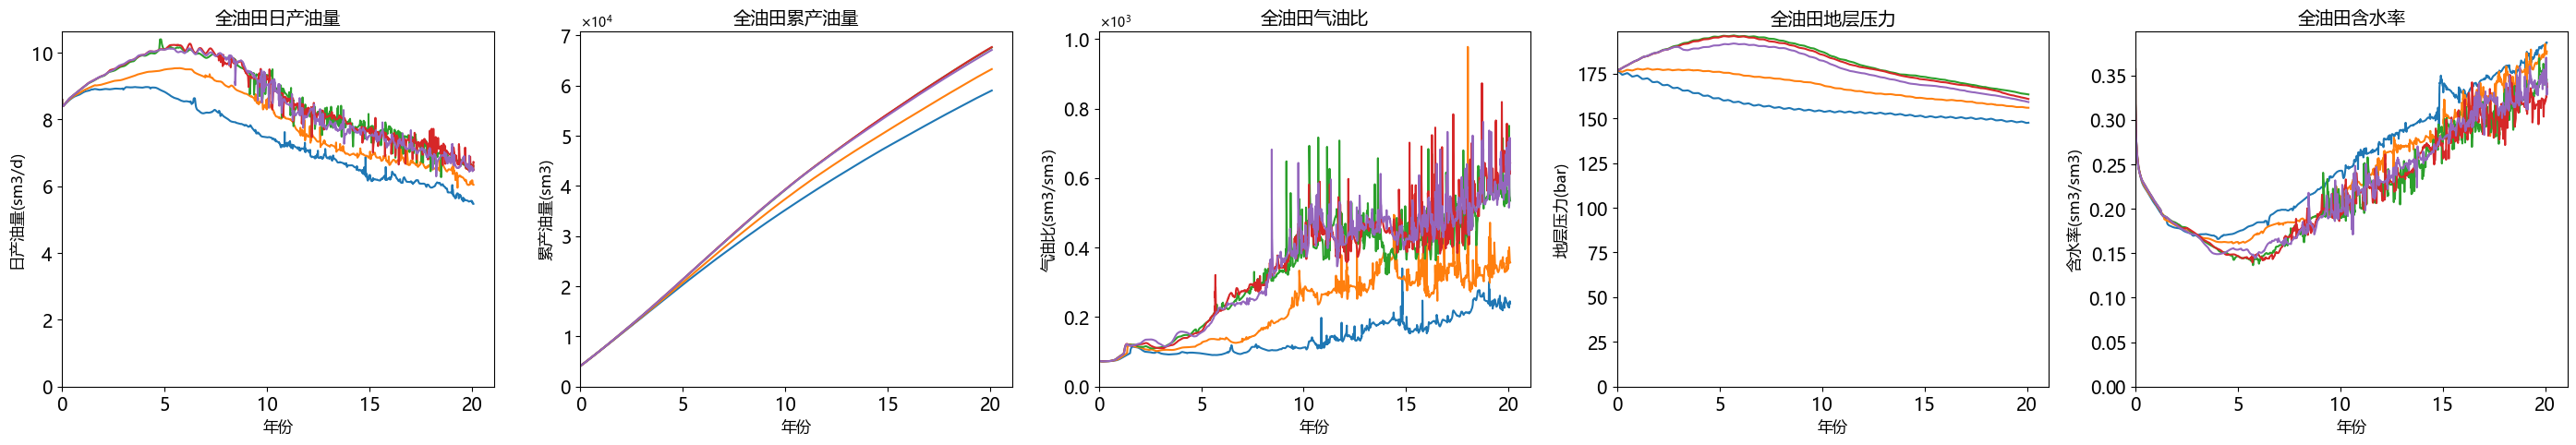

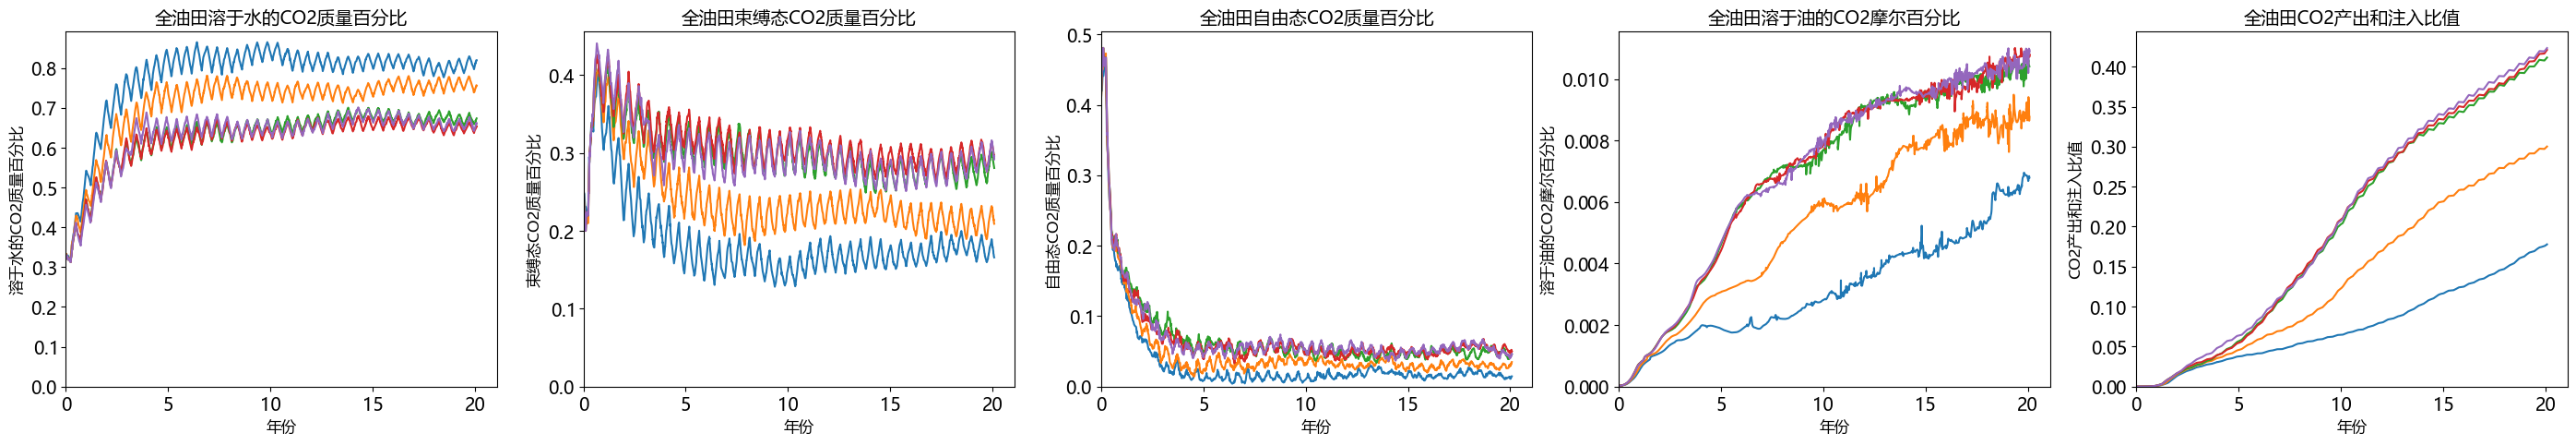

In [3]:
# 0509 ÂâîÈô§‰∏çÂ≠òÂú®Êï∞ÊçÆÁöÑÊï∞ÊçÆË°å
# V4 Â¢ûÂä†‰∫ÜÁôæÂàÜÊØîÁöÑËÆæÁΩÆ 0114
# ‰ªéPetrelÂØºÂá∫excelÂêéÊâπÈáèÁªòÂõæ
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import re 
import warnings
import matplotlib.ticker as ticker
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = ['Microsoft YaHei']
# plt.rcParams['axes.unicode_minus'] = False
 
# ÂàõÂª∫Â≠óÂÖ∏ÔºåÂ≠òÂÇ®Ëã±ÊñáÂà∞‰∏≠ÊñáÁöÑÂØπÂ∫îÂÖ≥Á≥ª
prop_dict = {
    "Aqueous component mass": "Ê∫∂‰∫éÊ∞¥ÁöÑCO2Ë¥®ÈáèÁôæÂàÜÊØî",
    "Component mass production rate": "CO2‰∫ßÈáè(Ë¥®Èáè)",
    "Immobile vapor component mass": "ÊùüÁºöÊÄÅCO2Ë¥®ÈáèÁôæÂàÜÊØî",
    "Liquid component mole fraction": "Ê∫∂‰∫éÊ≤πÁöÑCO2Êë©Â∞îÁôæÂàÜÊØî",
    "Mobile vapor component mass": "Ëá™Áî±ÊÄÅCO2Ë¥®ÈáèÁôæÂàÜÊØî",
    "Gas mass injection rate": "CO2Ê≥®ÂÖ•Èáè(Ë¥®Èáè)",
    "Oil production cumulative": "Á¥Ø‰∫ßÊ≤πÈáè",
    "Pressure": "Âú∞Â±ÇÂéãÂäõ",
    "Water mass injection rate": "Ê≥®Ê∞¥Èáè(Ë¥®Èáè)",
    "Gas injection rate" : "CO2Ê≥®ÂÖ•Èáè",
    "Gas reservoir density": "CO2Âú∞‰∏ãÂØÜÂ∫¶",
    "Oil production rate": "Êó•‰∫ßÊ≤πÈáè",
    "Oil recovery efficiency" : "ÈááÊî∂Áéá",
    "Reservoir volume injection rate" : "Âú∞‰∏ã‰ΩìÁßØÊ≥®ÂÖ•Èáè",
    "Water cut": "Âê´Ê∞¥Áéá",
    "Gas-oil ratio": "Ê∞îÊ≤πÊØî",
    "Tracer production rate": "CO2‰∫ßÈáè",
    "Tracer production cumulative": "CO2‰∫ßÂá∫ÂíåÊ≥®ÂÖ•ÊØîÂÄº"
}

identifier_dict = {
    "Field": "ÂÖ®Ê≤πÁî∞"
}
yunlv = ['Pos', 'Neg', 'PosNeg', 'NegPos']
EOR = ["Oil production rate", "Oil production cumulative", "Gas-oil ratio", "Pressure", "Water cut"]
CCS = ["Aqueous component mass", "Immobile vapor component mass", "Mobile vapor component mass", "Liquid component mole fraction", "Tracer production rate"]
CCS2 = ["Aqueous component mass", "Immobile vapor component mass", "Mobile vapor component mass", "Liquid component mole fraction", "Tracer production cumulative"]

# Êó†Á§∫Ë∏™ÂâÇÁî®Ëøô‰∏™
# CCS = ["Aqueous component mass", "Immobile vapor component mass", "Mobile vapor component mass", "Liquid component mole fraction", "Component mass production rate" ]

def extract_number(name):
    try:
        return int(name.split('_')[-1])
    except ValueError:
        try:
            return int(name.split('diff')[-1])
        except ValueError:
            for idx, value in enumerate(yunlv):
                if value in name.split('_'):
                    return idx
            return float('inf')  # ËøîÂõû‰∏Ä‰∏™ÂæàÂ§ßÁöÑÂÄºÔºå‰ΩøÂÖ∂Âú®ÊéíÂ∫èÊó∂‰øùÊåÅÂéüÊù•ÁöÑÈ°∫Â∫è

class CustomScalarFormatter(ticker.ScalarFormatter):
    def __init__(self, threshold=1000, *args, **kwargs):
        self.threshold = threshold
        super().__init__(*args, **kwargs)

    def set_locs(self, locs):
        super().set_locs(locs)
        self.set_scientific(False)
        if any(abs(l) >= self.threshold for l in locs):
            self.set_scientific(True)

def draw_plots(df_path, plot_combo = 'EOR', legend_show=1):

    # ËØªÂèñExcelÊñá‰ª∂
    df = pd.read_excel(df_path, header=None)

    # Ëá™ÂÆö‰πâÂõæ‰æã
    legends = df.iloc[2, 1:].dropna().tolist()

    # ÂàùÂßãÂåñÂèòÈáè
    attributes = []
    start_indices = []
    identifiers = []
    # ÊâæÂá∫Â±ûÊÄßËµ∑ÂßãË°åÂíåÂ±ûÊÄßÂêçÁß∞
    for i, row in df.iterrows():
        if not pd.isna(row[0]) and all(pd.isna(row[1:])):
            identifiers.append(row[0].split(',')[0].strip())
            attributes.append(row[0].split(',')[-1].strip())
            start_indices.append(i)

    # ËÆ°ÁÆóÊØè‰∏™Â±ûÊÄßÁöÑÁªìÊùüË°å
    end_indices = start_indices[1:] + [len(df)]

    # ËÆæÁΩÆÂ≠êÂõæÁöÑÊéíÁâàÂèÇÊï∞
    if plot_combo == 'EOR':
        rows = 1 # ËÆæÁΩÆÂ≠êÂõæÁöÑË°åÊï∞
        cols = 5  # ËÆæÁΩÆÂ≠êÂõæÁöÑÂàóÊï∞
        plot_attrs = EOR
        fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows), gridspec_kw={'hspace': 0.3})
    elif plot_combo == 'CCS':
        rows = 1  # ËÆæÁΩÆÂ≠êÂõæÁöÑË°åÊï∞
        cols = 5  # ËÆæÁΩÆÂ≠êÂõæÁöÑÂàóÊï∞
        plot_attrs = CCS
        fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows),  gridspec_kw={'hspace': 0.3})
    elif plot_combo == 'CCS2':
        rows = 1  # ËÆæÁΩÆÂ≠êÂõæÁöÑË°åÊï∞
        cols = 5  # ËÆæÁΩÆÂ≠êÂõæÁöÑÂàóÊï∞
        plot_attrs = CCS2
        fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows),  gridspec_kw={'hspace': 0.3})

    plot_order = 0
    # ËÆ°ÁÆó all_storage Âíå tracer_inj_cum
    all_storage = None
    tracer_inj_cum = None

    # ÈÅçÂéÜÊâÄÊúâÂ±ûÊÄßÔºåÈ¢ÑËÆ°ÁÆóÊâÄÈúÄÁöÑÊÄªÂíå
    for attr, start_idx, end_idx in zip(attributes, start_indices, end_indices):
        if attr in ["Aqueous component mass", "Immobile vapor component mass", "Mobile vapor component mass"]:
            data = df.iloc[start_idx+4:end_idx, :]
            data.columns = df.iloc[start_idx+1, :]
            data = data.drop(columns=['X']).apply(pd.to_numeric, errors='coerce')
            
            # ÂàõÂª∫‰∏Ä‰∏™‰∏çÂê´ÂÖ®NaNË°åÁöÑÊñ∞Êï∞ÊçÆÊ°Ü
            valid_data = data.dropna(how='all')
            data_array = valid_data.fillna(0).to_numpy()
            
            if all_storage is None:
                all_storage = data_array
            else:
                # Á°Æ‰øùÂΩ¢Áä∂ÂåπÈÖçÔºåÂèØËÉΩÈúÄË¶ÅË∞ÉÊï¥
                if all_storage.shape == data_array.shape:
                    all_storage += data_array
                else:
                    # Â§ÑÁêÜÂΩ¢Áä∂‰∏çÂåπÈÖçÁöÑÊÉÖÂÜµ
                    print(f"Warning: Shape mismatch for {attr}. Skipping addition.")
                    
        elif attr == "Tracer injection cumulative":
            data = df.iloc[start_idx+4:end_idx, :]
            data.columns = df.iloc[start_idx+1, :]
            data = data.drop(columns=['X']).apply(pd.to_numeric, errors='coerce')
            
            # ÁßªÈô§ÂÖ®ÊòØNaNÁöÑË°å
            valid_data = data.dropna(how='all')
            data_array = valid_data.fillna(0).to_numpy()
            tracer_inj_cum = data_array
    
    # Á°Æ‰øùall_storageÂíåtracer_inj_cumÊòØDataFrame
    if all_storage is not None:
        all_storage = pd.DataFrame(all_storage)
    if tracer_inj_cum is not None:
        tracer_inj_cum = pd.DataFrame(tracer_inj_cum)

    # ÈÅçÂéÜ plot_attrs Âπ∂ÁªòÂõæ
    for prop in plot_attrs:
        for idx, (attr, start_idx, end_idx) in enumerate(zip(attributes, start_indices, end_indices)):
            if attr == prop:

                row = plot_order // cols
                col = plot_order % cols
                ax = axes[row, col] if rows > 1 and cols > 1 else axes[plot_order]

                match = re.search(r'\[(.*?)\]', df.iloc[start_idx+3, 1])  # type: ignore
                if match:
                    unit_ = '(' + match.group(1) + ')'
                    if unit_ == '(kg)':
                        unit_ = ''                    
                else:
                    unit_ = ''
                    
                data = df.iloc[start_idx+4:end_idx, :]
                data.columns = df.iloc[start_idx+1, :]
                
                # Â§ÑÁêÜÊó∂Èó¥Âàó
                data['X'] = pd.to_datetime(data['X'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
                
                # ËøáÊª§ÊéâXÂàóÊó†ÊïàÁöÑË°å
                data = data[data['X'].notna()]
                
                # Â∞ÜÂÖ∂‰ªñÂàóËΩ¨Êç¢‰∏∫Êï∞ÂÄºÁ±ªÂûã
                data2 = data.drop(columns=['X']).apply(pd.to_numeric, errors='coerce')
                
                # ËÆ°ÁÆóÂπ¥‰ªΩ‰ø°ÊÅØ
                data['Year'] = data['X'].dt.year
                data['YearCount'] = data['X'].dt.year + (data['X'].dt.dayofyear - 1) / 365.25
                data['YearCount'] = data['YearCount'] - data['YearCount'].min()
                
                # Ê†πÊçÆ prop ÁöÑÁ±ªÂûãÂ§ÑÁêÜÊï∞ÊçÆ
                if prop in ["Aqueous component mass", "Immobile vapor component mass", "Mobile vapor component mass"]:
                    if all_storage is not None:
                        # ÂØπÊØè‰∏ÄÂàóÂàÜÂà´Â§ÑÁêÜÔºåÂéªÈô§NaNÂÄº
                        for col_idx, legend in enumerate(legends):
                            if col_idx < data2.shape[1]:  # Á°Æ‰øùÂàóÁ¥¢ÂºïÊúâÊïà
                                # ÂàõÂª∫‰ªÖÂåÖÂê´ÂΩìÂâçÂàóÊúâÊïàÊï∞ÊçÆÁöÑmask
                                valid_mask = ~data2.iloc[:, col_idx].isna()
                                
                                # ‰øÆÂ§çÔºö‰ΩøÁî®numpyÊï∞ÁªÑÁ¥¢ÂºïËÄå‰∏çÊòØSeriesÁ¥¢Âºï
                                valid_indices = np.where(valid_mask.values)[0]
                                
                                if all_storage.shape[0] > 0 and col_idx < all_storage.shape[1]:
                                    # ‰ªÖÂØπÊúâÊïàË°åËøõË°åÂ§ÑÁêÜ
                                    for i in valid_indices:
                                        if i < len(all_storage) and all_storage.iloc[i, col_idx] != 0:
                                            data2.iloc[i, col_idx] = data2.iloc[i, col_idx] / all_storage.iloc[i, col_idx]
                                        else:
                                            data2.iloc[i, col_idx] = 0
                
                elif prop == "Tracer production cumulative" and tracer_inj_cum is not None:
                    # ÂØπÊØè‰∏ÄÂàóÂàÜÂà´Â§ÑÁêÜÔºåÂéªÈô§NaNÂÄº
                    for col_idx, legend in enumerate(legends):
                        if col_idx < data2.shape[1]:  # Á°Æ‰øùÂàóÁ¥¢ÂºïÊúâÊïà
                            # ÂàõÂª∫‰ªÖÂåÖÂê´ÂΩìÂâçÂàóÊúâÊïàÊï∞ÊçÆÁöÑmask
                            valid_mask = ~data2.iloc[:, col_idx].isna()
                            
                            # ‰øÆÂ§çÔºö‰ΩøÁî®numpyÊï∞ÁªÑÁ¥¢ÂºïËÄå‰∏çÊòØSeriesÁ¥¢Âºï
                            valid_indices = np.where(valid_mask.values)[0]
                            
                            if tracer_inj_cum.shape[0] > 0 and col_idx < tracer_inj_cum.shape[1]:
                                # ‰ªÖÂØπÊúâÊïàË°åËøõË°åÂ§ÑÁêÜ
                                for i in valid_indices:
                                    if i < len(tracer_inj_cum) and tracer_inj_cum.iloc[i, col_idx] != 0:
                                        data2.iloc[i, col_idx] = data2.iloc[i, col_idx] / tracer_inj_cum.iloc[i, col_idx]
                                    else:
                                        data2.iloc[i, col_idx] = 0

                # Ëé∑ÂèñÂàóÂêçÂíåÂØπÂ∫îÁöÑÁ¥¢Âºï
                sorted_legends = sorted(legends, key=extract_number)
                lines = []
                for legend in sorted_legends:
                    # ÊâæÂà∞ legends ‰∏≠ÂØπÂ∫îÁöÑÁ¥¢Âºï
                    index = legends.index(legend)
                    if index < data2.shape[1]:  # Á°Æ‰øùÁ¥¢ÂºïÊúâÊïà
                        # Ëé∑ÂèñÂΩìÂâçÂàóÁöÑÊúâÊïàÊï∞ÊçÆ
                        current_col_data = data2.iloc[:, index]
                        valid_mask = ~current_col_data.isna()
                        
                        # ‰øÆÂ§çÔºö‰ΩøÁî®numpyÊï∞ÁªÑËøõË°åÂ∏ÉÂ∞îÁ¥¢Âºï
                        valid_mask_array = valid_mask.values
                        
                        if np.any(valid_mask_array):  # Á°Æ‰øùÊúâÊúâÊïàÊï∞ÊçÆ
                            # Âè™ÁªòÂà∂ÊúâÊïàÊï∞ÊçÆÁÇπ
                            valid_years = data['YearCount'].values[valid_mask_array]
                            valid_values = current_col_data.values[valid_mask_array]
                            
                            line, = ax.plot(valid_years, valid_values, label=legend)
                            lines.append(line)

                chinese_title = identifier_dict.get(identifiers[idx], identifiers[0]) + prop_dict.get(attr, attr)
                formatter = CustomScalarFormatter(threshold=1000, useMathText=True)
                formatter.set_scientific(True)
                formatter.set_powerlimits((-1, 1))  # ËÆæÁΩÆÁßëÂ≠¶ËÆ°Êï∞Ê≥ïÁöÑÊòæÁ§∫ËåÉÂõ¥
                ax.yaxis.set_major_formatter(formatter)

                ax.set_title(chinese_title, fontsize=14)
                ax.set_xlabel('Âπ¥‰ªΩ', fontsize=12)
                ax.set_ylabel(prop_dict.get(attr, attr) + f'{unit_}', fontsize=12)
                ax.tick_params(axis='x', labelsize=14)  # ËÆæÁΩÆXËΩ¥ÂàªÂ∫¶Ê†áÁ≠æÂ≠ó‰ΩìÂ§ßÂ∞è‰∏∫12
                ax.tick_params(axis='y', labelsize=14)  # ËÆæÁΩÆYËΩ¥ÂàªÂ∫¶Ê†áÁ≠æÂ≠ó‰ΩìÂ§ßÂ∞è‰∏∫12
                # ËÆæÁΩÆXËΩ¥ÂíåYËΩ¥ÁöÑÊúÄÂ∞èÂÄº‰∏∫0
                ax.set_xlim(left=0)
                ax.set_ylim(bottom=0)
                if legend_show and lines:  # Á°Æ‰øùÊúâÁ∫øÊù°ÊâçÊòæÁ§∫Âõæ‰æã
                    actual_legends = [line.get_label() for line in lines]
                    ax.legend(lines, actual_legends)
        plot_order += 1

    plt.tight_layout()
    plt.show()
# df_path = r'D:\NEW_DATA\Models\ÂåñÂ≠êÂπ≥\Plotting_0002_resampled.xlsx'
df_path = r'D:\NEW_DATA\Models\ÂåñÂ≠êÂù™\WAG-Ê≥®Ê∞îÈÄüÁéá.xlsx'

draw_plots(df_path, plot_combo='EOR', legend_show=0)
draw_plots(df_path, plot_combo='CCS2', legend_show=0)

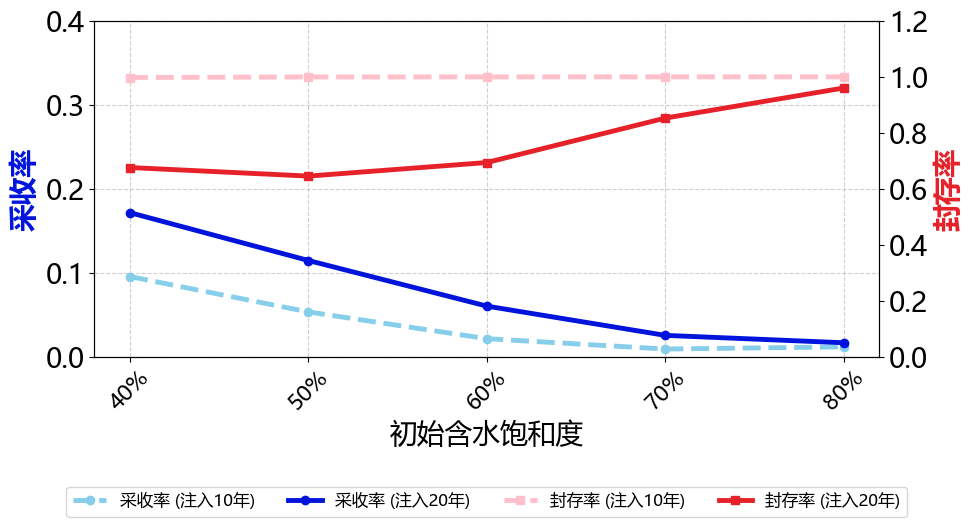

In [ ]:
# 0623 Â¢ûÂä†‰∫ÜÂõæ‰æãËæìÂá∫ÊéßÂà∂
# 0618 Êú∫ÁêÜÊ®°ÂûãÂõæÁâàÔºåÂ¢ûÂä†‰∫Üymin, ymaxÊéßÂà∂ÔºåÈ¢úËâ≤Áªü‰∏Ä
# 0616 ÂõæÁâà
# ÂçïÂõ†Á¥†ÈááÊî∂ÁéáÂíåÂ∞ÅÂ≠òÁéáÊ®°ÊãüÁªìÊûú
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
test_df = pd.DataFrame()
def plot_dual_axis(df_path, legend_list=False, prop_name = False, y1_min=0, y1_max=0.08, y2_min=0.0, y2_max=1.0, show_legend=False):
    df = pd.read_excel(df_path, header=None)

    # Ëá™ÂÆö‰πâÂõæ‰æã
    legends = df.iloc[2, 1:].dropna().tolist()

    # ÂàùÂßãÂåñÂèòÈáè
    attributes = []
    start_indices = []

    # ÊâæÂá∫Â±ûÊÄßËµ∑ÂßãË°åÂíåÂ±ûÊÄßÂêçÁß∞
    for i, row in df.iterrows():
        if not pd.isna(row[0]) and all(pd.isna(row[1:])):
            attributes.append(row[0].split(',')[1].strip())
            start_indices.append(i)

    # ËÆ°ÁÆóÊØè‰∏™Â±ûÊÄßÁöÑÁªìÊùüË°å
    end_indices = start_indices[1:] + [len(df)]

    Component_df = pd.DataFrame()
    injection_df = pd.DataFrame()
    OPC_df = pd.DataFrame()

    for idx, (attr, start_idx, end_idx) in enumerate(zip(attributes, start_indices, end_indices)):
        data = df.iloc[start_idx + 4:end_idx, :]
        data.columns = df.iloc[start_idx + 1, :]
        data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0], format='%m/%d/%Y')
        # data2 = data.drop(columns=[data.columns[0]]).apply(pd.to_numeric, errors='coerce')
        data2 = data.copy()  # ÂàõÂª∫ÂâØÊú¨‰ª•‰øùÁïôÂéüÂßãÊï∞ÊçÆ
        data2.iloc[:, 1:] = data2.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
        if attr == 'Tracer production cumulative':
            Component_df = data2
        if attr == 'Tracer injection cumulative':
            injection_df = data2
        if attr == 'Oil recovery efficiency':
            OPC_df = data2

    Component_df = Component_df.reset_index(drop=True)
    Component_df.iloc[:, 1:] = Component_df.iloc[:, 1:].fillna(method='ffill')

    injection_df = injection_df.reset_index(drop=True)
    injection_df.iloc[:, 1:] = injection_df.iloc[:, 1:].fillna(method='ffill')
    # ËÆ°ÁÆóÂ∞ÅÂ≠òÁéá
    # ÂàõÂª∫ storage_rate_df ÁöÑÂâØÊú¨‰ª•‰øùÁïôÂéüÂßãÊï∞ÊçÆ
    storage_rate_df = Component_df.copy()

    # ÊõøÊç¢ injection_df ‰∏≠ÁöÑ 0 ‰∏∫‰∏Ä‰∏™ÈùûÂ∏∏Â∞èÁöÑÂÄºÔºàÈÅøÂÖçÈô§‰ª• 0 ÁöÑÈîôËØØÔºâ
    safe_injection_df = injection_df.iloc[:, 1:].replace(0, 1e-10)

    # ‰ªÖÂØπÁ¨¨‰∫åÂàóÂèäÂÖ∂‰πãÂêéÁöÑÂàóËøõË°åËÆ°ÁÆó
    storage_rate_df.iloc[:, 1:] = (1 - Component_df.iloc[:, 1:] / safe_injection_df)

    # Â∞ÜÁ¨¨‰∫åÂàóÂèäÂÖ∂‰πãÂêéÁöÑÂàóÂº∫Âà∂ËΩ¨Êç¢‰∏∫Êï∞ÂÄºÁ±ªÂûãÔºàÈÅøÂÖç dtype ÈóÆÈ¢òÔºâ
    storage_rate_df.iloc[:, 1:] = storage_rate_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    # ‰ªÖÂØπÁ¨¨‰∫åÂàóÂèäÂÖ∂‰πãÂêéÁöÑÂàóËøõË°åÊèíÂÄº
    # storage_rate_df.iloc[:, 1:] = storage_rate_df.iloc[:, 1:].interpolate(method='linear')

    # Á¨¨‰∏ÄÂàóÔºàÊó•ÊúüÂàóÔºâ‰øùÊåÅ‰∏çÂèò
    storage_rate_df.iloc[:, 0] = Component_df.iloc[:, 0]

    # ‰ªÖÂØπÁ¨¨‰∫åÂàóÂèäÂÖ∂‰πãÂêéÁöÑÂàóËøõË°åÊèíÂÄº
    # OPC_df.iloc[:, 1:] = OPC_df.iloc[:, 1:].interpolate(method='linear')
    # Á¨¨‰∏ÄÂàóÔºàÊó•ÊúüÂàóÔºâ‰øùÊåÅ‰∏çÂèò
    OPC_df.iloc[:, 0] = OPC_df.iloc[:, 0]  # ËøôË°åÂÆûÈôÖ‰∏äÂèØÁúÅÁï•ÔºåÂõ†‰∏∫Á¨¨‰∏ÄÂàóÊ≤°ÊúâË¢´‰øÆÊîπ

    # Á≠õÈÄâÁ¨¨‰∏ÄÂàóÂÄº‰∏∫ '2014-01-01' ÁöÑË°å
    storage_rate_2014 = storage_rate_df[storage_rate_df.iloc[:, 0] == pd.Timestamp('2014-01-01 00:00:00')]
    storage_rate_2024 = storage_rate_df[storage_rate_df.iloc[:, 0] == pd.Timestamp('2024-01-01 00:00:00')]
    recovery_rate_2014 = OPC_df[OPC_df.iloc[:, 0] == pd.Timestamp('2014-01-01 00:00:00')]
    recovery_rate_2024 = OPC_df[OPC_df.iloc[:, 0] == pd.Timestamp('2024-01-01 00:00:00')]

    # ÊèêÂèñÂÄº‰Ωú‰∏∫ Y ËΩ¥Êï∞ÊçÆ
    storage_rate_2014 = storage_rate_2014.iloc[:, 1:].values.flatten()
    storage_rate_2024 = storage_rate_2024.iloc[:, 1:].values.flatten()
    recovery_rate_2014 = recovery_rate_2014.iloc[:, 1:].values.flatten()
    recovery_rate_2024 = recovery_rate_2024.iloc[:, 1:].values.flatten()

    # ÂàõÂª∫ÂõæË°®
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()  # ÂàõÂª∫Ê¨°ÂùêÊ†áËΩ¥

    x = range(len(legends))
    # ÁªòÂà∂Êï∞ÊçÆÂπ∂‰øùÂ≠òÁ∫øÊù°ÂØπË±°Ôºå‰ΩøÁî®ÂêåËâ≤Á≥ªÁöÑÊµÖËâ≤ÂíåÊ∑±Ëâ≤
    line1 = ax1.plot(x, recovery_rate_2014, color='#87CEEB', label='ÈááÊî∂Áéá (Ê≥®ÂÖ•10Âπ¥)', linestyle='--', marker='o', linewidth=3.5)  # ÊµÖËìùËâ≤
    line2 = ax1.plot(x, recovery_rate_2024, color='#0014DC', label='ÈááÊî∂Áéá (Ê≥®ÂÖ•20Âπ¥)', linestyle='-', marker='o', linewidth=3.5)    # Ê∑±ËìùËâ≤
    line3 = ax2.plot(x, storage_rate_2014, color='#FFC0CB', label='Â∞ÅÂ≠òÁéá (Ê≥®ÂÖ•10Âπ¥)', linestyle='--', marker='s', linewidth=3.5)  # ‰∏≠Á≠âÁ∫¢Ëâ≤
    line4 = ax2.plot(x, storage_rate_2024, color='#e62129', label='Â∞ÅÂ≠òÁéá (Ê≥®ÂÖ•20Âπ¥)', linestyle='-', marker='s', linewidth=3.5)    # Ê∑±Á∫¢Ëâ≤

    # ËÆæÁΩÆ X ËΩ¥
    ax1.set_xticks(x)
    if legend_list:
        ax1.set_xticklabels(legend_list, rotation=45, fontsize=16)
    else:
        ax1.set_xticklabels(legends, rotation=45, fontsize=16)
    
    if prop_name:
        ax1.set_xlabel(prop_name, fontsize=20)
    else:
        ax1.set_xlabel('Cases', fontsize=20)

    # ËÆæÁΩÆ Y ËΩ¥
    ax1.set_ylabel('ÈááÊî∂Áéá', fontsize=20, color='#0014DC', weight=600)  # ‰ΩøÁî®Ê∑±ËìùËâ≤
    ax2.set_ylabel('Â∞ÅÂ≠òÁéá', fontsize=20, color='#e62129', weight=600)# ‰ΩøÁî®Ê∑±Á∫¢Ëâ≤
    ax1.set_ylim(y1_min, y1_max)
    ax2.set_ylim(y2_min, y2_max)
    # ËÆæÁΩÆYËΩ¥ÂàªÂ∫¶Â≠ó‰ΩìÂ§ßÂ∞è
    ax1.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)

    # Ê∑ªÂä†Âõæ‰æã
    if show_legend:
        lines = line1 + line2 + line3 + line4
        labels = [l.get_label() for l in lines]
        ax1.legend(lines, labels, loc='lower center', fontsize=12, ncol=len(lines), bbox_to_anchor=(0.5, -0.5))

    # ÁΩëÊ†ºÂíåÊ†áÈ¢ò
    ax1.grid(visible=True, linestyle='--', alpha=0.6)
    # plt.title('ÂçïÂõ†Á¥†ÈááÊî∂ÁéáÂíåÂ∞ÅÂ≠òÁéáÊ®°ÊãüÁªìÊûú', fontsize=18, pad=20)

    plt.tight_layout()
    plt.show()

#Êú∫ÁêÜÊ®°ÂûãÊ∏óÈÄèÁéáÂú®‰∏ãÈù¢
# plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\SWAT.xlsx', ['40%', '50%', '60%', '70%'], 'ÂàùÂßãÂê´Ê∞¥È•±ÂíåÂ∫¶', y1_min=0, y1_max=0.3, y2_min=0, y2_max=1.2, show_legend=False)
# plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\Ê≥®ÂÖ•ÈÄüÁéá.xlsx', ['5.6', '8.4', '11.2', '14.0', '16.8'], 'Ê≥®ÂÖ•ÈÄüÁéáÔºàt/dÔºâ', y1_min=0.1, y1_max=0.4, y2_min=0, y2_max=1.2, show_legend=False)
# plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\Plotting_0062.xlsx', [ 0.2, 0.3, 0.5, 1], 'ÂêÑÂêëÂºÇÊÄß', y1_min=0, y1_max=0.3, y2_min=0, y2_max=1.2, show_legend=False)
# plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\ÊûÅÂ∑Æ.xlsx', [1, 2, 5, 10], 'ÊûÅÂ∑Æ', y1_min=0.1, y1_max=0.3, y2_min=0, y2_max=1.2, show_legend=False)
# plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\Ê∏óÈÄèÁéáÈüµÂæã.xlsx', ['Ê≠£ÈüµÂæã', 'Ê≠£ÂèçÈüµÂæã', 'ÂèçÊ≠£ÈüµÂæã', 'ÂèçÈüµÂæã'], 'Ê∏óÈÄèÁéáÈüµÂæã',  y1_min=0.1, y1_max=0.3, y2_min=0.5, y2_max=1.2,show_legend=False)
# plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\WAG-Ê≥®Ê∞¥Âë®Êúü.xlsx', ['2m', '3m', '4m', '6m', '12m'], 'Ê≥®Ê∞¥Âë®Êúü', y1_min=0.1, y1_max=0.3, y2_min=0, y2_max=1.2, show_legend=False)
# plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\WAG-Ê≥®Ê∞îÂë®Êúü.xlsx', ['2m', '3m', '4m', '6m', '12m'], 'Ê≥®Ê∞îÂë®Êúü', y1_min=0.1, y1_max=0.3, y2_min=0, y2_max=1.2, show_legend=False)
# plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\WAG-Ê∞îÊ∞¥ÊØî.xlsx', ['1:1', '2:1', '3:1', '4:1', '5:1'], 'Ê∞îÊ∞¥ÊØî', y1_min=0, y1_max=0.3, y2_min=0, y2_max=1.2, show_legend=False)
# plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\Depth.xlsx', ['1000m', '2000m', '3000m', '4000m'], 'Ê∑±Â∫¶', y1_min=0, y1_max=0.4, y2_min=0, y2_max=1.2, show_legend=False)
# plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\Temp.xlsx', ['40¬∞C', '50¬∞C', '60¬∞C', '70¬∞C', '80¬∞C'], 'Ê∏©Â∫¶', y1_min=0, y1_max=0.4, y2_min=0, y2_max=1.2, show_legend=False)
plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\SWAT.xlsx', ['40%', '50%', '60%', '70%', '80%'], 'ÂàùÂßãÂê´Ê∞¥È•±ÂíåÂ∫¶', y1_min=0, y1_max=0.4, y2_min=0, y2_max=1.2, show_legend=True)


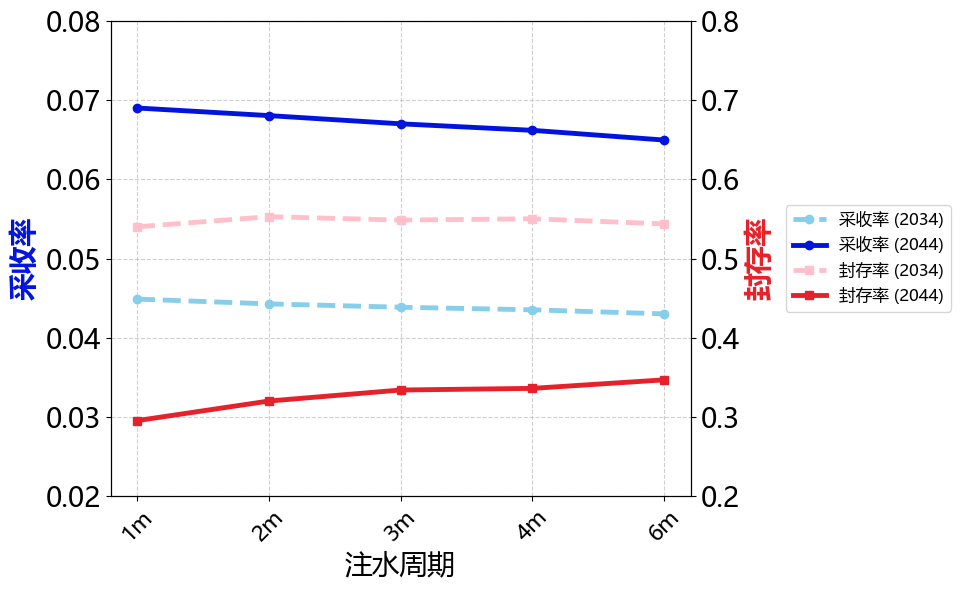

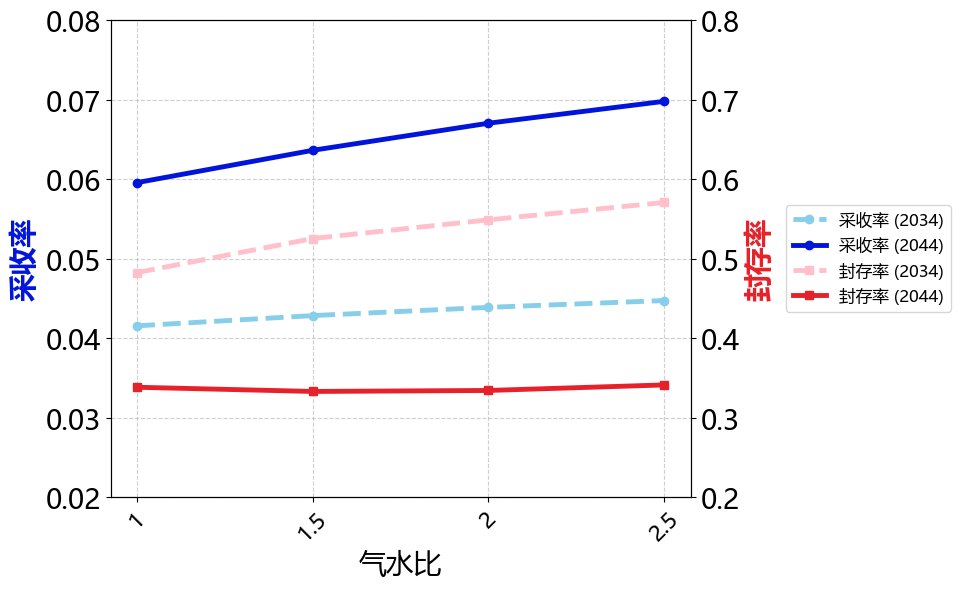

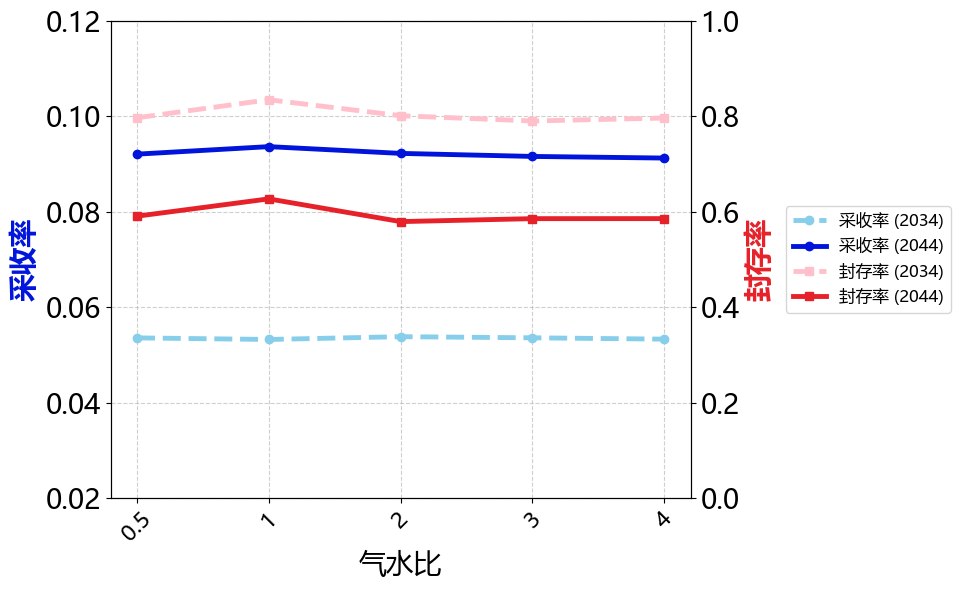

In [ ]:
# 0623 ÂÆûÈôÖÊ®°ÂûãÂõæÁâà Â¢ûÂä†‰∫ÜÂõæ‰æãËæìÂá∫ÊéßÂà∂
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore")

def plot_dual_axis(df_path, legend_list=False, prop_name=False, start_date='2024-7-4', end_date='2034-7-4', 
                  his_opc=0.0, OIP=1.0, y1_min=0.0, y1_max=0.4, y2_min=0.0, y2_max=1.0, show_legend=True):
    try:
        # Ê£ÄÊü•Êñá‰ª∂ÊòØÂê¶Â≠òÂú®
        if not os.path.exists(df_path):
            raise FileNotFoundError(f"Êñá‰ª∂‰∏çÂ≠òÂú®: {df_path}")
            
        df = pd.read_excel(df_path, header=None)

        # Ëá™ÂÆö‰πâÂõæ‰æã
        legends = df.iloc[2, 1:].dropna().tolist()

        # ÂàùÂßãÂåñÂèòÈáè
        attributes = []
        start_indices = []

        # ÊâæÂá∫Â±ûÊÄßËµ∑ÂßãË°åÂíåÂ±ûÊÄßÂêçÁß∞
        for i, row in df.iterrows():
            if not pd.isna(row[0]) and all(pd.isna(row[1:])):
                attributes.append(row[0].split(',')[1].strip())
                start_indices.append(i)

        # ËÆ°ÁÆóÊØè‰∏™Â±ûÊÄßÁöÑÁªìÊùüË°å
        end_indices = start_indices[1:] + [len(df)]

        Component_df = pd.DataFrame()
        injection_df = pd.DataFrame()
        OPC_df = pd.DataFrame()

        for idx, (attr, start_idx, end_idx) in enumerate(zip(attributes, start_indices, end_indices)):
            data = df.iloc[start_idx + 4:end_idx, :]
            data.columns = df.iloc[start_idx + 1, :]
            
            try:
                data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0], format='%Y/%m/%d')
            except Exception as e:
                try:
                    data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0])
                except Exception as e2:
                    raise

            data2 = data.copy()
            try:
                data2.iloc[:, 1:] = data2.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
            except Exception as e:
                raise

            if attr == 'Tracer production cumulative':
                Component_df = data2
            if attr == 'Tracer injection cumulative':
                injection_df = data2
            if attr == 'Oil production cumulative':
                OPC_df = data2

        # Ê£ÄÊü•Êï∞ÊçÆÊ°ÜÊòØÂê¶‰∏∫Á©∫
        if Component_df.empty or injection_df.empty or OPC_df.empty:
            raise ValueError("Êüê‰∫õÂøÖË¶ÅÁöÑÊï∞ÊçÆÊ°Ü‰∏∫Á©∫")

        # Êï∞ÊçÆÂ§ÑÁêÜ
        Component_df = Component_df.reset_index(drop=True)
        Component_df.iloc[:, 1:] = Component_df.iloc[:, 1:].fillna(method='ffill')

        injection_df = injection_df.reset_index(drop=True)
        injection_df.iloc[:, 1:] = injection_df.iloc[:, 1:].fillna(method='ffill')

        # ËÆ°ÁÆóÈááÊî∂Áéá
        OPC_df = OPC_df.reset_index(drop=True)
        OPC_df.iloc[:, 1:] = (OPC_df.iloc[:, 1:] + his_opc) / OIP

        # ËÆ°ÁÆóÂ∞ÅÂ≠òÁéá
        storage_rate_df = Component_df.copy()
        safe_injection_df = injection_df.iloc[:, 1:].replace(0, 1e-10)
        storage_rate_df.iloc[:, 1:] = (1 - Component_df.iloc[:, 1:] / safe_injection_df)
        storage_rate_df.iloc[:, 1:] = storage_rate_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
        storage_rate_df.iloc[:, 0] = Component_df.iloc[:, 0]

        # Á≠õÈÄâÁâπÂÆöÊó•ÊúüÁöÑÊï∞ÊçÆ
        try:
            start_timestamp = pd.Timestamp(start_date)
            end_timestamp = pd.Timestamp(end_date)
            
            storage_rate_start = storage_rate_df[storage_rate_df.iloc[:, 0] == start_timestamp]
            storage_rate_end = storage_rate_df[storage_rate_df.iloc[:, 0] == end_timestamp]
            recovery_rate_start = OPC_df[OPC_df.iloc[:, 0] == start_timestamp]
            recovery_rate_end = OPC_df[OPC_df.iloc[:, 0] == end_timestamp]

            if storage_rate_start.empty or storage_rate_end.empty or recovery_rate_start.empty or recovery_rate_end.empty:
                raise ValueError(f"Êú™ÊâæÂà∞ÊåáÂÆöÊó•ÊúüÁöÑÊï∞ÊçÆ: {start_date} Êàñ {end_date}")
        except Exception as e:
            raise

        # ÊèêÂèñÂÄº‰Ωú‰∏∫ Y ËΩ¥Êï∞ÊçÆ
        storage_rate_start = storage_rate_start.iloc[:, 1:].values.flatten()
        storage_rate_end = storage_rate_end.iloc[:, 1:].values.flatten()
        recovery_rate_start = recovery_rate_start.iloc[:, 1:].values.flatten()
        recovery_rate_end = recovery_rate_end.iloc[:, 1:].values.flatten()

        # ÂàõÂª∫ÂõæË°®
        fig, ax1 = plt.subplots(figsize=(10, 6))
        ax2 = ax1.twinx()

        x = range(len(legends))
        if legend_list:
            ax1.set_xticklabels(legend_list, rotation=45, fontsize=16)
        else:
            ax1.set_xticklabels(legends, rotation=45, fontsize=16)

        # ÁªòÂà∂Êï∞ÊçÆÂπ∂‰øùÂ≠òÁ∫øÊù°ÂØπË±°Ôºå‰ΩøÁî®ÂêåËâ≤Á≥ªÁöÑÊµÖËâ≤ÂíåÊ∑±Ëâ≤
        line1 = ax1.plot(x, recovery_rate_start, color='#87CEEB', label=f'ÈááÊî∂Áéá ({start_date.split("-")[0]})', linestyle='--', marker='o', linewidth=3.5)  # ÊµÖËìùËâ≤
        line2 = ax1.plot(x, recovery_rate_end, color='#0014DC', label=f'ÈááÊî∂Áéá ({end_date.split("-")[0]})', linestyle='-', marker='o', linewidth=3.5)    # Ê∑±ËìùËâ≤
        line3 = ax2.plot(x, storage_rate_start, color='#FFC0CB', label=f'Â∞ÅÂ≠òÁéá ({start_date.split("-")[0]})', linestyle='--', marker='s', linewidth=3.5)  # ‰∏≠Á≠âÁ∫¢Ëâ≤
        line4 = ax2.plot(x, storage_rate_end, color='#e62129', label=f'Â∞ÅÂ≠òÁéá ({end_date.split("-")[0]})', linestyle='-', marker='s', linewidth=3.5)    # Ê∑±Á∫¢Ëâ≤
    
        ax1.set_xticks(x)
        if prop_name:
            ax1.set_xlabel(prop_name, fontsize=20)
        else:
            ax1.set_xlabel('Cases', fontsize=20)

        # ËÆæÁΩÆ Y ËΩ¥
        ax1.set_ylabel('ÈááÊî∂Áéá', fontsize=20, color='#0014DC', weight=600)  # ‰ΩøÁî®Ê∑±ËìùËâ≤
        ax2.set_ylabel('Â∞ÅÂ≠òÁéá', fontsize=20, color='#e62129', weight=600)# ‰ΩøÁî®Ê∑±Á∫¢Ëâ≤
        ax1.set_ylim(y1_min, y1_max)
        ax2.set_ylim(y2_min, y2_max)
        ax1.tick_params(axis='y', labelsize=20)
        ax2.tick_params(axis='y', labelsize=20)

        # Ê∑ªÂä†Âõæ‰æã
        if show_legend:
            lines = line1 + line2 + line3 + line4
            labels = [l.get_label() for l in lines]
            ax1.legend(lines, labels, loc='center left', bbox_to_anchor=(1.15, 0.5), fontsize=12)
            # ax1.legend(lines, labels, loc='lower center', fontsize=12, ncol=len(lines), bbox_to_anchor=(0.5, -0.5))

        ax1.grid(visible=True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"ÂèëÁîüÈîôËØØ: {str(e)}")
        raise

# plot_dual_axis(r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\Ê∏óÈÄèÁéá.xlsx',
#  [0.2, 0.6, 2, 6, 20], 'Ê∏óÈÄèÁéá', his_opc=0.0, OIP=130714, 
#   start_date='2014-01-02', end_date='2024-01-02',
#   y1_min=0, y1_max=0.3, y2_min=0, y2_max=1.2, show_legend=False)


# plot_dual_axis(r'D:\NEW_DATA\data\HZP\HZP_ËøûÁª≠Ê≥®Ê∞î_resample.xlsx', 
#                 ['2/d','3/d','5/d','10t/d', '15t/d', '20t/d'], 'Ê≥®Ê∞îÈÄüÁéá',
#                 start_date='2034-7-4', end_date='2044-7-4',
#                 his_opc=0.0, OIP=731954, y1_min=0.02, y1_max=0.12, y2_min=0.0, y2_max=1.0)

# plot_dual_axis(r'D:\NEW_DATA\data\HZP\HZP_WAG_WINJ_PERIOD_resample.xlsx', 
#                 ['1m', '2m', '3m', '4m', '6m'], 'Ê≥®Ê∞¥Âë®Êúü',
#                 start_date='2034-7-4', end_date='2044-7-4',
#                 his_opc=0.0, OIP=731954, y1_min=0.02, y1_max=0.12, y2_min=0.0, y2_max=1.0)

# plot_dual_axis(r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_PERIOD_resample.xlsx', 
#                 ['1m', '2m', '3m', '4m', '6m'], 'Ê≥®Ê∞îÂë®Êúü',
#                 start_date='2034-7-4', end_date='2044-7-4',
#                 his_opc=0.0, OIP=731954, y1_min=0.02, y1_max=0.12, y2_min=0.0, y2_max=1.0)

# plot_dual_axis(r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_RATE_resample.xlsx', 
#                 ['3/d','5/d','10t/d', '15t/d', '20t/d'], 'Ê≥®Ê∞îÈÄüÁéá',
#                 start_date='2034-7-4', end_date='2044-7-4',
#                 his_opc=0.0, OIP=731954, y1_min=0.02, y1_max=0.12, y2_min=0.0, y2_max=1.0)

# plot_dual_axis(r'D:\NEW_DATA\data\BB\Plotting_CO2T_resample.xlsx', 
#                 ['10/d','15t/d', '20t/d', '25t/d'], 'Ê≥®Ê∞îÈÄüÁéá',
#                 start_date='2034-8-1', end_date='2044-8-1',
#                 his_opc=31290, OIP=1833150, y1_min=0.02, y1_max=0.08, y2_min=0.2, y2_max=0.8)

plot_dual_axis(r'D:\NEW_DATA\data\BB\Plotting_WAGW_resample.xlsx', 
                ['1m', '2m', '3m', '4m', '6m'], 'Ê≥®Ê∞¥Âë®Êúü',
                start_date='2034-8-1', end_date='2044-8-1',
                his_opc=31290, OIP=1833150, y1_min=0.02, y1_max=0.08, y2_min=0.2, y2_max=0.8)

# plot_dual_axis(r'D:\NEW_DATA\data\BB\Plotting_WAGG_resample.xlsx', 
#                 ['1m', '2m', '3m', '4m', '6m'], 'Ê≥®Ê∞îÂë®Êúü',
#                 start_date='2034-8-1', end_date='2044-8-1',
#                 his_opc=31290, OIP=1833150, y1_min=0.02, y1_max=0.08, y2_min=0.2, y2_max=0.8)

# plot_dual_axis(r'D:\NEW_DATA\data\BB\Plotting_TWAG_resample.xlsx', 
#                 ['10/d','15t/d', '20t/d', '25t/d'], 'Ê≥®Ê∞îÈÄüÁéá',
#                 start_date='2034-8-1', end_date='2044-8-1',
#                 his_opc=31290, OIP=1833150, y1_min=0.02, y1_max=0.08, y2_min=0.2, y2_max=0.8)

# 0626 
plot_dual_axis(r'D:\NEW_DATA\data\BB\Plotting_TWAG_resample.xlsx', 
                ['1','1.5', '2', '2.5'], 'Ê∞îÊ∞¥ÊØî',
                start_date='2034-8-1', end_date='2044-8-1',
                his_opc=31290, OIP=1833150, y1_min=0.02, y1_max=0.08, y2_min=0.2, y2_max=0.8 )

plot_dual_axis(r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_RATE_resample.xlsx', 
                ['0.5','1','2', '3', '4'], 'Ê∞îÊ∞¥ÊØî',
                start_date='2034-7-4', end_date='2044-7-4',
                his_opc=0.0, OIP=731954, y1_min=0.02, y1_max=0.12, y2_min=0.0, y2_max=1.0)

In [ ]:
# NPV v5 0618 legendÊîæÂ§ñÈù¢ÔºåÂ¢ûÂä†‰∫Ü‰∏ÄÁªÑÂè™ÂèòÊ≤π‰ª∑ÔºåÁ¢≥Á®éÔºåÁ¢≥‰ª∑Ê†º=0
# 0616 ÂàÜÂºÄÂçèÂêåÊåáÊï∞
# 0616 ÂàÜÊàêÂõõÁªÑÔºåÂØπÂ∫îÂõõ‰∏™Âú∫ÊôØ
# 0613 ÊîØÊåÅ TRADE_CO2Ôºå ro, TAX_CO2Êï∞ÁªÑÂΩ¢ÂºèÔºåÁßªÈô§‰∫ÜË∑ÉÈò∂ÂáΩÊï∞
# 0609 Êõ¥Êñ∞Ëá™ÂÆö‰πâÊ†áÁ≠æ
# 0523 ‰øÆÊ≠£‰∫Ücash flow Â∫îËØ•‰∏∫diff
# 0303, Region flow, ÈíàÂØπÂÆûÈôÖÊ®°ÂûãÔºàÊó†Â§ñÊ∫¢ËÄÉËôëÔºâ
# NPV v4 ÊûÅÈôêÊÉÖÂÜµÔºå0227ÔºåËÄÉËôëÁ¢≥Á®éÊòØÊâÄÊúâ‰∫ßÁöÑC02Ôºå‰∏ç‰ªÖ‰ªÖÊòØÁ§∫Ë∏™ÂâÇÂá∫ÁöÑCO2
# NPV v3 ËÄÉËôë‰∫ÜÁ¢≥Á®éÂíåETSÊúÄÂ∞èÂÄºÔºåÊàêÊú¨ÊúÄ‰Ωé
# NPV v2 ËÄÉËôë‰∫ÜÁ¢≥Á®é„ÄÅÁ¢≥‰∫§Êòì
# ÊØè‰∏™Êó∂Èó¥Ê≠•ÊòØ3‰∏™ÊúàÔºå‰∏ÄÂπ¥Êúâ4‰∏™Â≠£Â∫¶
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import re
import warnings
import math
import matplotlib.ticker as ticker
from typing import List, Union, Optional
warnings.filterwarnings("ignore")
yunlv = ['Pos', 'Neg', 'PosNeg', 'NegPos']
plt.rcParams['font.family'] = ['Microsoft YaHei']

# region
def extract_number(name):
    try:
        return int(name.split('_')[-1])
    except ValueError:
        try:
            return int(name.split('diff')[-1])
        except ValueError:
            for idx, value in enumerate(yunlv):
                if value in name.split('_'):
                    return idx
            return float('inf')  # ËøîÂõû‰∏Ä‰∏™ÂæàÂ§ßÁöÑÂÄºÔºå‰ΩøÂÖ∂Âú®ÊéíÂ∫èÊó∂‰øùÊåÅÂéüÊù•ÁöÑÈ°∫Â∫è

def get_attr(df_path, attr=None):
    df = pd.read_excel(df_path, header=None)

    # ÂàùÂßãÂåñÂèòÈáè
    attributes = []
    start_indices = []

    # ÊâæÂá∫Â±ûÊÄßËµ∑ÂßãË°åÂíåÂ±ûÊÄßÂêçÁß∞
    for i, row in df.iterrows():
        if not pd.isna(row[0]) and all(pd.isna(row[1:])):
            attributes.append(row[0].split(',')[1].strip())
            start_indices.append(i)

    # ËÆ°ÁÆóÊØè‰∏™Â±ûÊÄßÁöÑÁªìÊùüË°å
    end_indices = start_indices[1:] + [len(df)]

    # Ê†πÊçÆÂ±ûÊÄßÂêçÁß∞ËøîÂõûÂØπÂ∫îÁöÑDataFrame
    for idx, (attribute, start_idx, end_idx) in enumerate(zip(attributes, start_indices, end_indices)):
        if attribute == attr:
            data = df.iloc[start_idx+4:end_idx, :]
            data.columns = df.iloc[start_idx+1, :]
            # ‰øùÁïô'X'ÂàóÔºå‰∏çË¶ÅÂú®apply‰πãÂâçÂà†Èô§
            try:
                data['X'] = pd.to_datetime(data.iloc[:, 0], format='%Y-%m-%d %H:%M:%S')
            except:
                data['X'] = pd.to_datetime(data.iloc[:, 0], format='%Y/%m/%d')

            # Â∞ÜÈô§‰∫Ü'X'Âàó‰ª•Â§ñÁöÑÂÖ∂‰ªñÂàóËΩ¨Êç¢‰∏∫Êï∞ÂÄºÁ±ªÂûã
            data_df = data.drop(columns=['X']).apply(pd.to_numeric, errors='coerce')
            # ÊåâÂπ¥Êï¥ÁêÜÔºåÁ©∫ÂÄºË∑≥Ëøá
            yearly_data = pd.DataFrame()
            for year, group in data_df.groupby(data['X'].dt.year):  # ‰ΩøÁî®data‰∏≠ÁöÑ'X'ÂàóËøõË°åÂàÜÁªÑ
                group = group.dropna()  # Ë∑≥ËøáÁ©∫ÂÄº
                yearly_data = pd.concat([yearly_data, group], ignore_index=True)
            return yearly_data
    return pd.DataFrame()

def get_case_names(df_path):
    df = pd.read_excel(df_path, header=None)
    return df.iloc[2, 1:].dropna().tolist()

def calculate_npv(cash_flows, discount_rate=0.1, periods_per_year=1):
    npv = 0
    for i, cash in enumerate(cash_flows):
        # Â∞ÜÊó∂Èó¥Ê≠•ËΩ¨Êç¢‰∏∫Âπ¥Êï∞
        time_in_years = i / periods_per_year
        npv += cash / ((1 + discount_rate) ** time_in_years)
    return npv

# ÂéüÊ≤π‰∫ßÈáèÔºåCO2Ê≥®ÂÖ•ÈáèÔºåÊ≥®Ê∞¥ÈáèÔºåCO2‰∫ßÈáèÔºå ‰∫ßÊ∞¥ÈáèÔºåCO2Â∞ÅÂ≠òÈáè
# qt_o, qt_CO2_i, qt_W_i, qt_CO2_p, qt_W_p, Vt_CCS

# ËÆæÁΩÆÊõøÊç¢Â≠óÂÖ∏
replacement_dict = {
    "_PosNeg": "Ê≠£ÂèçÈüµÂæã",
    "_NegPos": "ÂèçÊ≠£ÈüµÂæã",
    "_Pos": "Ê≠£ÈüµÂæã",
    "_Neg": "ÂèçÈüµÂæã",
    "RES_INJ_base": "",
    "_": ""
}

# Heaviside Ê≠•ËøõÂáΩÊï∞ÔºàÂçï‰ΩçÈò∂Ë∑ÉÂáΩÊï∞Ôºâ
def heaviside(x):
    return np.where(x < 0, 0, 1)

def calculate_synergy_index(x1: float, x2: float) -> float:
    """
    ËÆ°ÁÆóÂçèÂêåÊåáÊï∞
    x1: ÂéüÊ≤πÈááÊî∂Áéá
    x2: 1 - CO2‰∫ßÂá∫Áéá
    """
    if x1 == 0:  # Èò≤Ê≠¢Èô§Èõ∂ÈîôËØØ
        return 0
    return 23.688640 * (x2/x1)**8.418189 + 0.305869

def cal_npv_from_excel(df_path: str, csv_name: str, fig_title: str, n_cols: int = 3, n_rows: int = 2, 
                      ro: Union[float, List[float]] = 3173, r_CO2_i: float = 1.2, r_W_i: float = 20.6, 
                      r_re_CO2: float = 0.15, r_CO2: float = 0.65, r_re_W: float = 1.5, 
                      TAX_CO2: Union[float, List[float]] = 0.114, SUB_CO2: float = 0.114, 
                      TRADE_CO2: Union[float, List[float]] = 0.182, Limit2: float = 900000, 
                      x_labels: Optional[List[str]] = None, x_axis_name: str = 'ÊñπÊ°àÁºñÂè∑',
                      OIP: float = 725595, figsize_X = 12, show_legend = False):
    """
    qt_o: ÂéüÊ≤π‰∫ßÈáè, m3
    qt_CO2_i: Áîü‰∫ßÊó∂Èó¥ÂÜÖÁ¥ØËÆ°CO2Ê≥®ÂÖ•Èáè, m3
    qt_W_i: Ê≥®Ê∞¥Èáè, m3
    qt_W_p: ‰∫ßÊ∞¥Èáè, m3
    qt_CO2_p: ‰ªéÁîü‰∫ß‰∫ï‰∏≠ÂàÜÁ¶ªCO2ÁöÑÈáè, m3
    q_re_CO2: CO2 ÂõûÊî∂Èáè, m3
    ro: ÂéüÊ≤π‰ª∑Ê†º, 3800 ÂÖÉ/m3 (ÊîØÊåÅÊï∞ÁªÑ)
    r_CO2_i: CO2Ê≥®ÂÖ•ÊÄªÊàêÊú¨Ôºå1.2 ÂÖÉ/m3
    r_W_i: Ê∞¥Ê≥®ÂÖ•ÊÄªÊàêÊú¨Ôºå 20.6 ÂÖÉ/m3
    r_re_W, Áîü‰∫ß‰∫ïÈááÂá∫Ê∞¥Â§ÑÁêÜÊàêÊú¨ 1.5 ÂÖÉ/m3
    r_W_, Ê≥®Ê∞¥ÊàêÊú¨, 5.56 ÂÖÉ/m3
    r_CO2, CO2ÁöÑÁîü‰∫ßÊî∂Áõä, 0.65 ÂÖÉ/m3
    r_re_CO2, ‰∫ßÂá∫Ê∞îÂõûÊî∂CO2ÊàêÊú¨Ôºå0.15 ÂÖÉ/m3
    TAX_CO2, Ë∂ÖÂá∫ÊéíÊîæÈ¢ùÊâÄÁº¥Á∫≥ÁöÑÁ¢≥Á®éÔºàËã•ÊúâÔºâ,  0.14 ÂÖÉ/m3 (ÊîØÊåÅÊï∞ÁªÑ)
    SUB_CO2, ÊîøÂ∫úÁõ∏ÂÖ≥ÈÉ®Èó®ÂØπÁ¢≥Â∞ÅÂ≠òÁöÑË°•Ë¥¥,  0.114 ÂÖÉ/m3
    TRADE_CO2, ÊéíÊîæÈ¢ù‰ΩôÈáèÂú®Á¢≥‰∫§ÊòìÂ∏ÇÂú∫ÁöÑÁ¢≥‰ª∑ÔºàËã•Êúâ),  0.182 ÂÖÉ/m3 (ÊîØÊåÅÊï∞ÁªÑ)
    Limit1, ËÄÉËôëÁ¢≥Á®éÊó∂‰ºÅ‰∏öÁ¢≥ÊéíÊîæÈ¢ù, 900000 m3
    Limit2, ËÄÉËôëÁ¢≥‰∫§ÊòìÊó∂‰ºÅ‰∏öÁ¢≥ÊéíÊîæÈ¢ù, 900000 m3
    Vt_CCS: CO2Â∞ÅÂ≠òÈáè, m3
    x_labels: Ëá™ÂÆö‰πâXËΩ¥Ê†áÁ≠æÂàóË°®ÔºåÂ¶ÇNoneÂàô‰ΩøÁî®ÈªòËÆ§ÁºñÂè∑
    x_axis_name: XËΩ¥ÂùêÊ†áÂêçÁß∞ÔºåÈªòËÆ§‰∏∫'ÊñπÊ°àÁºñÂè∑'
    OIP: ÂéüÂßãÂú∞Ë¥®ÂÇ®ÈáèÔºåÈªòËÆ§725595 m3
    """
    # Ëé∑ÂèñÊâÄÊúâÊï∞ÊçÆ
    opc = get_attr(df_path, 'Oil production cumulative')
    gic = get_attr(df_path, 'Gas injection cumulative')
    gpc = get_attr(df_path, 'Gas production cumulative')
    wic = get_attr(df_path, 'Water injection cumulative')
    wpc = get_attr(df_path, 'Water production cumulative')
    ore = get_attr(df_path, 'Oil recovery efficiency')  # Ê∑ªÂä†ÂéüÊ≤πÈááÊî∂ÁéáÊï∞ÊçÆ
    tic = get_attr(df_path, 'Tracer injection cumulative')  # Ê∑ªÂä†Á§∫Ë∏™ÂâÇÊ≥®ÂÖ•ÈáèÊï∞ÊçÆ
    co2_prod = get_attr(df_path, 'Tracer production cumulative')
    oil_dens = get_attr(df_path, 'Oil density')  # Ê∑ªÂä†ÂéüÊ≤πÂØÜÂ∫¶Êï∞ÊçÆ
    gas_dens = get_attr(df_path, 'Gas density')  # Ê∑ªÂä†Ê∞î‰ΩìÂØÜÂ∫¶Êï∞ÊçÆ
    gas_mass_inj = get_attr(df_path, 'Gas mass injection cumulative')  # Ê∑ªÂä†Ê∞î‰ΩìË¥®ÈáèÊ≥®ÂÖ•ÈáèÊï∞ÊçÆ
    oil_mass_prod = get_attr(df_path, 'Oil mass production cumulative')  # Ê∑ªÂä†ÂéüÊ≤πË¥®Èáè‰∫ßÈáèÊï∞ÊçÆ

    # Ê£ÄÊü•Êï∞ÊçÆÊòØÂê¶‰∏∫Á©∫
    if opc.empty or gic.empty or gpc.empty or tic.empty or co2_prod.empty:
        raise ValueError("Êüê‰∫õÂøÖË¶ÅÁöÑÊï∞ÊçÆ‰∏∫Á©∫ÔºåËØ∑Ê£ÄÊü•ExcelÊñá‰ª∂‰∏≠ÁöÑÊï∞ÊçÆ")

    # Â¶ÇÊûúÊ≤°ÊúâÈááÊî∂ÁéáÊï∞ÊçÆÔºåÂàôËÆ°ÁÆóÈááÊî∂Áéá
    if ore.empty:
        ore = opc / OIP

    # Ê£ÄÊü•Êï∞ÊçÆÂàóÊï∞ÊòØÂê¶‰∏ÄËá¥
    data_shapes = {
        'opc': opc.shape[1],
        'gic': gic.shape[1],
        'gpc': gpc.shape[1],
        'ore': ore.shape[1],
        'tic': tic.shape[1],
        'co2_prod': co2_prod.shape[1]
    }
    
    if len(set(data_shapes.values())) > 1:
        print("Ë≠¶ÂëäÔºöÊï∞ÊçÆÂàóÊï∞‰∏ç‰∏ÄËá¥Ôºö")
        for name, shape in data_shapes.items():
            print(f"{name}: {shape}Âàó")
        raise ValueError("ÊâÄÊúâÊï∞ÊçÆÈõÜÁöÑÂàóÊï∞ÂøÖÈ°ªÁõ∏Âêå")

    # Ê≤°ÊúâÊ≥®Ê∞¥/‰∫ßÊ∞¥ÂÄº
    if wic.empty:
        wic = opc * 0
    if wpc.empty:
        wpc = opc * 0
    
    df = pd.read_excel(df_path, header=None)
    legends = df.iloc[2, 1:].dropna().tolist()
    # Ëé∑ÂèñÂàóÂêçÂíåÂØπÂ∫îÁöÑÁ¥¢Âºï
    sorted_legends = sorted(legends, key=extract_number)

    # Ëé∑ÂèñÊéíÂ∫èÂêéÁöÑÁ¥¢Âºï
    sorted_indices = [legends.index(legend) for legend in sorted_legends]
    
    # Ê£ÄÊü•Á¥¢ÂºïÊòØÂê¶Âú®ËåÉÂõ¥ÂÜÖ
    max_index = max(data_shapes.values()) - 1
    if any(idx > max_index for idx in sorted_indices):
        print(f"Ë≠¶ÂëäÔºöÁ¥¢ÂºïË∂ÖÂá∫ËåÉÂõ¥„ÄÇÊúÄÂ§ßÁ¥¢ÂºïÂ∫î‰∏∫{max_index}Ôºå‰ΩÜÂ≠òÂú®Êõ¥Â§ßÁöÑÁ¥¢Âºï")
        print(f"ÂΩìÂâçÁ¥¢ÂºïÔºö{sorted_indices}")
        raise ValueError("Á¥¢ÂºïË∂ÖÂá∫Êï∞ÊçÆËåÉÂõ¥")

    # ÂØπÊâÄÊúâÊï∞ÊçÆËøõË°åÊéíÂ∫è
    opc = opc.iloc[:, sorted_indices]
    gic = gic.iloc[:, sorted_indices]
    wic = wic.iloc[:, sorted_indices]
    wpc = wpc.iloc[:, sorted_indices]
    co2_prod = co2_prod.iloc[:, sorted_indices]
    ore = ore.iloc[:, sorted_indices]  # ÊéíÂ∫èÂéüÊ≤πÈááÊî∂ÁéáÊï∞ÊçÆ
    tic = tic.iloc[:, sorted_indices]  # ÊéíÂ∫èÁ§∫Ë∏™ÂâÇÊ≥®ÂÖ•ÈáèÊï∞ÊçÆ

    # Â¶ÇÊûúÂéüÊ≤πÂØÜÂ∫¶Êï∞ÊçÆ‰∏çÂ≠òÂú®ÔºåÂàõÂª∫ÈªòËÆ§ÂÄºÔºàÂú®Êï∞ÊçÆÊéíÂ∫èÂêéÂàõÂª∫Ôºâ
    if oil_dens.empty:
        oil_dens = pd.DataFrame(867, index=opc.index, columns=opc.columns)
        print("Ë≠¶ÂëäÔºöÊú™ÊâæÂà∞ÂéüÊ≤πÂØÜÂ∫¶Êï∞ÊçÆÔºå‰ΩøÁî®ÈªòËÆ§ÂÄº867 kg/m¬≥")
    else:
        oil_dens = oil_dens.iloc[:, sorted_indices]

    # Â¶ÇÊûúÊ∞î‰ΩìÂØÜÂ∫¶Êï∞ÊçÆ‰∏çÂ≠òÂú®ÔºåÂàõÂª∫ÈªòËÆ§ÂÄº
    if gas_dens.empty:
        gas_dens = pd.DataFrame(1.98, index=opc.index, columns=opc.columns)
        print("Ë≠¶ÂëäÔºöÊú™ÊâæÂà∞Ê∞î‰ΩìÂØÜÂ∫¶Êï∞ÊçÆÔºå‰ΩøÁî®ÈªòËÆ§ÂÄº1.98 kg/m¬≥")
    else:
        gas_dens = gas_dens.iloc[:, sorted_indices]

    # Â¶ÇÊûúË¥®ÈáèÊï∞ÊçÆ‰∏çÂ≠òÂú®ÔºåÂàõÂª∫Á©∫DataFrame
    if gas_mass_inj.empty:
        gas_mass_inj = pd.DataFrame(0, index=opc.index, columns=opc.columns)
    else:
        gas_mass_inj = gas_mass_inj.iloc[:, sorted_indices]

    if oil_mass_prod.empty:
        oil_mass_prod = pd.DataFrame(0, index=opc.index, columns=opc.columns)
    else:
        oil_mass_prod = oil_mass_prod.iloc[:, sorted_indices]

    # 0522 ÂáèÂéªÁ¨¨‰∏Ä‰∏™ÂÄºÔºåÂõ†‰∏∫Ëøô‰∫õÂÄºÊòØÂú®‰πãÂâçÁöÑÂü∫Á°Ä‰∏äÁ¥ØÁßØÁöÑÔºåÊâÄ‰ª•Ë¶ÅÂáèÂéªÁ¨¨‰∏Ä‰∏™ÂÄº
    opc = opc - opc.iloc[0]
    gic = gic - gic.iloc[0]
    wic = wic - wic.iloc[0]
    wpc = wpc - wpc.iloc[0]
    co2_prod = co2_prod - co2_prod.iloc[0]

    co2_store = gic - co2_prod
    co2_store = co2_store.iloc[:, sorted_indices]

    case_names = get_case_names(df_path)
    replaced_case_names = []
    for name in case_names:
        replaced_name = name
        # Âæ™ÁéØÊõøÊç¢ÔºåÁõ¥Âà∞Ê≤°ÊúâÊõ¥Â§öÁöÑÊõøÊç¢ÂèØ‰ª•ËøõË°å
        while any(part in replaced_name for part in replacement_dict):
            for part, new_part in replacement_dict.items():
                replaced_name = replaced_name.replace(part, new_part)
        replaced_case_names.append(replaced_name)
    
    # Â¶ÇÊûúÊ≤°ÊúâÊèê‰æõËá™ÂÆö‰πâÊ†áÁ≠æÔºå‰ΩøÁî®ÈªòËÆ§ÁöÑÁºñÂè∑
    if x_labels is None:
        x_labels = list(range(1, len(case_names) + 1))
    
    # Á°Æ‰øùx_labelsÈïøÂ∫¶‰∏éÊ°à‰æãÊï∞ÂåπÈÖç
    if len(x_labels) != len(case_names):
        print(f"Ë≠¶ÂëäÔºöx_labelsÈïøÂ∫¶({len(x_labels)})‰∏éÊ°à‰æãÊï∞Èáè({len(case_names)})‰∏çÂåπÈÖçÔºåÂ∞Ü‰ΩøÁî®ÈªòËÆ§ÁºñÂè∑")
        x_labels = list(range(1, len(case_names) + 1))

    # Ê£ÄÊü•ÂèÇÊï∞ÊòØÂê¶‰∏∫Êï∞ÁªÑ
    if isinstance(ro, (list, np.ndarray)):
        ro_values = ro
    else:
        ro_values = [ro]
    
    if isinstance(TAX_CO2, (list, np.ndarray)):
        tax_values = TAX_CO2
    else:
        tax_values = [TAX_CO2] * len(ro_values)  # Â¶ÇÊûúÊòØÊ†áÈáèÔºåÂ§çÂà∂‰∏∫Áõ∏ÂêåÈïøÂ∫¶ÁöÑÊï∞ÁªÑ
        
    if isinstance(TRADE_CO2, (list, np.ndarray)):
        trade_values = TRADE_CO2
    else:
        trade_values = [TRADE_CO2] * len(ro_values)  # Â¶ÇÊûúÊòØÊ†áÈáèÔºåÂ§çÂà∂‰∏∫Áõ∏ÂêåÈïøÂ∫¶ÁöÑÊï∞ÁªÑ

    # Á°Æ‰øùÊâÄÊúâÊï∞ÁªÑÈïøÂ∫¶‰∏ÄËá¥
    array_lengths = [len(ro_values), len(tax_values), len(trade_values)]
    if len(set(array_lengths)) > 1:
        raise ValueError(f"ÂΩìÂ§ö‰∏™ÂèÇÊï∞‰∏∫Êï∞ÁªÑÊó∂ÔºåÂÆÉ‰ª¨ÁöÑÈïøÂ∫¶ÂøÖÈ°ªÁõ∏Âêå„ÄÇÂΩìÂâçÈïøÂ∫¶Ôºöro={len(ro_values)}, TAX_CO2={len(tax_values)}, TRADE_CO2={len(trade_values)}")

    # ËÆ°ÁÆóÂçèÂêåÊåáÊï∞
    synergy_indices = []
    for col in range(len(sorted_indices)):
        try:
            # ËÆ°ÁÆóÊç¢Ê≤πÁéáÔºå‰ΩøÁî®ÊúÄÂêé‰∏Ä‰∏™ÈùûÈõ∂ÂÄº
            try:
                # ÊâæÂà∞ÊúÄÂêé‰∏Ä‰∏™ÈùûÈõ∂ÂÄºÁöÑÁ¥¢Âºï
                last_nonzero_oil = oil_mass_prod[oil_mass_prod.iloc[:, col] != 0].iloc[:, col].index[-1]
                last_nonzero_gas = gas_mass_inj[gas_mass_inj.iloc[:, col] != 0].iloc[:, col].index[-1]
                x1 = oil_mass_prod.iloc[last_nonzero_oil, col] / gas_mass_inj.iloc[last_nonzero_gas, col]
            except:
                # Â¶ÇÊûúË¥®ÈáèÊï∞ÊçÆ‰∏çÂèØÁî®Ôºå‰ΩøÁî®‰ΩìÁßØÂíåÂØÜÂ∫¶ËÆ°ÁÆó
                last_nonzero_oil = opc[opc.iloc[:, col] != 0].iloc[:, col].index[-1]
                last_nonzero_gas = gic[gic.iloc[:, col] != 0].iloc[:, col].index[-1]
                x1 = (opc.iloc[last_nonzero_oil, col] * oil_dens.iloc[last_nonzero_oil, col]) / (gic.iloc[last_nonzero_gas, col] * gas_dens.iloc[last_nonzero_gas, col])
            
            # ËÆ°ÁÆóCO2Â∞ÅÂ≠òÁéáÔºå‰ΩøÁî®ÊúÄÂêé‰∏Ä‰∏™ÈùûÈõ∂ÂÄº
            last_nonzero_co2 = co2_prod[co2_prod.iloc[:, col] != 0].iloc[:, col].index[-1]
            last_nonzero_tic = tic[tic.iloc[:, col] != 0].iloc[:, col].index[-1]
            x2 = 1 - co2_prod.iloc[last_nonzero_co2, col] / tic.iloc[last_nonzero_tic, col] if tic.iloc[last_nonzero_tic, col] != 0 else 0
            
            # print(f"ÊñπÊ°à {col+1} ÁöÑÂçèÂêåÊåáÊï∞ËÆ°ÁÆó:")
            # print(f"x1 (Êç¢Ê≤πÁéá): {x1}")
            # print(f"x2 (CO2Â∞ÅÂ≠òÁéá): {x2}")
            synergy_index = calculate_synergy_index(x1, x2)
            synergy_indices.append(synergy_index)
        except Exception as e:
            print(f"ËÆ°ÁÆóÂçèÂêåÊåáÊï∞Êó∂Âá∫Èîô (Âàó {col}): {str(e)}")
            synergy_indices.append(0)

    # ÂàõÂª∫‰∏Ä‰∏™ÂõæÂΩ¢ÂíåËΩ¥ÂØπË±°Ôºå‰ΩøÁî®2x1ÁöÑÂ≠êÂõæÂ∏ÉÂ±Ä
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(figsize_X, 12), dpi=100, gridspec_kw={'height_ratios': [3, 1]})   
    
    # ÂÆö‰πâÈ¢úËâ≤ÂàóË°®
    colors = ['b', 'r', 'g', 'm', 'c', 'y', 'k', 'orange', 'purple', 'brown']
    
    # Â≠òÂÇ®ÊâÄÊúâNPVÂÄºÁî®‰∫é‰øùÂ≠òCSV
    all_npv_data = {}
    
    # ‰∏∫ÊØè‰∏™ÂèÇÊï∞ÁªÑÂêàËÆ°ÁÆóNPVÂπ∂ÁªòÂà∂
    color_idx = 0
    for i in range(len(ro_values)):
        ro_val = ro_values[i]
        tax_val = tax_values[i]
        trade_val = trade_values[i]
        
        npv_values = []
        
        for column in opc.columns:
            qt_o_delta = opc[column].diff().fillna(opc[column].iloc[0])
            qt_CO2_i_delta = gic[column].diff().fillna(gic[column].iloc[0])
            qt_W_i_delta = wic[column].diff().fillna(wic[column].iloc[0])
            qt_CO2_p_delta = co2_prod[column].diff().fillna(co2_prod[column].iloc[0])
            qt_W_p_delta = wpc[column].diff().fillna(wpc[column].iloc[0])
            Vt_CCS_delta = co2_store[column].diff().fillna(co2_store[column].iloc[0])
            GPC_delta = gpc[column].diff().fillna(gpc[column].iloc[0])

            cash_flows = (qt_o_delta * ro_val - 
                         qt_CO2_i_delta * r_CO2_i - 
                         qt_W_i_delta * r_W_i - 
                         qt_CO2_p_delta * r_re_CO2 + 
                         qt_CO2_p_delta * r_CO2 - 
                         qt_W_p_delta * r_re_W + 
                         Vt_CCS_delta * SUB_CO2 - 
                         GPC_delta * tax_val + 
                         (qt_CO2_p_delta - Limit2) * trade_val) / 10000000
            
            npv_values.append(calculate_npv(cash_flows))
        
        # ÁªòÂà∂ÂΩìÂâçÂèÇÊï∞ÁªÑÂêàÁöÑÁ∫ø
        color = colors[color_idx % len(colors)]
        label = f'Ê≤π‰ª∑={ro_val}ÂÖÉ/m¬≥, Á¢≥Á®é={tax_val}ÂÖÉ/m¬≥, Á¢≥‰ª∑={trade_val}ÂÖÉ/m¬≥'
        ax1.plot(range(len(case_names)), npv_values, marker='o', linestyle='-', 
                color=color, label=label, linewidth=2, markersize=6)
        
        # Â≠òÂÇ®NPVÊï∞ÊçÆ
        all_npv_data[f'NPV_ro_{ro_val}_tax_{tax_val}_trade_{trade_val}'] = npv_values
        color_idx += 1



    # ËÆæÁΩÆNPVÂõæÁöÑÂ±ûÊÄß
    ax1.set_xticks(range(len(case_names)))
    ax1.set_xticklabels(x_labels, ha='center')
    ax1.set_xlabel(x_axis_name, fontsize=18)
    ax1.set_ylabel('NPV / ÂçÉ‰∏áÂÖÉ', fontsize=18)
    ax1.set_title('NPVÂØπÊØî', fontsize=18)
    ax1.tick_params(axis='x', labelsize=18)
    ax1.tick_params(axis='y', labelsize=18)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(bottom=0)
    # Â∞ÜÂõæ‰æãÊîæÂú®Âè≥‰æßÁ©∫ÁôΩÂ§ÑÂ±Ö‰∏≠
    if show_legend:
        ax1.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.05, 0.5))
        ax1.legend(fontsize=12, loc='lower left')

    # ÁªòÂà∂ÂçèÂêåÊåáÊï∞Êõ≤Á∫ø
    ax2.plot(range(len(case_names)), synergy_indices, 'k-o', label='ÂçèÂêåÊåáÊï∞', linewidth=2, markersize=6)
    ax2.set_xticks(range(len(case_names)))
    ax2.set_xticklabels(x_labels, ha='center')
    ax2.set_xlabel(x_axis_name, fontsize=18)
    ax2.set_ylabel('ÂçèÂêåÊåáÊï∞', fontsize=18)
    ax2.set_title('ÂçèÂêåÊåáÊï∞ÂØπÊØî', fontsize=18)
    ax2.tick_params(axis='x', labelsize=18)
    ax2.tick_params(axis='y', labelsize=18)
    ax2.grid(True, alpha=0.3)
    if show_legend:
        ax2.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.05, 0.5))
        ax2.legend(fontsize=12, loc='best')
        
    plt.tight_layout()
    plt.show()

    # ‰∏∫ÊØè‰∏™ÂèÇÊï∞ÁªÑÂêàÁîüÊàêÈ•ºÂõæ
    for i in range(len(ro_values)):
        ro_val = ro_values[i]
        tax_val = tax_values[i]
        trade_val = trade_values[i]
        
        # ‰ΩøÁî®3x2Â∏ÉÂ±Ä
        n_cases = len(opc.columns)
        cases_per_page = n_cols * n_rows
        n_pages = math.ceil(n_cases / cases_per_page)
        
        # ÂÆö‰πâÁé∞‰ª£ÊâÅÂπ≥ÈÖçËâ≤ÊñπÊ°à
        color_map = {
            'ÂéüÊ≤πÊî∂ÂÖ•': '#2ECC71',      # Áø°Áø†Áªø
            'CO2Ê≥®ÂÖ•ÊàêÊú¨': '#E74C3C',   # Áü≥Ê¶¥Á∫¢
            'Ê≥®Ê∞¥ÊàêÊú¨': "#55B5F5",      # ÂΩºÂæóÊ≤≥Ëìù
            'CO2ÂõûÊî∂ÊàêÊú¨': '#F39C12',   # Ê©ôËâ≤
            'CO2Áîü‰∫ßÊî∂ÂÖ•': "#434E48",   # Êµ∑ÁªøÂÆùÁü≥
            '‰∫ßÊ∞¥Â§ÑÁêÜÊàêÊú¨': "#F7D9BF",  # ËÉ°ËêùÂçúÊ©ô
            'CCSË°•Ë¥¥': '#9B59B6',       # Á¥´Ê∞¥Êô∂
            'Á¢≥Á®é': "#530C04",          # Áü≥Ê¶¥Á∫¢ÔºàÊ∑±Ôºâ
            'Á¢≥‰∫§Êòì': "#0647C0"         # ÁªøÊùæÁü≥
        }
        
        # ÂàÜÈ°µÊòæÁ§∫È•ºÂõæ
        for page in range(n_pages):
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
            fig.suptitle(f'ÂêÑÊñπÊ°àÁé∞ÈáëÊµÅÁªÑÊàêÂàÜÊûê\nÂéüÊ≤π‰ª∑Ê†º: {ro_val}ÂÖÉ/m¬≥, Á¢≥Á®é: {tax_val}ÂÖÉ/m¬≥, Á¢≥‰∫§Êòì: {trade_val}ÂÖÉ/m¬≥', 
                        fontsize=16, y=0.95)
            
            # Êî∂ÈõÜÊâÄÊúâÊ†áÁ≠æÁî®‰∫éÁªü‰∏ÄÂõæ‰æã
            all_labels = set()
            
            start_idx = page * cases_per_page
            end_idx = min(start_idx + cases_per_page, n_cases)
            
            for plot_idx, case_idx in enumerate(range(start_idx, end_idx)):
                row = plot_idx // n_cols
                col = plot_idx % n_cols
                ax = axes[row, col]
                
                column = opc.columns[case_idx]
                
                # ÈáçÊñ∞ËÆ°ÁÆóÂêÑÈ°πÂ¢ûÈáè
                qt_o_delta = opc[column].diff().fillna(opc[column].iloc[0])
                qt_CO2_i_delta = gic[column].diff().fillna(gic[column].iloc[0])
                qt_W_i_delta = wic[column].diff().fillna(wic[column].iloc[0])
                qt_CO2_p_delta = co2_prod[column].diff().fillna(co2_prod[column].iloc[0])
                qt_W_p_delta = wpc[column].diff().fillna(wpc[column].iloc[0])
                Vt_CCS_delta = co2_store[column].diff().fillna(co2_store[column].iloc[0])
                GPC_delta = gpc[column].diff().fillna(gpc[column].iloc[0])
                
                # ËÆ°ÁÆóÂêÑÈ°πÊÄªÈáëÈ¢ùÔºàÂèñÁªùÂØπÂÄºÔºâ
                oil_revenue = abs((qt_o_delta * ro_val).sum())
                co2_injection_cost = abs((qt_CO2_i_delta * r_CO2_i).sum())
                water_injection_cost = abs((qt_W_i_delta * r_W_i).sum())
                co2_recovery_cost = abs((qt_CO2_p_delta * r_re_CO2).sum())
                co2_production_revenue = abs((qt_CO2_p_delta * r_CO2).sum())
                water_treatment_cost = abs((qt_W_p_delta * r_re_W).sum())
                ccs_subsidy = abs((Vt_CCS_delta * SUB_CO2).sum())
                carbon_tax = abs((GPC_delta * tax_val).sum())
                carbon_trading = abs(((qt_CO2_p_delta - Limit2) * heaviside(Limit2 - qt_CO2_p_delta) * trade_val).sum())
                
                # ÂáÜÂ§áÈ•ºÂõæÊï∞ÊçÆÔºàÂè™ÂåÖÂê´ÈùûÈõ∂È°πÔºâ
                labels = []
                sizes = []
                colors = []
                
                # Ê∑ªÂä†ÈùûÈõ∂È°π
                items = [
                    ('ÂéüÊ≤πÊî∂ÂÖ•', oil_revenue),
                    ('CO2Ê≥®ÂÖ•ÊàêÊú¨', co2_injection_cost),
                    ('Ê≥®Ê∞¥ÊàêÊú¨', water_injection_cost),
                    ('CO2ÂõûÊî∂ÊàêÊú¨', co2_recovery_cost),
                    ('CO2Áîü‰∫ßÊî∂ÂÖ•', co2_production_revenue),
                    ('‰∫ßÊ∞¥Â§ÑÁêÜÊàêÊú¨', water_treatment_cost),
                    ('CCSË°•Ë¥¥', ccs_subsidy),
                    ('Á¢≥Á®é', carbon_tax),
                    ('Á¢≥‰∫§Êòì', carbon_trading)
                ]
                
                for label, value in items:
                    if value > 1e-6:  # Âè™ÂåÖÂê´ÊúâÊÑè‰πâÁöÑÈùûÈõ∂ÂÄº
                        labels.append(label)
                        sizes.append(value)
                        colors.append(color_map[label])
                        all_labels.add(label)

                def autopct_format(pct):
                    return f'{pct:.1f}%' if pct >= 10 else ''     
                    
                # ÁªòÂà∂È•ºÂõæÔºà‰∏çÊòæÁ§∫Ê†áÁ≠æÔºâ
                if sizes:  # Á°Æ‰øùÊúâÊï∞ÊçÆÂèØÁªòÂà∂
                    wedges, texts, autotexts = ax.pie(sizes, colors=colors, 
                                                    autopct=autopct_format, startangle=90,
                                                    textprops={'fontsize': 10, 'weight': 'bold'},
                                                    pctdistance=0.85)
                    
                    # ËÆæÁΩÆÁôæÂàÜÊØîÊñáÂ≠óÈ¢úËâ≤
                    for autotext in autotexts:
                        autotext.set_color('white')
                        autotext.set_weight('bold')
                
                ax.set_title(f'\nÊñπÊ°à' + f'{case_idx+1}' + f'\n{x_axis_name}: ' + f'{x_labels[case_idx]}', fontsize=14, pad=0, weight='bold')
            
            # ÈöêËóèÂ§ö‰ΩôÁöÑÂ≠êÂõæ
            for plot_idx in range(end_idx - start_idx, cases_per_page):
                row = plot_idx // n_cols
                col = plot_idx % n_cols
                axes[row, col].axis('off')
            
            # ÂàõÂª∫Áªü‰∏ÄÁöÑÂõæ‰æã
            legend_elements = []
            for label in sorted(all_labels):  # ÊåâÂ≠óÊØçÈ°∫Â∫èÊéíÂ∫è
                legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=color_map[label], 
                                                edgecolor='white', linewidth=0.5))
            
            # Âú®ÂõæÁöÑÂ∫ïÈÉ®Ê∑ªÂä†Âõæ‰æã
            fig.legend(legend_elements, sorted(all_labels), 
                    loc='lower center', ncol=len(all_labels),  # Êîπ‰∏∫ÊòæÁ§∫ÊâÄÊúâÊ†áÁ≠æÂú®‰∏ÄË°å
                    bbox_to_anchor=(0.5, 0.02), fontsize=12,
                    frameon=True, fancybox=False, shadow=False)  # ÁßªÈô§Èò¥ÂΩ±ÂíåÂúÜËßí

            
            plt.tight_layout()
            plt.subplots_adjust(top=0.85, bottom=0.1)
            plt.show()

    # ‰øùÂ≠òÊâÄÊúâNPVÊï∞ÊçÆÂà∞CSV
    if all_npv_data:
        df_npv = pd.DataFrame(all_npv_data)
        df_npv.index = x_labels
        df_npv.to_csv(csv_name)
        print(f"NPVÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: {csv_name}")
    else:
        # Â¶ÇÊûúÂè™Êúâ‰∏Ä‰∏™roÂÄºÔºå‰øùÊåÅÂéüÊúâÁöÑ‰øùÂ≠òÊñπÂºè
        npv_values = []
        for column in opc.columns:
            qt_o_delta = opc[column].diff().fillna(opc[column].iloc[0])
            qt_CO2_i_delta = gic[column].diff().fillna(gic[column].iloc[0])
            qt_W_i_delta = wic[column].diff().fillna(wic[column].iloc[0])
            qt_CO2_p_delta = co2_prod[column].diff().fillna(co2_prod[column].iloc[0])
            qt_W_p_delta = wpc[column].diff().fillna(wpc[column].iloc[0])
            Vt_CCS_delta = co2_store[column].diff().fillna(co2_store[column].iloc[0])
            GPC_delta = gpc[column].diff().fillna(gpc[column].iloc[0])

            cash_flows = (qt_o_delta * ro_values[0] - 
                         qt_CO2_i_delta * r_CO2_i - 
                         qt_W_i_delta * r_W_i - 
                         qt_CO2_p_delta * r_re_CO2 + 
                         qt_CO2_p_delta * r_CO2 - 
                         qt_W_p_delta * r_re_W + 
                         Vt_CCS_delta * SUB_CO2 - 
                         GPC_delta * tax_values[0] + 
                         (Limit2 - qt_CO2_p_delta) * trade_values[0]) / 10000000
            
            npv_values.append(calculate_npv(cash_flows))
        
        df_npv = pd.DataFrame(npv_values, columns=["NPV"])
        df_npv.to_csv(csv_name, index=False)

    return

# endregion

# HZP
# cal_npv_from_excel(
#     r'D:\NEW_DATA\data\HZP\HZP_ËøûÁª≠Ê≥®Ê∞î_resample.xlsx', 
#     r'D:\NEW_DATA\data\HZP\HZP_ËøûÁª≠Ê≥®Ê∞î_resample_NPV.csv',
#     fig_title = '1ÂêÑÊñπÊ°à‰∏ãÂçèÂêåÊåáÊï∞ÂíåNPVÂØπÊØî',
#     n_cols = 3, 
#     n_rows = 2,
#     r_CO2 = 0.65, 
#     Limit2 = 10000000, 
#     ro = [3144, 5389, 3144, 3144,5389], 
#     TRADE_CO2 = [0, 0, 0.182, 0.182, 0.182],
#     TAX_CO2 = [0, 0, 0.14, 0.28, 0.14], 
#     r_CO2_i = 1.2, 
#     SUB_CO2 = 0,
#     x_labels = ['2t/d', '3/d','5/d','10t/d', '15t/d', '20t/d'], 
#     x_axis_name = 'Ê≥®Ê∞îÈÄüÁéá',

# )  

# cal_npv_from_excel(
#     r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_RATE_resample.xlsx', 
#     r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_RATE_resample_NPV.csv',
#     fig_title = '1ÂêÑÊñπÊ°à‰∏ãÂçèÂêåÊåáÊï∞ÂíåNPVÂØπÊØî',
#     n_cols = 3, 
#     n_rows = 2,
#     r_CO2 = 0.65, 
#     Limit2 = 10000000, 
#     ro = [3144, 5389, 3144, 3144,5389], 
#     TRADE_CO2 = [0, 0, 0.182, 0.182, 0.182],
#     TAX_CO2 = [0, 0, 0.14, 0.28, 0.14], 
#     r_CO2_i = 1.2, 
#     SUB_CO2 = 0,
#     x_labels = ['3/d','5/d','10t/d', '15t/d', '20t/d'], 
#     x_axis_name = 'Ê≥®Ê∞îÈÄüÁéá',
# )  

# cal_npv_from_excel(
#     r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_PERIOD_resample.xlsx', 
#     r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_PERIOD_resample_NPV.csv',
#     fig_title = '1ÂêÑÊñπÊ°à‰∏ãÂçèÂêåÊåáÊï∞ÂíåNPVÂØπÊØî',
#     n_cols = 3, 
#     n_rows = 2,
#     r_CO2 = 0.65, 
#     Limit2 = 10000000, 
#     ro = [3144, 5389, 3144, 3144,5389], 
#     TRADE_CO2 = [0, 0, 0.182, 0.182, 0.182],
#     TAX_CO2 = [0, 0, 0.14, 0.28, 0.14], 
#     r_CO2_i = 1.2, 
#     SUB_CO2 = 0,
#     x_labels = ['1m', '2m', '3m', '4m', '6m'], 
#     x_axis_name = 'Ê≥®Ê∞îÂë®Êúü' ,
# )  
# cal_npv_from_excel(
#     r'D:\NEW_DATA\data\HZP\HZP_WAG_WINJ_PERIOD_resample.xlsx', 
#     r'D:\NEW_DATA\data\HZP\HZP_WAG_WINJ_PERIOD_resample_NPV.csv',
#     fig_title = '1ÂêÑÊñπÊ°à‰∏ãÂçèÂêåÊåáÊï∞ÂíåNPVÂØπÊØî',
#     n_cols = 3, 
#     n_rows = 2,
#     r_CO2 = 0.65, 
#     Limit2 = 10000000, 
#     ro = [3144, 5389, 3144, 3144,5389], 
#     TRADE_CO2 = [0, 0, 0.182, 0.182, 0.182],
#     TAX_CO2 = [0, 0, 0.14, 0.28, 0.14], 
#     r_CO2_i = 1.2, 
#     SUB_CO2 = 0,
#     x_labels = ['1m', '2m', '3m', '4m', '6m'], 
#     x_axis_name = 'Ê≥®Ê∞¥Âë®Êúü' ,
# )  

In [ ]:
# 0626 Êîπ‰∏∫Ê∞îÊ∞¥ÊØî
cal_npv_from_excel(
    r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_RATE_resample.xlsx', 
    r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_RATE_resample_NPV.csv',
    fig_title = '1ÂêÑÊñπÊ°à‰∏ãÂçèÂêåÊåáÊï∞ÂíåNPVÂØπÊØî',
    n_cols = 3, 
    n_rows = 2,
    r_CO2 = 0.65, 
    Limit2 = 10000000, 
    ro = [3144, 5389, 3144, 3144,5389], 
    TRADE_CO2 = [0, 0, 0.182, 0.182, 0.182],
    TAX_CO2 = [0, 0, 0.14, 0.28, 0.14], 
    r_CO2_i = 1.2, 
    SUB_CO2 = 0,
    x_labels = ['0.5','1','2', '3', '4'], 
    x_axis_name = 'Ê∞îÊ∞¥ÊØî',
    figsize_X = 10,
    show_legend = True
)  
cal_npv_from_excel(
    r'D:\NEW_DATA\data\BB\Plotting_TWAG_resample.xlsx', 
    r'D:\NEW_DATA\data\BB\Plotting_TWAG_resample_NPV.csv',
    fig_title = '1ÂêÑÊñπÊ°à‰∏ãÂçèÂêåÊåáÊï∞ÂíåNPVÂØπÊØî',
    n_cols = 2, 
    n_rows = 2,
    r_CO2 = 0.65, 
    Limit2 = 10000000, 
    ro = [3144, 5389, 3144, 3144,5389], 
    TRADE_CO2 = [0, 0, 0.182, 0.182, 0.182],
    TAX_CO2 = [0, 0, 0.14, 0.28, 0.14], 
    r_CO2_i = 1.2, 
    SUB_CO2 = 0,
    x_labels = ['1','1.5', '2', '2.5'], 
    x_axis_name = 'Ê∞îÊ∞¥ÊØî',
    figsize_X = 10,
    show_legend = True
)  

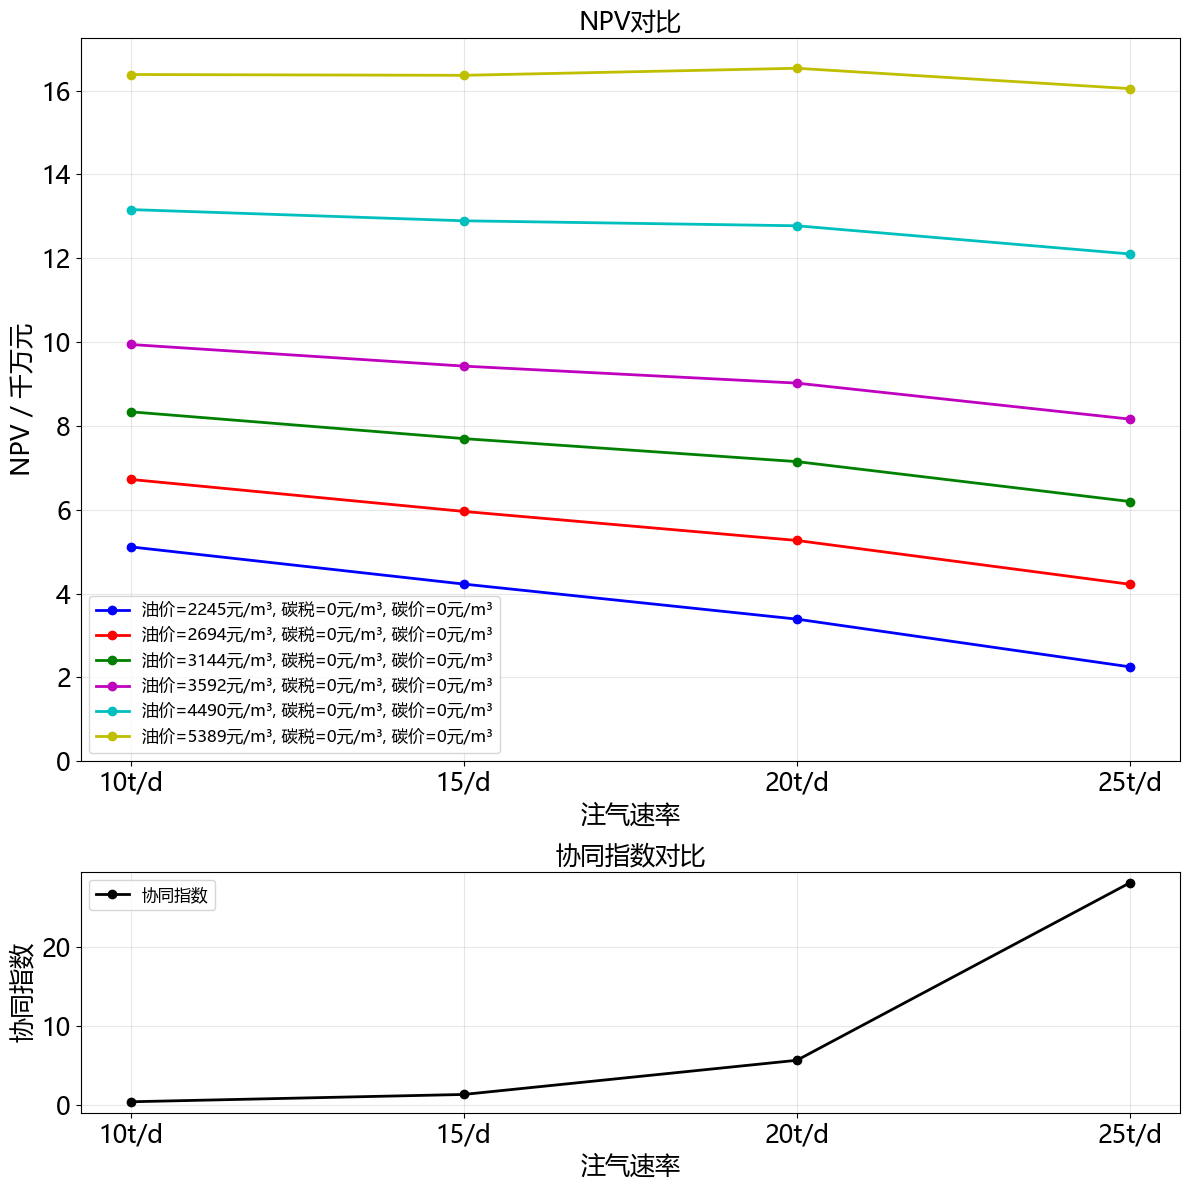

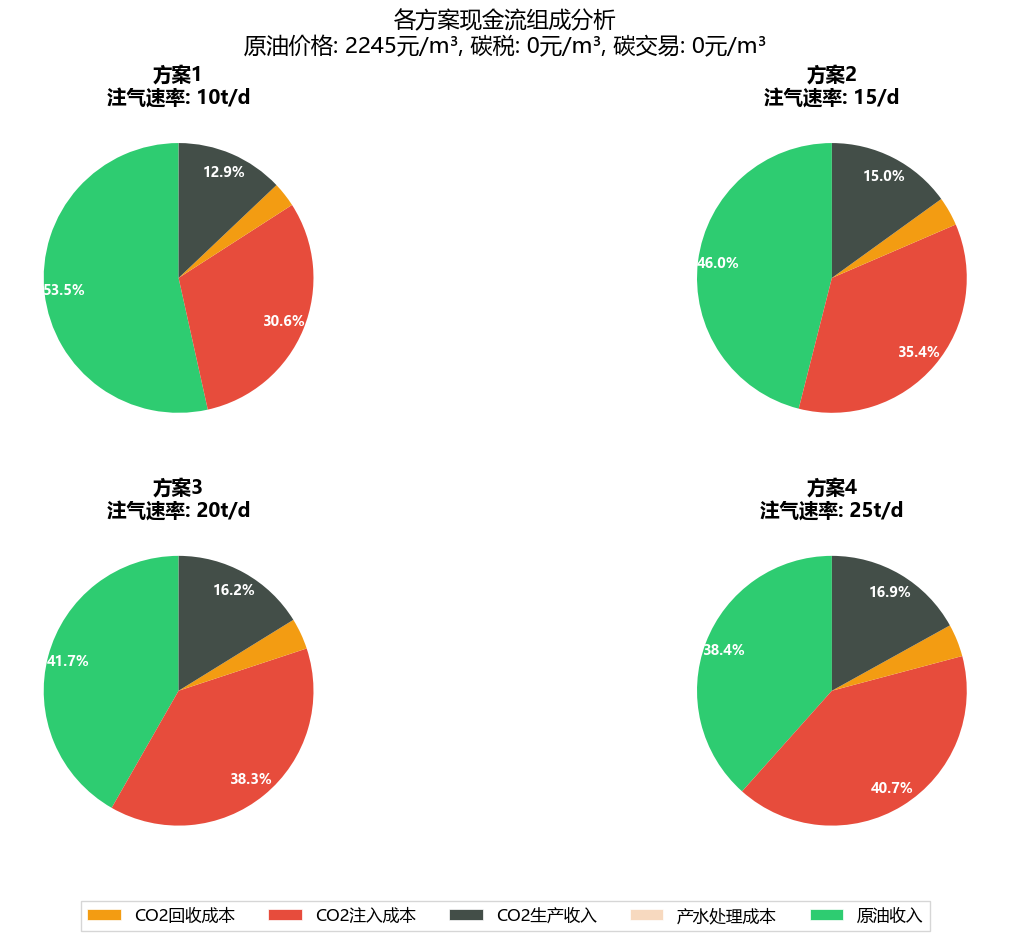

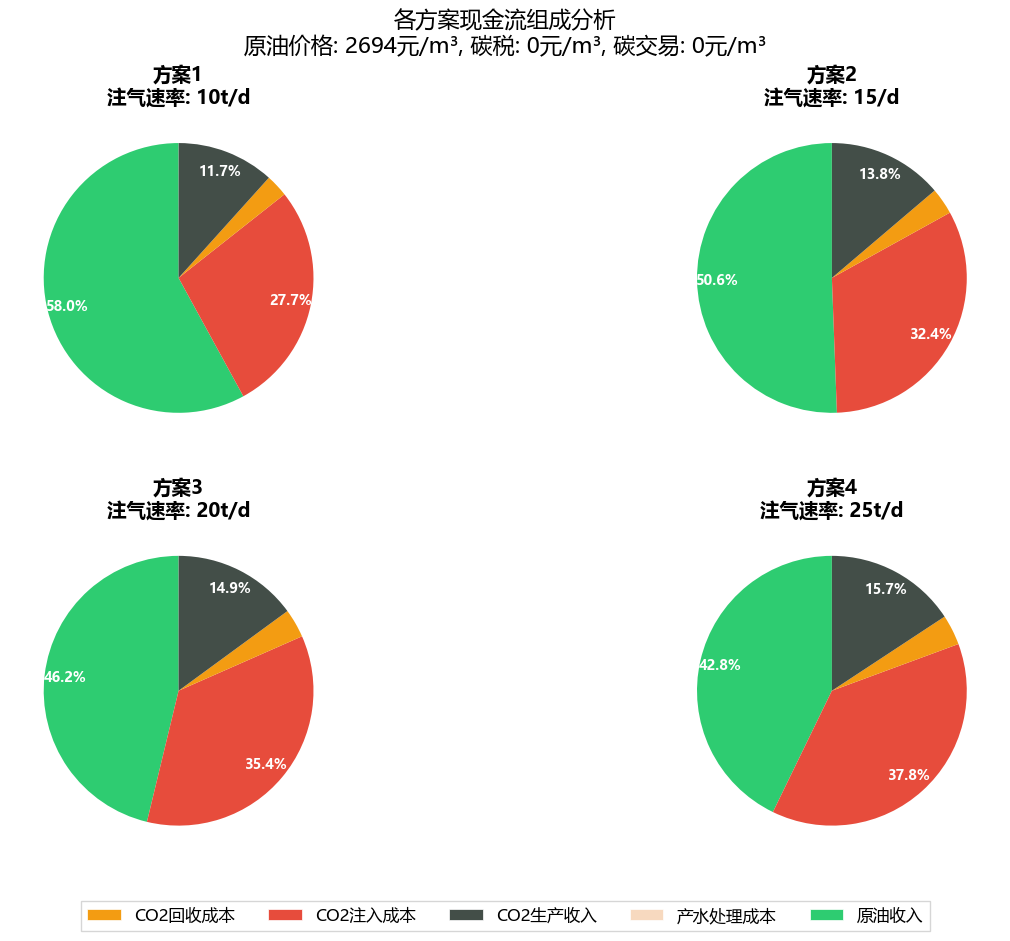

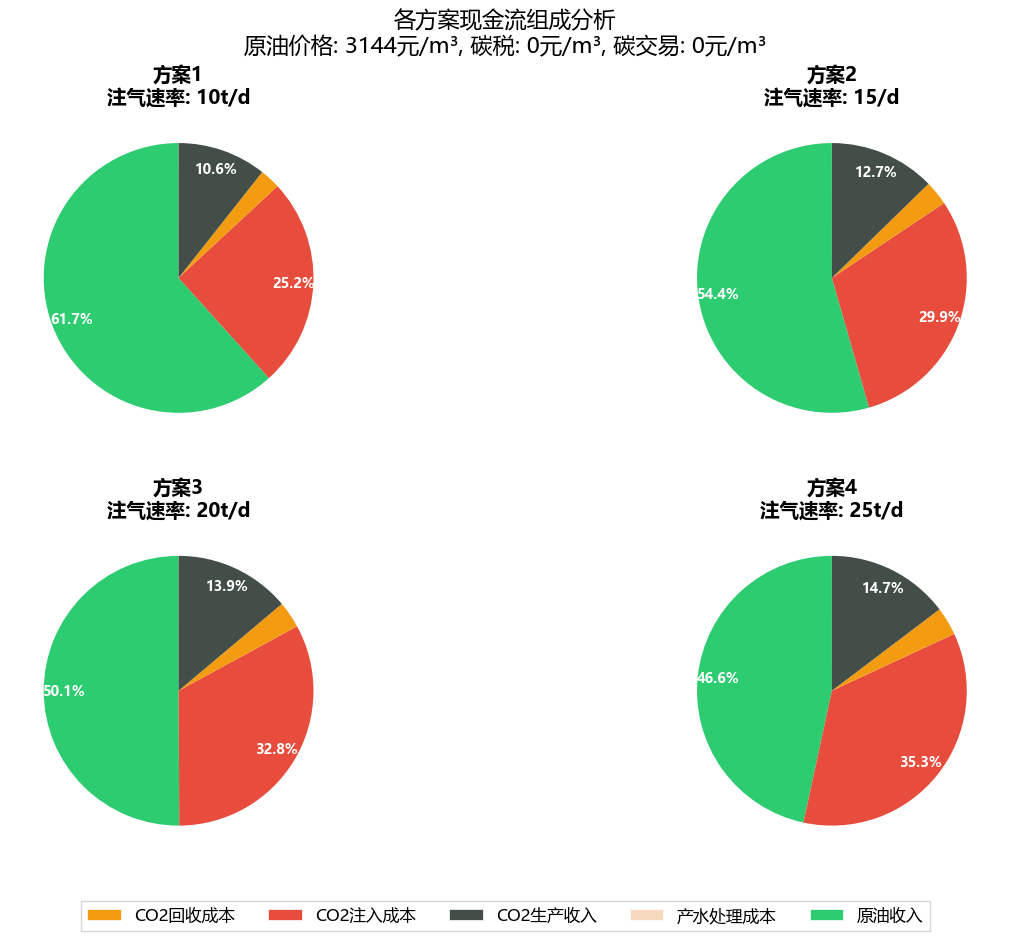

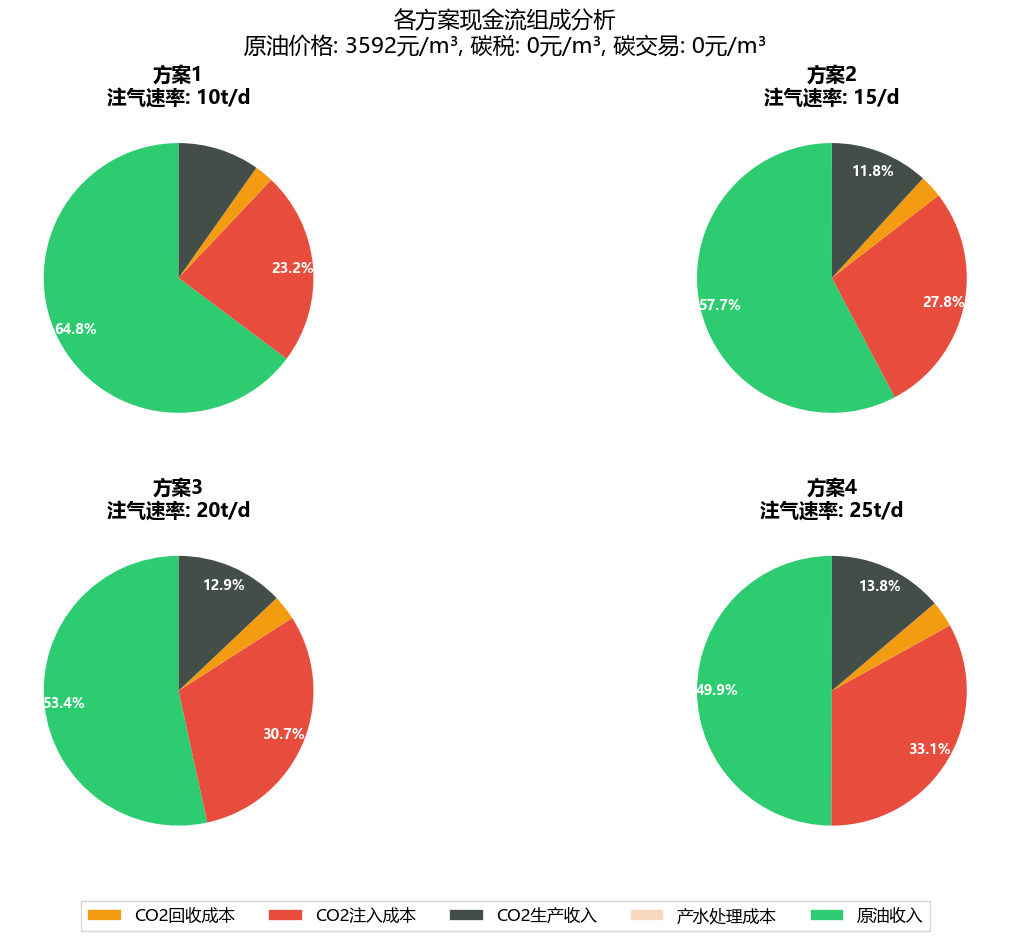

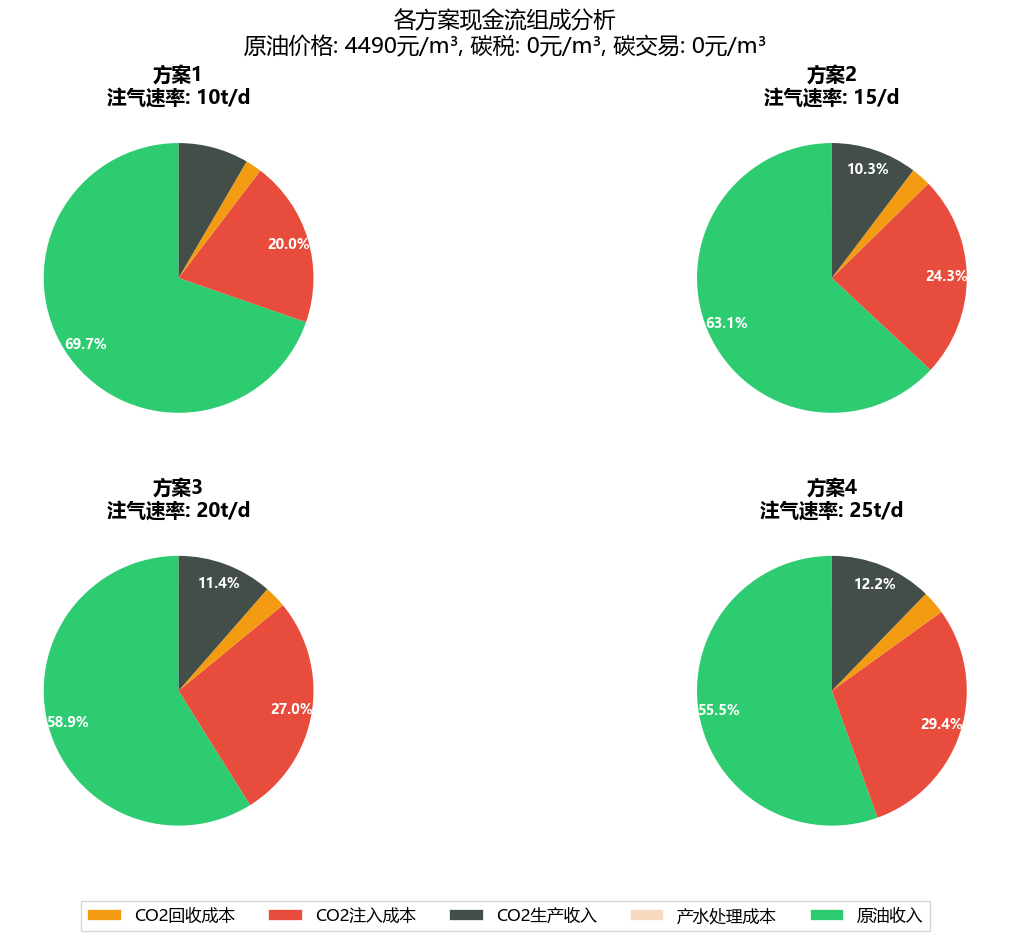

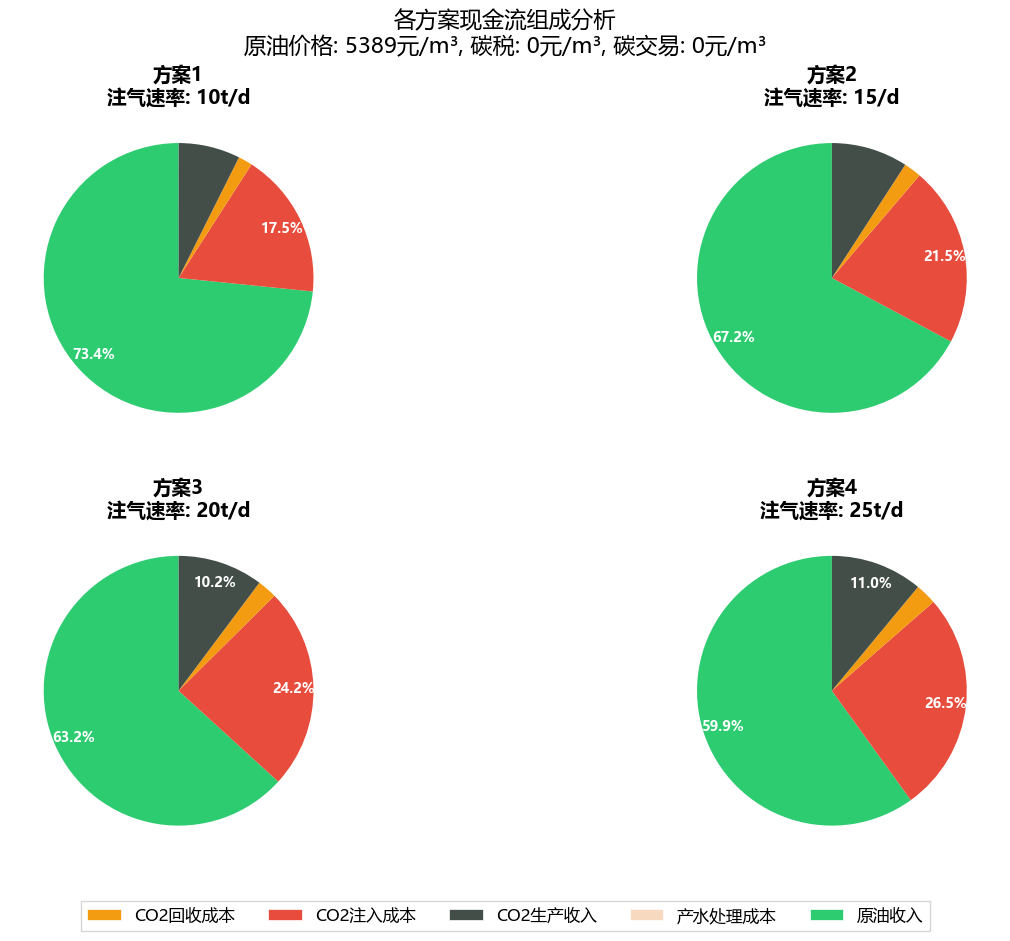

NPVÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: D:\NEW_DATA\data\BB\Plotting_CO2T_resample_NPV_1.csv


In [4]:
# 0716, ÊïèÊÑüÊÄßÂàÜÊûêÔºåBBËøûÁª≠Ê≥®ÂÖ•
cal_npv_from_excel(
    r'D:\NEW_DATA\data\BB\Plotting_CO2T_resample.xlsx', 
    r'D:\NEW_DATA\data\BB\Plotting_CO2T_resample_NPV_1.csv',
    fig_title = '1ÂêÑÊñπÊ°à‰∏ãÂçèÂêåÊåáÊï∞ÂíåNPVÂØπÊØî',
    n_cols = 2, 
    n_rows = 2,
    r_CO2 = 0.65, 
    Limit2 = 10000000, 
    ro = [2245, 2694, 3144, 3592, 4490, 5389], 
    TRADE_CO2 = [0, 0, 0, 0, 0, 0],
    TAX_CO2 = [0, 0, 0, 0, 0, 0], 
    r_CO2_i = 1.2, 
    SUB_CO2 = 0,
    x_labels = ['10t/d', '15/d','20t/d', '25t/d'], 
    x_axis_name = 'Ê≥®Ê∞îÈÄüÁéá',
    show_legend = True
)  

In [ ]:
# ÁôΩË±πNPV
cal_npv_from_excel(
    r'D:\NEW_DATA\data\BB\Plotting_CO2T_resample.xlsx', 
    r'D:\NEW_DATA\data\BB\Plotting_CO2T_resample_NPV.csv',
    fig_title = '1ÂêÑÊñπÊ°à‰∏ãÂçèÂêåÊåáÊï∞ÂíåNPVÂØπÊØî',
    n_cols = 2, 
    n_rows = 2,
    r_CO2 = 0.65, 
    Limit2 = 10000000, 
    ro = [3144, 5389, 3144, 3144,5389], 
    TRADE_CO2 = [0, 0, 0.182, 0.182, 0.182],
    TAX_CO2 = [0, 0, 0.14, 0.28, 0.14], 
    r_CO2_i = 1.2, 
    SUB_CO2 = 0,
    x_labels = ['10t/d', '15/d','20t/d', '25t/d'], 
    x_axis_name = 'Ê≥®Ê∞îÈÄüÁéá',

)  
cal_npv_from_excel(
    r'D:\NEW_DATA\data\BB\Plotting_TWAG_resample.xlsx', 
    r'D:\NEW_DATA\data\BB\Plotting_TWAG_resample_NPV.csv',
    fig_title = '1ÂêÑÊñπÊ°à‰∏ãÂçèÂêåÊåáÊï∞ÂíåNPVÂØπÊØî',
    n_cols = 2, 
    n_rows = 2,
    r_CO2 = 0.65, 
    Limit2 = 10000000, 
    ro = [3144, 5389, 3144, 3144,5389], 
    TRADE_CO2 = [0, 0, 0.182, 0.182, 0.182],
    TAX_CO2 = [0, 0, 0.14, 0.28, 0.14], 
    r_CO2_i = 1.2, 
    SUB_CO2 = 0,
    x_labels = ['10t/d', '15/d','20t/d', '25t/d'], 
    x_axis_name = 'Ê≥®Ê∞îÈÄüÁéá',
)  
cal_npv_from_excel(
    r'D:\NEW_DATA\data\BB\Plotting_WAGG_resample.xlsx', 
    r'D:\NEW_DATA\data\BB\Plotting_WAGG_resample_NPV.csv',
    fig_title = '1ÂêÑÊñπÊ°à‰∏ãÂçèÂêåÊåáÊï∞ÂíåNPVÂØπÊØî',
    n_cols = 3, 
    n_rows = 2,
    r_CO2 = 0.65, 
    Limit2 = 10000000, 
    ro = [3144, 5389, 3144, 3144,5389], 
    TRADE_CO2 = [0, 0, 0.182, 0.182, 0.182],
    TAX_CO2 = [0, 0, 0.14, 0.28, 0.14], 
    r_CO2_i = 1.2, 
    SUB_CO2 = 0,
    x_labels = ['1m', '2m', '3m', '4m', '6m'], 
    x_axis_name = 'Ê≥®Ê∞îÂë®Êúü' ,
)  
cal_npv_from_excel(
    r'D:\NEW_DATA\data\BB\Plotting_WAGW_resample.xlsx', 
    r'D:\NEW_DATA\data\BB\Plotting_WAGW_resample_NPV.csv',
    fig_title = '1ÂêÑÊñπÊ°à‰∏ãÂçèÂêåÊåáÊï∞ÂíåNPVÂØπÊØî',
    n_cols = 3, 
    n_rows = 2,
    r_CO2 = 0.65, 
    Limit2 = 10000000, 
    ro = [3144, 5389, 3144, 3144,5389], 
    TRADE_CO2 = [0, 0, 0.182, 0.182, 0.182],
    TAX_CO2 = [0, 0, 0.14, 0.28, 0.14], 
    r_CO2_i = 1.2, 
    SUB_CO2 = 0,
    x_labels = ['1m', '2m', '3m', '4m', '6m'], 
    x_axis_name = 'Ê≥®Ê∞¥Âë®Êúü' ,
)  

In [ ]:
# 0620 Â¢ûÂä†‰∫Ü‰øùÁïôÂçï‰∏™ËæìÂá∫ÁöÑÊúàÊï∞ÊçÆ
# ËæìÂá∫ÁöÑÂÖ®ÈÉ®Â±ûÊÄßËøõË°å resamplingÔºåÂ¶ÇÊûúIXÊ≤°ÊúâËÆæÁΩÆÊåâÊúàËæìÂá∫ÔºåÈÇ£‰πà‰ºöÊ†πÊçÆÊî∂ÊïõÊó∂Èó¥Ê≠•ËæìÂá∫Ôºå‰∏ÄÊòØÂØºËá¥Êó∂Èó¥Ê∑∑‰π±„ÄÅ‰∫åÊòØÊï∞ÊçÆË°åÂ∑®Â§ßÔºåÂêéÊúüËØªÂèñÂíåÂ§ÑÁêÜÊï∞ÊçÆËÄóÊó∂Èïø„ÄÇËøôÈáåÂ∞ÜÊåâÁÖßÊåâÊúàÊèíÂÄºÊàêÊ†áÂáÜÁöÑÊï∞ÊçÆ
import pandas as pd
import numpy as np
import warnings
from functools import lru_cache
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as ticker

warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

yunlv = ["PosNeg", "NegPos", "Pos", "Neg", "base", "diff"]

def extract_number(name):
    try:
        return int(name.split('_')[-1])
    except ValueError:
        try:
            return int(name.split('diff')[-1])
        except ValueError:
            for idx, value in enumerate(yunlv):
                parts = re.split(r'[_\s-]', name)
                if value in parts:
                    return 100000 + idx
            return float('inf')

@lru_cache(maxsize=1)
def get_attr_raw_data(df_path): # Removed attributes_to_get_tuple
    print(f"Attempting to read Excel file: {df_path}")
    df = None
    try:
        df = pd.read_excel(df_path, header=None)
        print(f"Successfully read Excel file. Shape: {df.shape}")
    except FileNotFoundError:
        print(f"Error: File not found at {df_path}")
        return {}, []
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return {}, []

    if df is None:
        return {}, []

    original_case_names = []
    case_name_col_indices = []
    case_names_row_index = 2
    first_case_col_index = 1

    try:
        if case_names_row_index < len(df):
            case_names_row = df.iloc[case_names_row_index]
            for i in range(first_case_col_index, len(case_names_row)):
                 if pd.notna(case_names_row[i]):
                      case_name_col_indices.append(i)
                      original_case_names.append(str(case_names_row[i]).strip())
            print(f"Extracted {len(original_case_names)} original case names from row {case_names_row_index+1}: {list(zip(original_case_names, case_name_col_indices))}")
        else:
             print(f"Warning: Case names row {case_names_row_index+1} not found in the DataFrame. Cannot extract case names.")
    except Exception as e:
        print(f"Error extracting original case names from row {case_names_row_index+1}: {e}")
        return {}, []

    attribute_raw_data = {}
    current_attr = None
    start_row = None
    # attributes_to_get is no longer used here as we want all attributes

    for i in range(len(df)):
        row = df.iloc[i]
        if pd.notna(row[0]) and isinstance(row[0], str) and ',' in row[0]:
            try:
                attr_name_raw = str(row[0])
                attr_name_parts = attr_name_raw.split(',', 1)
                attr_name = attr_name_parts[1].strip() if len(attr_name_parts) > 1 else attr_name_parts[0].strip()

                # Process the previous attribute block if one was identified
                if current_attr is not None and start_row is not None: # No longer checking against attributes_to_get
                    data_start_row = start_row + 4
                    data_end_row = i

                    if data_start_row < data_end_row:
                        cols_to_extract = [0] + case_name_col_indices
                        valid_cols_to_extract = [col for col in cols_to_extract if col < df.shape[1]]
                        if not valid_cols_to_extract:
                            print(f"  Warning: No valid columns found for attribute '{current_attr}'. Skipping.")
                        else:
                            raw_slice = df.iloc[data_start_row : data_end_row, valid_cols_to_extract]
                            if len(raw_slice.columns) == len(original_case_names) + 1:
                                raw_slice.columns = ['Date'] + original_case_names
                                attribute_raw_data[current_attr] = raw_slice.copy()
                                print(f"  Extracted raw data for '{current_attr}'. Shape: {raw_slice.shape}")
                            else:
                                print(f"  Warning: Column count mismatch for '{current_attr}'. Expected {len(original_case_names) + 1}, got {len(raw_slice.columns)}.")
                    else:
                        print(f"  Warning: No data rows found for attribute '{current_attr}'.")

                current_attr = attr_name
                start_row = i
            except Exception as e:
                print(f"Error processing potential attribute header row {i}: {e}")

    # Process the last attribute block
    if current_attr is not None and start_row is not None: # No longer checking against attributes_to_get
        data_start_row = start_row + 4
        if data_start_row < len(df):
            cols_to_extract = [0] + case_name_col_indices
            valid_cols_to_extract = [col for col in cols_to_extract if col < df.shape[1]]
            if not valid_cols_to_extract:
                print(f"  Warning: No valid columns found for last attribute '{current_attr}'. Skipping.")
            else:
                raw_slice = df.iloc[data_start_row : , valid_cols_to_extract]
                if len(raw_slice.columns) == len(original_case_names) + 1:
                    raw_slice.columns = ['Date'] + original_case_names
                    attribute_raw_data[current_attr] = raw_slice.copy()
                    print(f"  Extracted raw data for last attribute '{current_attr}'. Shape: {raw_slice.shape}")
                else:
                    print(f"  Warning: Column count mismatch for last attribute '{current_attr}'. Expected {len(original_case_names) + 1}, got {len(raw_slice.columns)}.")
        else:
            print(f"  Warning: No data rows found for last attribute '{current_attr}'.")

    print("Finished raw data extraction.")
    return attribute_raw_data, original_case_names


def smart_resample_data(df_raw, start_date_str, total_years):
    """
    Êô∫ËÉΩÈáçÈááÊ†∑ÂáΩÊï∞Ôºö
    1. ÊüêÂπ¥ÊúâÂ§öÊù°ÔºàÂ§ö‰∏™Êúà‰ªΩÔºâÂÖ®ÈÉ®‰øùÁïô
    2. ÊüêÂπ¥Âè™Êúâ‰∏ÄÊù°Âè™‰øùÁïôËøô‰∏ÄÊù°
    3. Âà†Èô§Â§ö‰ΩôÁöÑÊï∞ÊçÆ
    4. Á°Æ‰øùËæìÂá∫ÂåÖÂê´ÊâÄÊúâÁõÆÊ†áÂπ¥‰ªΩÁöÑÊï∞ÊçÆ
    """
    print(f"  Original data shape: {df_raw.shape}")
    
    # ËΩ¨Êç¢Êó•ÊúüÂàó
    df_raw['Date'] = pd.to_datetime(df_raw['Date'], errors='coerce')
    df_raw.dropna(subset=['Date'], inplace=True)
    
    if df_raw.empty:
        print(f"  Warning: No valid dates found. Skipping resampling.")
        return pd.DataFrame()
    
    df_raw.set_index('Date', inplace=True)
    df_raw = df_raw.apply(pd.to_numeric, errors='coerce').sort_index()
    
    # Ê†πÊçÆstart_date_strÂíåtotal_yearsÁîüÊàêÁõÆÊ†áÂπ¥‰ªΩÂàóË°®
    base_start_date = pd.to_datetime(start_date_str)
    target_years = [base_start_date.year + i for i in range(total_years)]
    print(f"  Target years based on start_date={start_date_str} and total_years={total_years}: {target_years}")
    
    # Ëé∑ÂèñÂéüÂßãÊï∞ÊçÆ‰∏≠ÁöÑÂπ¥‰ªΩÂàóË°®
    data_years = df_raw.index.year.unique()
    data_years = sorted(data_years)
    print(f"  Found years in data: {data_years}")
    
    # Ê£ÄÊü•ÊØè‰∏™Âπ¥‰ªΩÁöÑÊï∞ÊçÆÂπ∂Â§ÑÁêÜ
    resampled_data = []
    
    for year in target_years:
        year_data = df_raw[df_raw.index.year == year]
        
        if year_data.empty:
            # ÁõÆÊ†áÂπ¥‰ªΩÊ≤°ÊúâÊï∞ÊçÆÔºåË∑≥Ëøá
            print(f"    Year {year}: No data found, skipping")
            continue
        
        if len(year_data) > 1:
            # ÊúâÂ§öÊù°ÔºàÂ§ö‰∏™Êúà‰ªΩÔºâÂÖ®ÈÉ®‰øùÁïô
            print(f"    Year {year}: Â§öÊù°Êï∞ÊçÆÔºà{len(year_data)}ÔºâÔºåÂÖ®ÈÉ®‰øùÁïô")
            resampled_data.append(year_data)
        else:
            # Âè™Êúâ‰∏ÄÊù°Ôºå‰øùÁïôËøô‰∏ÄÊù°
            print(f"    Year {year}: Âè™Êúâ‰∏ÄÊù°Ôºå‰øùÁïô")
            resampled_data.append(year_data)
    
    if resampled_data:
        result = pd.concat(resampled_data)
        print(f"  Final resampled data shape: {result.shape}")
        return result
    else:
        print(f"  No data to resample")
        return pd.DataFrame()


def process_and_resample_excel(input_df_path, output_excel_path, start_date_str="2024/7/4", total_years=20):
    print(f"\n--- Starting data processing and resampling for {input_df_path} ---")

    # Call get_attr_raw_data without specifying attributes, so it extracts all
    raw_attribute_data, original_case_names = get_attr_raw_data(input_df_path)

    if not raw_attribute_data or not original_case_names:
        print("Error: No data or case names extracted. Cannot proceed with resampling.")
        return

    # Sort attributes by their appearance order in the original file
    # This ensures the output maintains the original attribute order
    original_df = pd.read_excel(input_df_path, header=None)
    
    found_attribute_order = []
    for i in range(len(original_df)):
        if pd.notna(original_df.iloc[i, 0]) and isinstance(original_df.iloc[i, 0], str) and ',' in original_df.iloc[i, 0]:
            attr_name_raw = str(original_df.iloc[i, 0])
            attr_name_parts = attr_name_raw.split(',', 1)
            attr_name = attr_name_parts[1].strip() if len(attr_name_parts) > 1 else attr_name_parts[0].strip()
            if attr_name in raw_attribute_data: # Only add if we actually extracted data for it
                found_attribute_order.append(attr_name)


    with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
        current_write_row = 0

        first_attr_header_row = -1
        for i in range(len(original_df)):
            if pd.notna(original_df.iloc[i, 0]) and isinstance(original_df.iloc[i, 0], str) and ',' in original_df.iloc[i, 0]:
                first_attr_header_row = i
                break

        if first_attr_header_row > 0:
            original_df.iloc[:first_attr_header_row].to_excel(writer, sheet_name='Sheet1', index=False, header=False)
            current_write_row = first_attr_header_row
        else:
            original_df.iloc[:4].to_excel(writer, sheet_name='Sheet1', index=False, header=False)
            current_write_row = 4


        for attr_name in found_attribute_order: # Iterate through all found attributes in their original order
            if attr_name in raw_attribute_data and not raw_attribute_data[attr_name].empty:
                df_raw = raw_attribute_data[attr_name].copy()
                print(f"Processing attribute: '{attr_name}' with raw data shape: {df_raw.shape}")

                # ‰ΩøÁî®Êñ∞ÁöÑÊô∫ËÉΩÈáçÈááÊ†∑ÂáΩÊï∞
                resampled_df = smart_resample_data(df_raw, start_date_str, total_years)
                
                if resampled_df.empty:
                    print(f"  Warning: No valid resampled data for attribute '{attr_name}'. Skipping.")
                    continue

                print(f"  Resampled data shape for '{attr_name}': {resampled_df.shape}")

                block_start_row = -1
                for i in range(len(original_df)):
                    if pd.notna(original_df.iloc[i, 0]) and isinstance(original_df.iloc[i, 0], str) and f"Field, {attr_name}" in original_df.iloc[i, 0]:
                        block_start_row = i
                        break
                
                if block_start_row != -1:
                    rows_to_copy = []
                    if block_start_row < len(original_df):
                        rows_to_copy.append(block_start_row)
                    if block_start_row + 1 < len(original_df):
                        rows_to_copy.append(block_start_row + 1)
                    if block_start_row + 2 < len(original_df):
                        rows_to_copy.append(block_start_row + 2)
                    if block_start_row + 3 < len(original_df):
                        rows_to_copy.append(block_start_row + 3)

                    if rows_to_copy:
                        original_df.iloc[rows_to_copy].to_excel(writer, sheet_name='Sheet1', startrow=current_write_row, index=False, header=False)
                        current_write_row += len(rows_to_copy)

                df_to_write = resampled_df.reset_index(names=['Date'])
                df_to_write['Date'] = df_to_write['Date'].dt.strftime('%Y/%#m/%#d')

                df_to_write.to_excel(writer, sheet_name='Sheet1', startrow=current_write_row, index=False, header=False)
                current_write_row += df_to_write.shape[0]

                empty_rows_df = pd.DataFrame(index=range(3), columns=range(df_to_write.shape[1]))
                empty_rows_df.to_excel(writer, sheet_name='Sheet1', startrow=current_write_row, index=False, header=False)
                current_write_row += empty_rows_df.shape[0]

            else:
                print(f"Warning: No raw data found for attribute '{attr_name}'. Skipping.")

    print(f"--- Data processing and resampling complete. Output saved to {output_excel_path} ---")


replacement_dict = {
    'PosNeg': 'Ê≠£Ë¥üÁõ∏Èó¥',
    'NegPos': 'Ë¥üÊ≠£Áõ∏Èó¥',
    'Pos': 'Ê≠£Âêë',
    'Neg': 'Ë¥üÂêë',
    'base': 'Âü∫Á°ÄÊñπÊ°à',
    'diff': 'Â∑ÆÂÄºÊñπÊ°à',
    '_': ' '
}


get_attr_raw_data.cache_clear()

# input_excel_path = r'D:\NEW_DATA\data\BB\Plotting_CO2T.xlsx'
# output_excel_path = r'D:\NEW_DATA\data\BB\Plotting_CO2T_resample.xlsx'

# output_excel_path = r'D:\NEW_DATA\Models\ÂåñÂ≠êÂù™\Ê≥®Ê∞îÈÄüÁéá.xlsx'
input_excel_path = r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_RATE.xlsx'
output_excel_path = r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_RATE_resample.xlsx'
input_excel_path = r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_PERIOD.xlsx'
output_excel_path = r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_PERIODE_resample.xlsx'
input_excel_path = r'D:\NEW_DATA\data\HZP\HZP_WAG_WINJ_PERIOD.xlsx'
output_excel_path = r'D:\NEW_DATA\data\HZP\HZP_WAG_WINJ_PERIODE_resample.xlsx'
input_excel_path = r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_RATE.xlsx'
output_excel_path = r'D:\NEW_DATA\data\HZP\HZP_WAG_GINJ_RATE_resample.xlsx'
input_excel_path = r'D:\NEW_DATA\data\HZP\HZP_ËøûÁª≠Ê≥®Ê∞î.xlsx'
output_excel_path = r'D:\NEW_DATA\data\HZP\HZP_ËøûÁª≠Ê≥®Ê∞î_resample.xlsx'

input_excel_path = r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\Ê∏óÈÄèÁéá-raw.xlsx'
output_excel_path = r'D:\NEW_DATA\Models\1. Êú∫ÁêÜÊ®°Âûã\Ê∏óÈÄèÁéá_resample.xlsx'
process_and_resample_excel(input_excel_path, output_excel_path, start_date_str="2004/1/1", total_years=21)

# process_and_resample_excel(input_excel_path, output_excel_path, start_date_str="2024/8/1", total_years=21)
# Ê∏ÖÁêÜÁ©∫Ë°å
df = pd.read_excel(output_excel_path)

# Âà†Èô§ÊâÄÊúâÁ©∫Ë°å
df_cleaned = df.dropna(how='all')

df_cleaned.to_excel(output_excel_path, index=False)

In [ ]:
# ËøõË°å‰∏ä‰∏ÄÊ≠•Êï∞ÊçÆÂ§ÑÁêÜÂêéÔºåÂèØËÉΩÂ≠òÂú®Á©∫Ë°åÔºåÂà†ÂéªÂÆÉ‰ª¨
import pandas as pd

# ËØªÂèñExcelÊñá‰ª∂
file_path = r'D:\NEW_DATA\data\HZP\Plotting_0001_resampled.xlsx'
df = pd.read_excel(file_path)

# Âà†Èô§ÊâÄÊúâÁ©∫Ë°å
df_cleaned = df.dropna(how='all')

df_cleaned.to_excel(r'D:\NEW_DATA\data\HZP\Plotting_0001_resampled_c.xlsx', index=False)

In [ ]:
# ÈÉ®ÂàÜÂ±ûÊÄß resampling - Êú™‰ΩøÁî®
import pandas as pd
import numpy as np
import warnings
from functools import lru_cache
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as ticker

warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

yunlv = ["PosNeg", "NegPos", "Pos", "Neg", "base", "diff"]

def extract_number(name):
    try:
        return int(name.split('_')[-1])
    except ValueError:
        try:
            return int(name.split('diff')[-1])
        except ValueError:
            for idx, value in enumerate(yunlv):
                parts = re.split(r'[_\s-]', name)
                if value in parts:
                    return 100000 + idx
            return float('inf')

@lru_cache(maxsize=1)
def get_attr_raw_data(df_path, attributes_to_get_tuple):
    print(f"Attempting to read Excel file: {df_path}")
    df = None
    try:
        df = pd.read_excel(df_path, header=None)
        print(f"Successfully read Excel file. Shape: {df.shape}")
    except FileNotFoundError:
        print(f"Error: File not found at {df_path}")
        return {}, []
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return {}, []

    if df is None:
        return {}, []

    original_case_names = []
    case_name_col_indices = []
    case_names_row_index = 2
    first_case_col_index = 1

    try:
        if case_names_row_index < len(df):
            case_names_row = df.iloc[case_names_row_index]
            for i in range(first_case_col_index, len(case_names_row)):
                 if pd.notna(case_names_row[i]):
                      case_name_col_indices.append(i)
                      original_case_names.append(str(case_names_row[i]).strip())
            print(f"Extracted {len(original_case_names)} original case names from row {case_names_row_index+1}: {list(zip(original_case_names, case_name_col_indices))}")
        else:
             print(f"Warning: Case names row {case_names_row_index+1} not found in the DataFrame. Cannot extract case names.")
    except Exception as e:
        print(f"Error extracting original case names from row {case_names_row_index+1}: {e}")
        return {}, []

    attribute_raw_data = {}
    current_attr = None
    start_row = None
    attributes_to_get = set(attributes_to_get_tuple)

    for i in range(len(df)):
        row = df.iloc[i]
        if pd.notna(row[0]) and isinstance(row[0], str) and ',' in row[0]:
            try:
                attr_name_raw = str(row[0])
                attr_name_parts = attr_name_raw.split(',', 1)
                attr_name = attr_name_parts[1].strip() if len(attr_name_parts) > 1 else attr_name_parts[0].strip()

                if current_attr is not None and start_row is not None and current_attr in attributes_to_get:
                    data_start_row = start_row + 4
                    data_end_row = i

                    if data_start_row < data_end_row:
                        cols_to_extract = [0] + case_name_col_indices
                        valid_cols_to_extract = [col for col in cols_to_extract if col < df.shape[1]]
                        if not valid_cols_to_extract:
                            print(f"  Warning: No valid columns found for attribute '{current_attr}'. Skipping.")
                        else:
                            raw_slice = df.iloc[data_start_row : data_end_row, valid_cols_to_extract]
                            if len(raw_slice.columns) == len(original_case_names) + 1:
                                raw_slice.columns = ['Date'] + original_case_names
                                attribute_raw_data[current_attr] = raw_slice.copy()
                                print(f"  Extracted raw data for '{current_attr}'. Shape: {raw_slice.shape}")
                            else:
                                print(f"  Warning: Column count mismatch for '{current_attr}'. Expected {len(original_case_names) + 1}, got {len(raw_slice.columns)}.")
                    else:
                        print(f"  Warning: No data rows found for attribute '{current_attr}'.")

                current_attr = attr_name
                start_row = i
            except Exception as e:
                print(f"Error processing potential attribute header row {i}: {e}")

    if current_attr is not None and start_row is not None and current_attr in attributes_to_get:
        data_start_row = start_row + 4
        if data_start_row < len(df):
            cols_to_extract = [0] + case_name_col_indices
            valid_cols_to_extract = [col for col in cols_to_extract if col < df.shape[1]]
            if not valid_cols_to_extract:
                print(f"  Warning: No valid columns found for last attribute '{current_attr}'. Skipping.")
            else:
                raw_slice = df.iloc[data_start_row : , valid_cols_to_extract]
                if len(raw_slice.columns) == len(original_case_names) + 1:
                    raw_slice.columns = ['Date'] + original_case_names
                    attribute_raw_data[current_attr] = raw_slice.copy()
                    print(f"  Extracted raw data for last attribute '{current_attr}'. Shape: {raw_slice.shape}")
                else:
                    print(f"  Warning: Column count mismatch for last attribute '{current_attr}'. Expected {len(original_case_names) + 1}, got {len(raw_slice.columns)}.")
        else:
            print(f"  Warning: No data rows found for last attribute '{current_attr}'.")

    print("Finished raw data extraction.")
    return attribute_raw_data, original_case_names

def process_and_resample_excel(input_df_path, output_excel_path, start_date_str="2024/7/4", total_years=20):
    print(f"\n--- Starting data processing and resampling for {input_df_path} ---")

    attributes_to_process_tuple = (
        'Oil production cumulative',
        'Gas injection cumulative',
        'Gas production cumulative',
        'Water injection cumulative',
        'Water production cumulative',
        'Tracer production cumulative',
        'Tracer injection cumulative',
    )

    raw_attribute_data, original_case_names = get_attr_raw_data(input_df_path, attributes_to_process_tuple)

    if not raw_attribute_data or not original_case_names:
        print("Error: No data or case names extracted. Cannot proceed with resampling.")
        return

    with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
        original_df = pd.read_excel(input_df_path, header=None)

        current_write_row = 0

        for attr_name in attributes_to_process_tuple:
            if attr_name in raw_attribute_data and not raw_attribute_data[attr_name].empty:
                df_raw = raw_attribute_data[attr_name].copy()
                print(f"Processing attribute: '{attr_name}' with raw data shape: {df_raw.shape}")

                df_raw['Date'] = pd.to_datetime(df_raw['Date'], errors='coerce')
                df_raw.dropna(subset=['Date'], inplace=True)

                if df_raw.empty:
                    print(f"  Warning: No valid dates found for attribute '{attr_name}'. Skipping resampling.")
                    continue

                df_raw.set_index('Date', inplace=True)
                df_raw = df_raw.apply(pd.to_numeric, errors='coerce').sort_index()

                base_start_date = pd.to_datetime(start_date_str)
                yearly_dates = [base_start_date + pd.DateOffset(years=i) for i in range(total_years)]
                target_index = pd.DatetimeIndex(yearly_dates)
                
                # Full resampling with interpolation
                resampled_df = df_raw.reindex(df_raw.index.union(target_index)).interpolate(method='linear', limit_direction='both')
                resampled_df = resampled_df.reindex(target_index)

                # For cumulative data, if the first value is NaN after interpolation, set it to 0
                # And for any NaNs that might remain (e.g., if target index is outside original data range entirely), fill with 0
                resampled_df = resampled_df.fillna(0)
                
                print(f"  Resampled and interpolated data shape for '{attr_name}': {resampled_df.shape}")

                # --- Write attribute header and then data ---
                # Get the original header rows for this attribute block
                # Scan original_df to find the rows corresponding to this attribute's block
                # We need the "Field, Attribute", "X Y1...", "Date Col1...", and "Unit Col1..." rows
                
                block_start_row = -1
                block_end_row = -1 # This will be the row *before* the next attribute or end of file
                
                for i in range(len(original_df)):
                    if pd.notna(original_df.iloc[i, 0]) and isinstance(original_df.iloc[i, 0], str) and f"Field, {attr_name}" in original_df.iloc[i, 0]:
                        block_start_row = i
                        break
                
                if block_start_row != -1:
                    # Find where the next attribute block starts or end of file
                    for i in range(block_start_row + 1, len(original_df)):
                        if pd.notna(original_df.iloc[i, 0]) and isinstance(original_df.iloc[i, 0], str) and ',' in original_df.iloc[i, 0]:
                            block_end_row = i
                            break
                    if block_end_row == -1: # It's the last attribute
                        block_end_row = len(original_df)
                    
                    # Copy the attribute header (Field, Attribute), X/Y, Date/Scenario, and Units row
                    # These are typically block_start_row, block_start_row+1, block_start_row+2, block_start_row+3
                    
                    # Ensure we don't go out of bounds for the original_df
                    rows_to_copy = []
                    if block_start_row < len(original_df):
                        rows_to_copy.append(block_start_row)
                    if block_start_row + 1 < len(original_df):
                        rows_to_copy.append(block_start_row + 1)
                    if block_start_row + 2 < len(original_df):
                        rows_to_copy.append(block_start_row + 2)
                    if block_start_row + 3 < len(original_df):
                        rows_to_copy.append(block_start_row + 3)

                    if rows_to_copy:
                        original_df.iloc[rows_to_copy].to_excel(writer, sheet_name='Sheet1', startrow=current_write_row, index=False, header=False)
                        current_write_row += len(rows_to_copy)

                df_to_write = resampled_df.reset_index(names=['Date'])
                df_to_write['Date'] = df_to_write['Date'].dt.strftime('%Y/%#m/%#d')

                df_to_write.to_excel(writer, sheet_name='Sheet1', startrow=current_write_row, index=False, header=False)
                current_write_row += df_to_write.shape[0]

                empty_rows_df = pd.DataFrame(index=range(3), columns=range(df_to_write.shape[1]))
                empty_rows_df.to_excel(writer, sheet_name='Sheet1', startrow=current_write_row, index=False, header=False)
                current_write_row += empty_rows_df.shape[0]

            else:
                print(f"Warning: No raw data found for attribute '{attr_name}'. Skipping.")

    print(f"--- Data processing and resampling complete. Output saved to {output_excel_path} ---")

get_attr_raw_data.cache_clear()

input_excel_path = r'D:\NEW_DATA\data\HZP\Plotting_0001.xlsx'
output_excel_path = r'D:\NEW_DATA\data\HZP\Plotting_0001_resampled.xlsx'

process_and_resample_excel(input_excel_path, output_excel_path, start_date_str="2024/7/4", total_years=20)



--- Starting data processing and resampling for D:\NEW_DATA\data\HZP\Plotting_0001.xlsx ---
Attempting to read Excel file: D:\NEW_DATA\data\HZP\Plotting_0001.xlsx
Successfully read Excel file. Shape: (129513, 7)
Extracted 6 original case names from row 3: [('BEST_FIT_IMM_RESTART_1', 1), ('BEST_FIT_IMM_RESTART_2', 2), ('BEST_FIT_IMM_RESTART_3', 3), ('BEST_FIT_IMM_RESTART_4', 4), ('BEST_FIT_IMM_RESTART_5', 5), ('BEST_FIT_IMM_RESTART_6', 6)]
  Extracted raw data for 'Tracer injection cumulative'. Shape: (4462, 7)
  Extracted raw data for 'Tracer production cumulative'. Shape: (4462, 7)
  Extracted raw data for 'Gas injection cumulative'. Shape: (4462, 7)
  Extracted raw data for 'Gas production cumulative'. Shape: (4462, 7)
  Extracted raw data for 'Oil production cumulative'. Shape: (4462, 7)
  Extracted raw data for 'Water injection cumulative'. Shape: (4462, 7)
  Extracted raw data for 'Water production cumulative'. Shape: (4462, 7)
Finished raw data extraction.
Processing attribute: 